<a href="https://colab.research.google.com/github/MujtabaAhmedRaja/MujtabaAhmedRaja/blob/main/PIMA_INDIANS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PIMA INDIANS

## loading dataset from kaggle

In [ ]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "diabetes.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "uciml/pima-indians-diabetes-database",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

<ipython-input-1-4045e7574c00>:10: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


First 5 records:    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


## Checking Missing Values
Missing Values in this dataset are filled with 0 instead of NaN, 0 is unrealistic in many cases, like a person cannot have 0 glucose,bmi,skin thickness or blood pressure

In [ ]:

for column in df.columns:
  if column != 'Outcome':
    if df[column].isin([0]).any():
      print(column)

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI


In [ ]:
fill=['Glucose','BloodPressure','SkinThickness','BMI']
fillonCond=['Insulin']

In [ ]:

import numpy as np

for col in fill:
  df[col] = df[col].replace(0, np.nan)

# You might want to check the changes
print("\nDataFrame after replacing 0s with NaN in specified columns:")
print(df.head())
df.info()


DataFrame after replacing 0s with NaN in specified columns:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0        0  33.6   
1            1     85.0           66.0           29.0        0  26.6   
2            8    183.0           64.0            NaN        0  23.3   
3            1     89.0           66.0           23.0       94  28.1   
4            0    137.0           40.0           35.0      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies            

In [ ]:

df.loc[df['Outcome'] == 0, 'Insulin'] = df.loc[df['Outcome'] == 0, 'Insulin'].replace(0, np.nan)

print("\nDataFrame after replacing 0s with NaN in Insulin column where Outcome is 0:")
print(df.head())


DataFrame after replacing 0s with NaN in Insulin column where Outcome is 0:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0      0.0  33.6   
1            1     85.0           66.0           29.0      NaN  26.6   
2            8    183.0           64.0            NaN      0.0  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   532 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [ ]:
import matplotlib.pyplot as plt


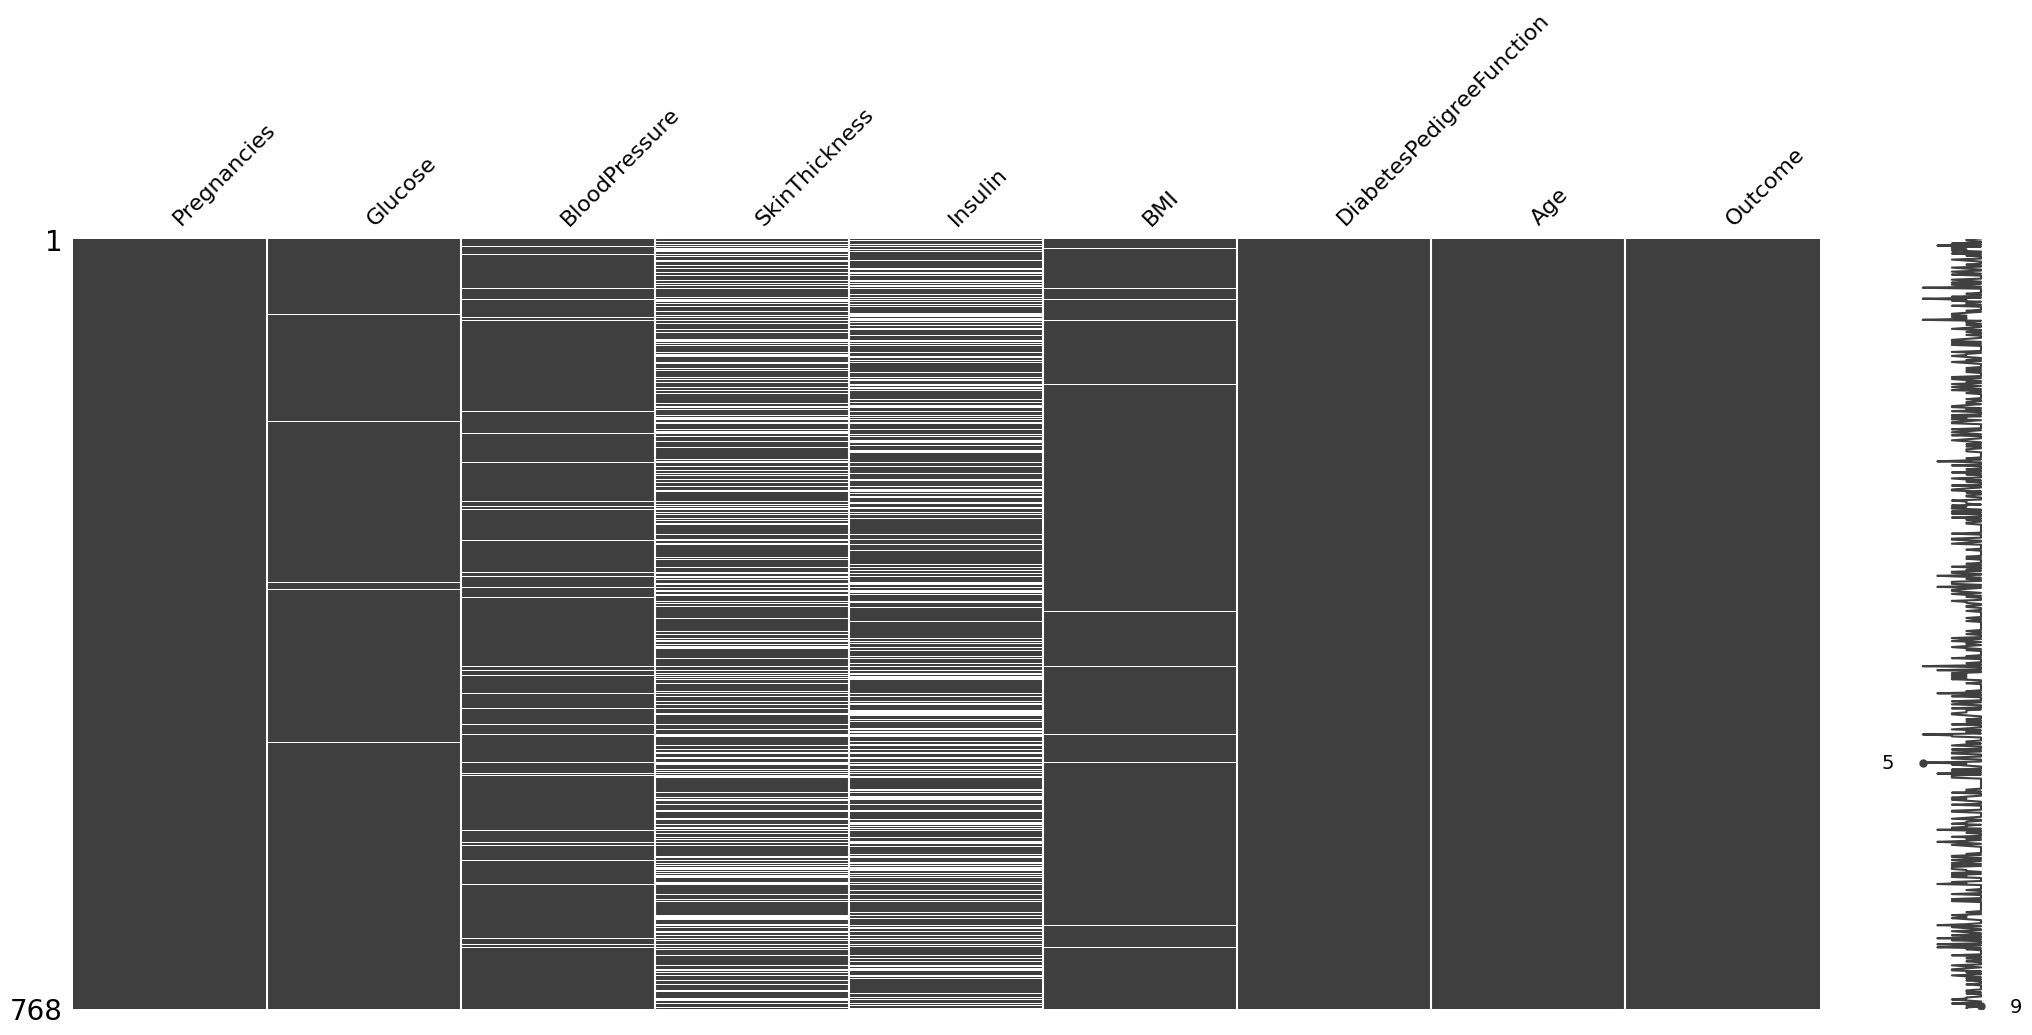

In [ ]:
import missingno as msno
msno.matrix(df)
plt.show()

In [ ]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0      0.0  33.6   
1            1     85.0           66.0           29.0      NaN  26.6   
2            8    183.0           64.0            NaN      0.0  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

Since the dataset is colinear as change in insulin level, glucose would directly affect the outcome, so we cannot use simple imputer here, but instead we'll use Iterative Imputer along with BayesianRidge as it is excellent performer for colinear data like this

In [ ]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer # Required for IterativeImputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge # Excellent for collinear data
# from sklearn.ensemble import RandomForestRegressor # Another powerful option for non-linearities


print("Original DataFrame head:")
print(df.head())
print("\nMissing values in original DataFrame:")
print(df.isnull().sum())

# --- Step 1: Initialize the IterativeImputer ---
# We'll use BayesianRidge as the estimator, which is good for handling collinearity.
# You can experiment with other estimators like RandomForestRegressor if your data
# has complex non-linear relationships.

imputer = IterativeImputer(
    estimator=BayesianRidge(), # The model used for imputation.
                               # BayesianRidge is recommended for collinearity.
    max_iter=10,               # Number of imputation rounds. 5-10 is often sufficient.
    random_state=42,           # For reproducibility of results.
    initial_strategy='mean'    # How to initially fill NaNs before the first iteration.
                               # 'mean', 'median', or 'most_frequent' are common.
)


Original DataFrame head:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0      0.0  33.6   
1            1     85.0           66.0           29.0      NaN  26.6   
2            8    183.0           64.0            NaN      0.0  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Missing values in original DataFrame:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     236
BMI                          11
DiabetesPedigreeFunction      0
Age            

In [ ]:

# --- Step 2: Apply the Imputer to your DataFrame ---
# The .fit_transform() method learns the imputation model and applies it.
# It returns a NumPy array, so we convert it back to a Pandas DataFrame.
df_imputed_array = imputer.fit_transform(df)
df_imputed = pd.DataFrame(df_imputed_array, columns=df.columns, index=df.index)

print("\n--- Imputation Complete! ---")
print("\nDataFrame head after MICE Imputation:")
print(df_imputed.head())
print("\nMissing values after MICE Imputation:")
print(df_imputed.isnull().sum())



--- Imputation Complete! ---

DataFrame head after MICE Imputation:
   Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0          6.0    148.0           72.0      35.000000    0.000000  33.6   
1          1.0     85.0           66.0      29.000000   68.829682  26.6   
2          8.0    183.0           64.0      21.747351    0.000000  23.3   
3          1.0     89.0           66.0      23.000000   94.000000  28.1   
4          0.0    137.0           40.0      35.000000  168.000000  43.1   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.627  50.0      1.0  
1                     0.351  31.0      0.0  
2                     0.672  32.0      1.0  
3                     0.167  21.0      0.0  
4                     2.288  33.0      1.0  

Missing values after MICE Imputation:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                  


Original mean of 'Glucose' (excluding NaNs): 121.69
Imputed mean of 'Glucose': 121.64


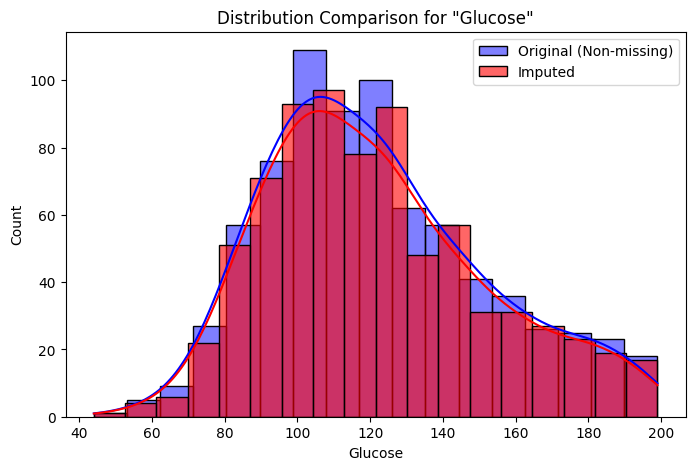

In [ ]:

# --- Optional: Verify the impact of imputation ---
# You can compare descriptive statistics or distributions if you like.
# For example, to compare the mean of a column before and after imputation:
# Choose a column that had missing values
column_to_check = df.columns[df.isnull().any()].tolist()[0] # Gets the first column with NaNs

if df[column_to_check].isnull().any():
    print(f"\nOriginal mean of '{column_to_check}' (excluding NaNs): {df[column_to_check].mean():.2f}")
    print(f"Imputed mean of '{column_to_check}': {df_imputed[column_to_check].mean():.2f}")

    import matplotlib.pyplot as plt
    import seaborn as sns

    plt.figure(figsize=(8, 5))
    sns.histplot(df[column_to_check].dropna(), kde=True, color='blue', label='Original (Non-missing)')
    sns.histplot(df_imputed[column_to_check], kde=True, color='red', alpha=0.6, label='Imputed')
    plt.title(f'Distribution Comparison for "{column_to_check}"')
    plt.legend()
    plt.show()


Generating plots for imputed columns:


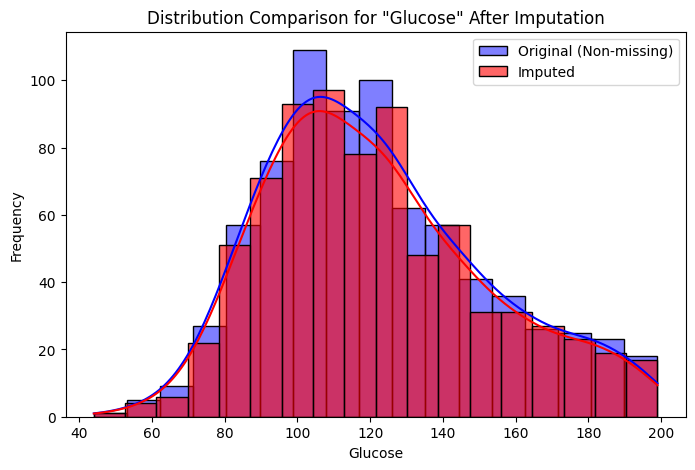

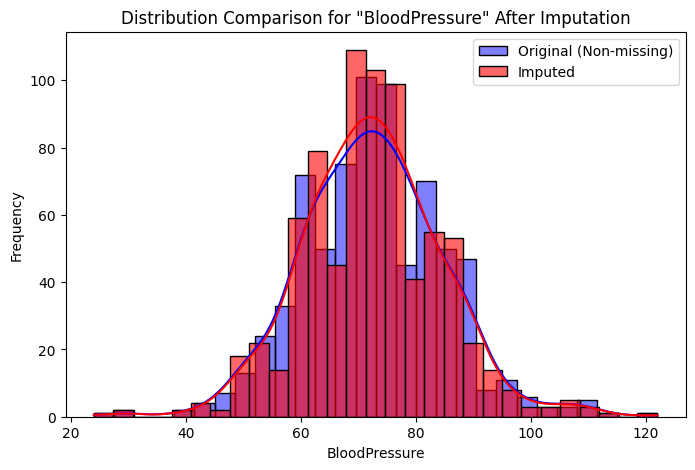

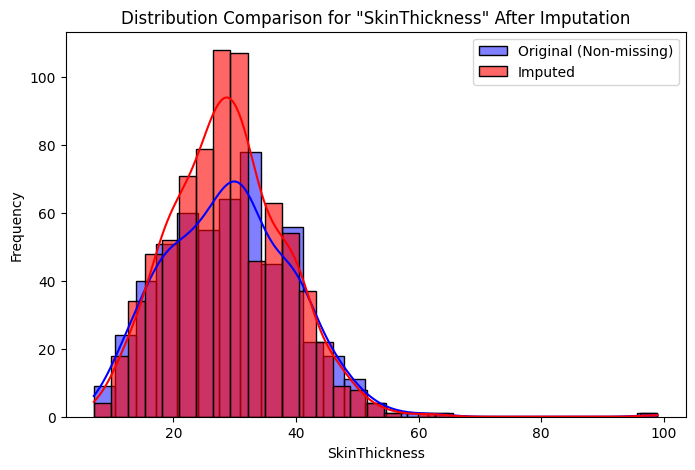

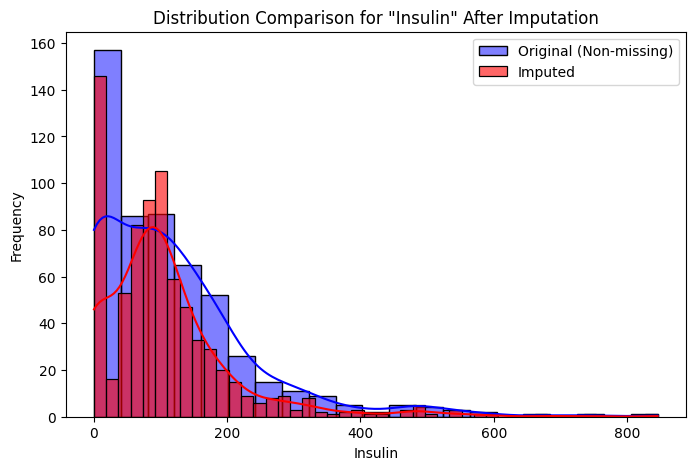

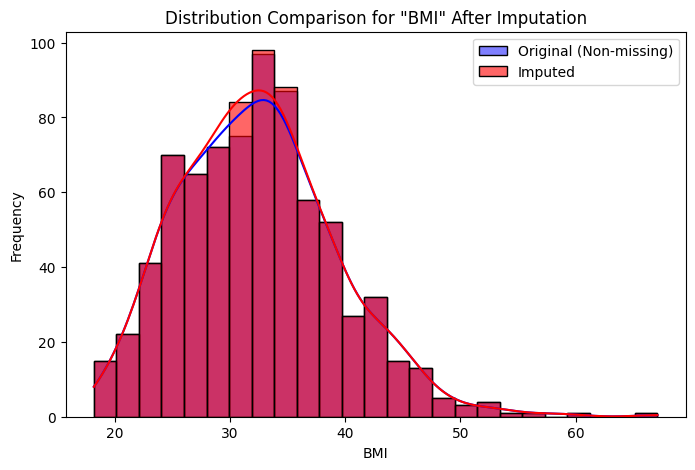

In [ ]:
# prompt: generate plots for all imputed values

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

# List of columns that had missing values (excluding the 'Outcome' column if it doesn't have NaNs)
columns_with_nans = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'] # Update if your NaN columns differ

# Plot histograms for original (non-missing) and imputed data for each column
print("\nGenerating plots for imputed columns:")
for column in columns_with_nans:
    if column in df.columns and column in df_imputed.columns: # Check if columns exist
        plt.figure(figsize=(8, 5))
        # Plot original non-missing values
        sns.histplot(df[column].dropna(), kde=True, color='blue', label='Original (Non-missing)')
        # Plot imputed values
        sns.histplot(df_imputed[column], kde=True, color='red', alpha=0.6, label='Imputed')
        plt.title(f'Distribution Comparison for "{column}" After Imputation')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.legend()
        plt.show()
    else:
        print(f"Column '{column}' not found in DataFrames.")

## Data Analysis

In [ ]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


In [ ]:
df_imputed.head()

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0          6.0    148.0           72.0      35.000000    0.000000  33.6   
1          1.0     85.0           66.0      29.000000   68.829682  26.6   
2          8.0    183.0           64.0      21.747351    0.000000  23.3   
3          1.0     89.0           66.0      23.000000   94.000000  28.1   
4          0.0    137.0           40.0      35.000000  168.000000  43.1   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.627  50.0      1.0  
1                     0.351  31.0      0.0  
2                     0.672  32.0      1.0  
3                     0.167  21.0      0.0  
4                     2.288  33.0      1.0

In [ ]:
data=df_imputed.copy()

In [ ]:
data

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0            6.0    148.0           72.0      35.000000    0.000000  33.6   
1            1.0     85.0           66.0      29.000000   68.829682  26.6   
2            8.0    183.0           64.0      21.747351    0.000000  23.3   
3            1.0     89.0           66.0      23.000000   94.000000  28.1   
4            0.0    137.0           40.0      35.000000  168.000000  43.1   
..           ...      ...            ...            ...         ...   ...   
763         10.0    101.0           76.0      48.000000  180.000000  32.9   
764          2.0    122.0           70.0      27.000000  119.376263  36.8   
765          5.0    121.0           72.0      23.000000  112.000000  26.2   
766          1.0    126.0           60.0      28.069222    0.000000  30.1   
767          1.0     93.0           70.0      31.000000   82.855588  30.4   

     DiabetesPedigreeFunction   Age  Outcome  
0                       0.627  50.0      1.0  
1                       0.351  31.0      0.0  
2                       0.672  32.0      1.0  
3                       0.167  21.0      0.0  
4                       2.288  33.0      1.0  
..                        ...   ...      ...  
763                     0.171  63.0      0.0  
764                     0.340  27.0      0.0  
765                     0.245  30.0      0.0  
766                     0.349  47.0      1.0  
767                     0.315  23.0      0.0  

[768 rows x 9 columns]

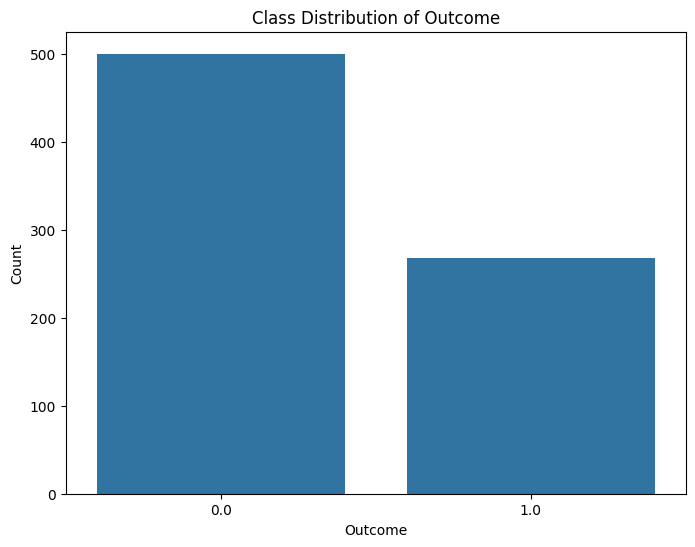

In [ ]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.countplot(x=data['Outcome'])
plt.title('Class Distribution of Outcome')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

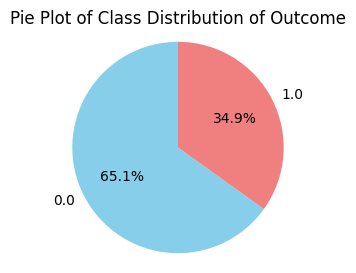

In [ ]:
# prompt: plot pie for class distribution in dataset

# Calculate the class distribution
outcome_counts = data['Outcome'].value_counts()

# Create the pie plot
plt.figure(figsize=(3, 3))
plt.pie(outcome_counts, labels=outcome_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Pie Plot of Class Distribution of Outcome')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

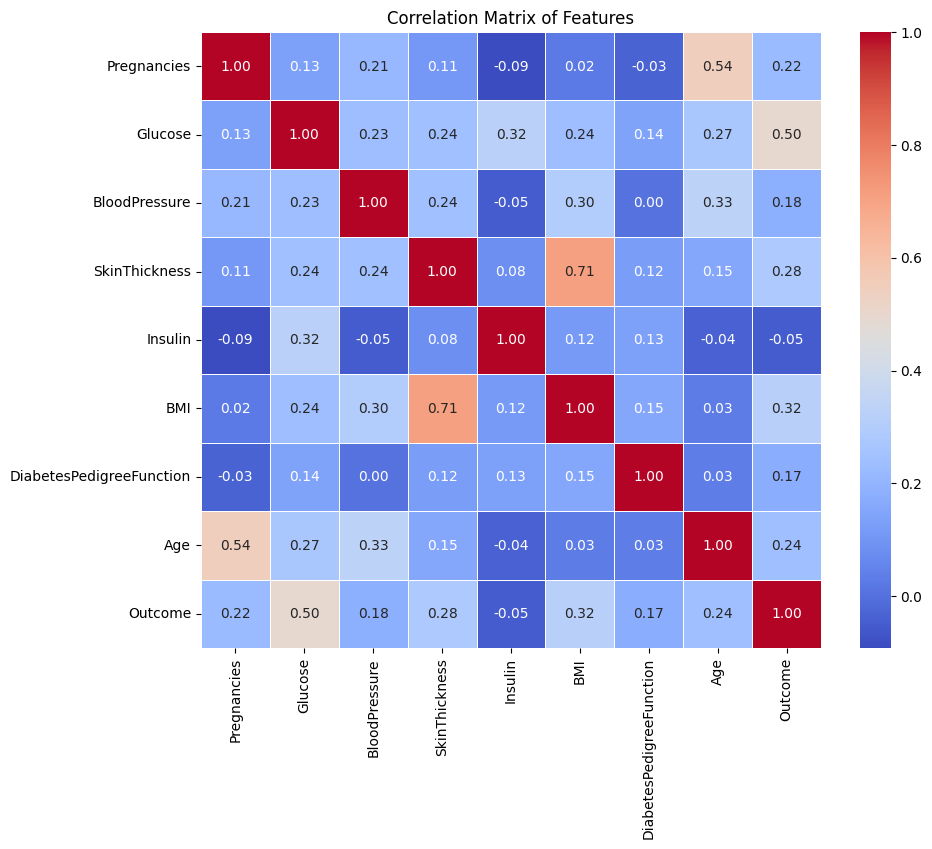

In [ ]:
# prompt: plot correlaton matrix

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plot the correlation matrix using seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Features')
plt.show()

<ipython-input-20-5c6af0aee33d>:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


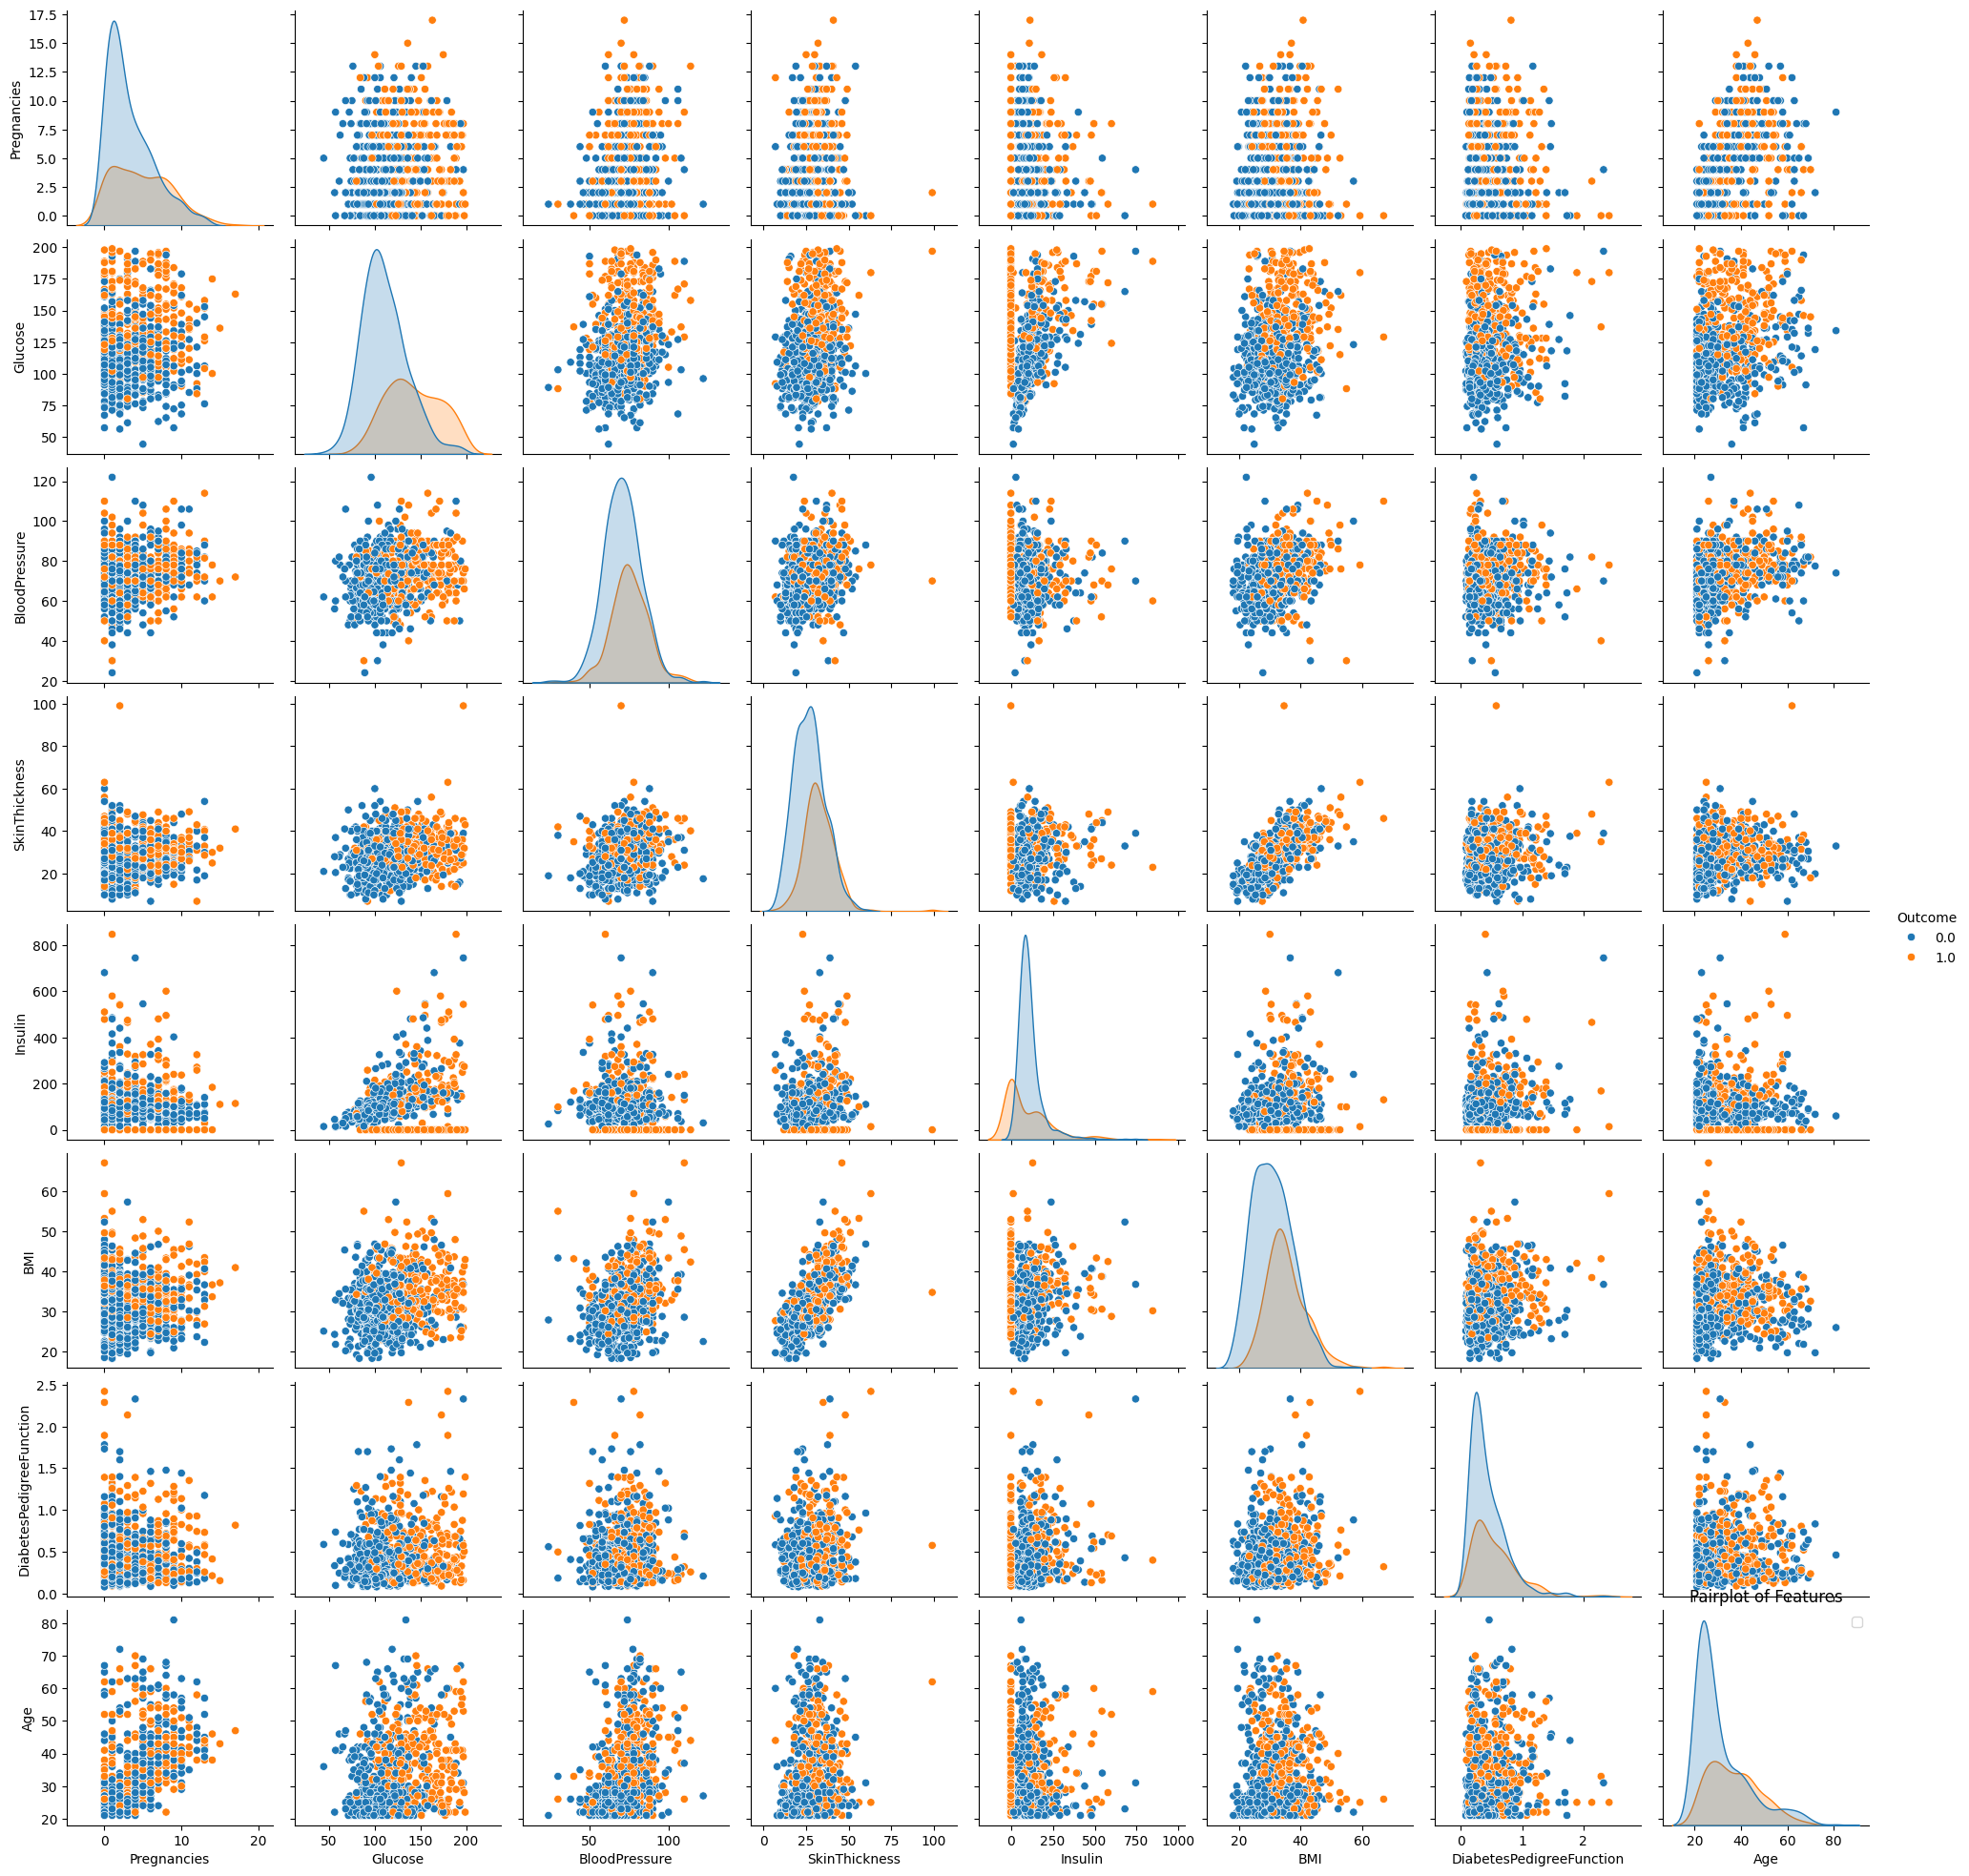

In [ ]:
# Plot a pairplot for the DataFrame
sns.pairplot(data, hue='Outcome', diag_kind='kde')
plt.title('Pairplot of Features')
plt.legend()
plt.show()

In [ ]:
X=data.drop('Outcome',axis=1)
y=data['Outcome']

## Borderline Smote to handle class imbalance

Shape of original data X: (768, 8), y: (768,)
Shape of resampled data X_resampled: (1000, 8), y_resampled: (1000,)


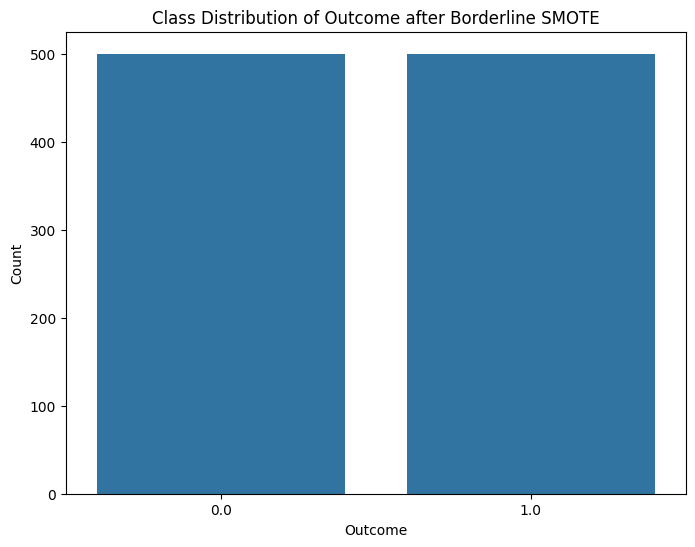

In [ ]:
from imblearn.over_sampling import SMOTE, BorderlineSMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
# Apply BorderlineSMOTE
# You might need to adjust the sampling_strategy and kind based on your data and needs
smote = BorderlineSMOTE(sampling_strategy='minority', random_state=42, kind='borderline-1')
X_resampled, y_resampled = smote.fit_resample(X, y)

print(f"Shape of original data X: {X.shape}, y: {y.shape}")
print(f"Shape of resampled data X_resampled: {X_resampled.shape}, y_resampled: {y_resampled.shape}")

# Plot the class distribution of the target variable after Borderline SMOTE
plt.figure(figsize=(8, 6))
sns.countplot(x=y_resampled)
plt.title('Class Distribution of Outcome after Borderline SMOTE')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

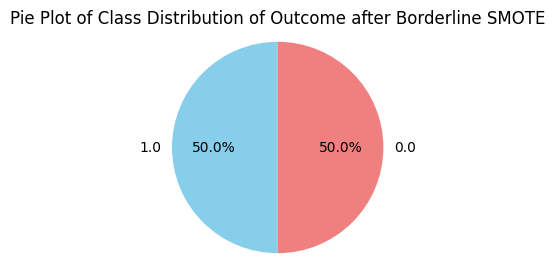

In [ ]:
# prompt: plot pie for class ditribution

# Calculate the class distribution of the resampled data
outcome_counts_resampled = y_resampled.value_counts()

# Create the pie plot for the resampled data
plt.figure(figsize=(3, 3))
plt.pie(outcome_counts_resampled, labels=outcome_counts_resampled.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Pie Plot of Class Distribution of Outcome after Borderline SMOTE')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Train-test Split

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

print(f"Shape of training data X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Shape of testing data X_test: {X_test.shape}, y_test: {y_test.shape}")

# Check class distribution in train and test sets
print("\nClass Distribution in Training Data:")
print(y_train.value_counts(normalize=True))

print("\nClass Distribution in Testing Data:")
print(y_test.value_counts(normalize=True))

Shape of training data X_train: (800, 8), y_train: (800,)
Shape of testing data X_test: (200, 8), y_test: (200,)

Class Distribution in Training Data:
Outcome
1.0    0.5
0.0    0.5
Name: proportion, dtype: float64

Class Distribution in Testing Data:
Outcome
1.0    0.5
0.0    0.5
Name: proportion, dtype: float64


# **ML Models**

## Applying Models along with Grid Search CV

## RF

In [ ]:

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create a RandomForestClassifier instance
rf = RandomForestClassifier(random_state=42)

# Create the GridSearchCV object
# cv=5 means 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("\nBest parameters found by GridSearchCV:")
print(grid_search.best_params_)
print("\nBest accuracy score found by GridSearchCV:")
print(grid_search.best_score_)

# Get the best estimator (model)
best_rf_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred_best_rf = best_rf_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_best_rf)

print(f"\nAccuracy of the best RandomForest model on the test set: {test_accuracy}")
print(f'Confusion Matrix for the best RandomForest model:\n{confusion_matrix(y_test, y_pred_best_rf)}')


Fitting 5 folds for each of 216 candidates, totalling 1080 fits

Best parameters found by GridSearchCV:
{'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Best accuracy score found by GridSearchCV:
0.9012499999999999

Accuracy of the best RandomForest model on the test set: 0.885
Confusion Matrix for the best RandomForest model:
[[85 15]
 [ 8 92]]


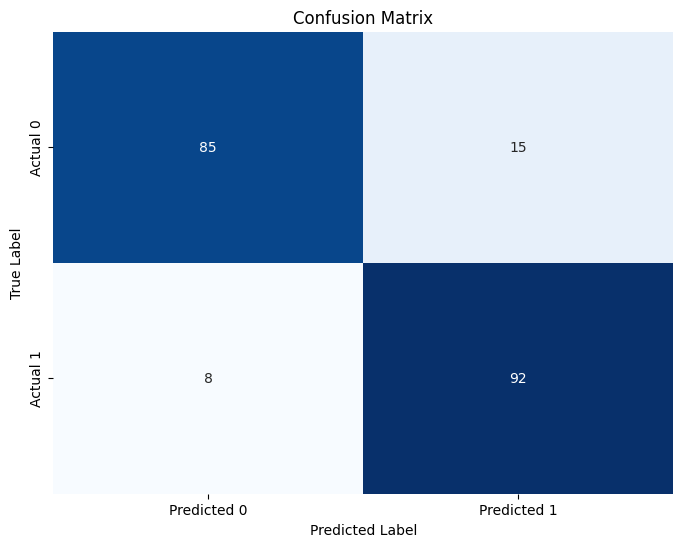

In [ ]:
# prompt: print confusion matrix for it

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_best_rf)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:

import joblib

# Save the best_rf_model
joblib.dump(best_rf_model, 'best_rf_model.pkl')
print("Best RandomForest model saved as 'best_rf_model.pkl'")


Best RandomForest model saved as 'best_rf_model.pkl'


In [ ]:

import joblib
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the trained model
loaded_model = joblib.load('best_rf_model.pkl')
print("Model loaded successfully.")

# Evaluate the loaded model on the test set
# Assuming X_test and y_test are already defined from the previous code block
y_pred_loaded = loaded_model.predict(X_test)

# Print evaluation metrics
accuracy_loaded = accuracy_score(y_test, y_pred_loaded)
conf_matrix_loaded = confusion_matrix(y_test, y_pred_loaded)

print(f'\nAccuracy of the loaded model on the test set: {accuracy_loaded}')
print(f'Confusion Matrix for the loaded model:\n{conf_matrix_loaded}')


Model loaded successfully.

Accuracy of the loaded model on the test set: 0.885
Confusion Matrix for the loaded model:
[[85 15]
 [ 8 92]]


## XGBoost and LGBM

In [ ]:

!pip install xgboost lightgbm


In [ ]:

from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC

# Define parameter grids for each model
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

param_grid_lgbm = {
    'n_estimators': [50, 100, 200],
    'max_depth': [-1, 10, 20],
    'learning_rate': [0.01, 0.1, 0.2],
    'num_leaves': [31, 64, 128],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 1],
    'kernel': ['rbf', 'linear', 'poly'],
    'probability': [True] # Ensure predict_proba is available for soft voting later if needed
}

# Initialize the classifiers
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss') # Suppress XGBoost warning
lgbm = LGBMClassifier(random_state=42)
svm = SVC(random_state=42)

# Perform GridSearchCV for XGBoost
print("Performing GridSearchCV for XGBoost...")
grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search_xgb.fit(X_train, y_train)

print("\nBest parameters for XGBoost:")
print(grid_search_xgb.best_params_)
print("Best accuracy score for XGBoost:")
print(grid_search_xgb.best_score_)

# Perform GridSearchCV for LightGBM
print("\nPerforming GridSearchCV for LightGBM...")
grid_search_lgbm = GridSearchCV(estimator=lgbm, param_grid=param_grid_lgbm, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search_lgbm.fit(X_train, y_train)

print("\nBest parameters for LightGBM:")
print(grid_search_lgbm.best_params_)
print("Best accuracy score for LightGBM:")
print(grid_search_lgbm.best_score_)

# # Perform GridSearchCV for SVM
# print("\nPerforming GridSearchCV for SVM...")
# # SVM can be computationally expensive with large C values and RBF kernel, might take time
# grid_search_svm = GridSearchCV(estimator=svm, param_grid=param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
# grid_search_svm.fit(X_train, y_train)

# print("\nBest parameters for SVM:")
# print(grid_search_svm.best_params_)
# print("Best accuracy score for SVM:")
# print(grid_search_svm.best_score_)

# y_pred_best_svm = best_svm_model.predict(X_test)
# test_accuracy_svm = accuracy_score(y_test, y_pred_best_svm)
# print(f"\nAccuracy of the best SVM model on the test set: {test_accuracy_svm}")
# print(f'Confusion Matrix for the best SVM model:\n{confusion_matrix(y_test, y_pred_best_svm)}')

# You can now use these best models or potentially ensemble them further


Performing GridSearchCV for XGBoost...
Fitting 5 folds for each of 108 candidates, totalling 540 fits

Best parameters for XGBoost:
{'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}
Best accuracy score for XGBoost:
0.8975

Performing GridSearchCV for LightGBM...
Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000088 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1480
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [ ]:

# Get the best estimators
best_xgb_model = grid_search_xgb.best_estimator_
best_lgbm_model = grid_search_lgbm.best_estimator_
# best_svm_model = grid_search_svm.best_estimator_

# Evaluate the best models on the test set
y_pred_best_xgb = best_xgb_model.predict(X_test)
test_accuracy_xgb = accuracy_score(y_test, y_pred_best_xgb)
print(f"\nAccuracy of the best XGBoost model on the test set: {test_accuracy_xgb}")
print(f'Confusion Matrix for the best XGBoost model:\n{confusion_matrix(y_test, y_pred_best_xgb)}')

y_pred_best_lgbm = best_lgbm_model.predict(X_test)
test_accuracy_lgbm = accuracy_score(y_test, y_pred_best_lgbm)
print(f"\nAccuracy of the best LightGBM model on the test set: {test_accuracy_lgbm}")
print(f'Confusion Matrix for the best LightGBM model:\n{confusion_matrix(y_test, y_pred_best_lgbm)}')



Accuracy of the best XGBoost model on the test set: 0.89
Confusion Matrix for the best XGBoost model:
[[86 14]
 [ 8 92]]

Accuracy of the best LightGBM model on the test set: 0.89
Confusion Matrix for the best LightGBM model:
[[87 13]
 [ 9 91]]


## Decision Tree

In [ ]:

from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid for the Decision Tree Classifier
param_grid_dt = {
    'criterion': ['gini', 'entropy'], # The function to measure the quality of a split
    'splitter': ['best', 'random'],   # The strategy used to choose the split at each node
    'max_depth': [None, 5, 10, 20, 30], # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],    # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2', None], # Number of features to consider when looking for the best split
    'class_weight': ['balanced', None] # Weights associated with classes
}

# Create a DecisionTreeClassifier instance
dt = DecisionTreeClassifier(random_state=21)

# Create the GridSearchCV object for Decision Tree
print("\nPerforming GridSearchCV for DecisionTreeClassifier...")
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit GridSearchCV to the training data (assuming X_train and y_train are already defined)
grid_search_dt.fit(X_train, y_train)

# Print the best parameters and the best score
print("\nBest parameters found by GridSearchCV for Decision Tree:")
print(grid_search_dt.best_params_)
print("\nBest accuracy score found by GridSearchCV for Decision Tree:")
print(grid_search_dt.best_score_)

# Get the best estimator (model)
best_dt_model = grid_search_dt.best_estimator_

# Evaluate the best model on the test set
y_pred_best_dt = best_dt_model.predict(X_test)
test_accuracy_dt = accuracy_score(y_test, y_pred_best_dt)

print(f"\nAccuracy of the best Decision Tree model on the test set: {test_accuracy_dt}")
print(f'Confusion Matrix for the best Decision Tree model:\n{confusion_matrix(y_test, y_pred_best_dt)}')

# Optionally, save the best Decision Tree model
#
# print("Best Decision Tree model saved as 'best_dt_model.pkl'")



Performing GridSearchCV for DecisionTreeClassifier...
Fitting 5 folds for each of 1080 candidates, totalling 5400 fits

Best parameters found by GridSearchCV for Decision Tree:
{'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'splitter': 'best'}

Best accuracy score found by GridSearchCV for Decision Tree:
0.8512500000000001

Accuracy of the best Decision Tree model on the test set: 0.81
Confusion Matrix for the best Decision Tree model:
[[79 21]
 [17 83]]


In [ ]:
joblib.dump(best_dt_model, 'best_dt_model.pkl')

['best_dt_model.pkl']

In [ ]:

# Save the best models
import joblib
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC

joblib.dump(best_xgb_model, 'best_xgb_model.pkl')
joblib.dump(best_lgbm_model, 'best_lgbm_model.pkl')




['best_lgbm_model.pkl']

## MLP

In [ ]:

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for MLPClassifier
param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50, 25)], # Tuple specifies number of neurons in each hidden layer
    'activation': ['tanh', 'relu'],                               # Activation function for hidden layers
    'solver': ['sgd', 'adam'],                                   # The solver for weight optimization
    'alpha': [0.0001, 0.001, 0.01],                              # L2 penalty (regularization term) parameter
    'learning_rate': ['constant', 'adaptive'],                   # Learning rate schedule for the SGD solver
    'max_iter': [200, 500, 1000],                                 # Maximum number of iterations for the solvers to converge
}

# Create an MLPClassifier instance
mlp = MLPClassifier(random_state=42)

# Create the GridSearchCV object for MLPClassifier
print("\nPerforming GridSearchCV for MLPClassifier...")
# n_jobs=-1 uses all available CPU cores
# verbose controls the verbosity of the output: 1=progress bar, 2=detailed logs
grid_search_mlp = GridSearchCV(estimator=mlp, param_grid=param_grid_mlp, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit GridSearchCV to the training data (assuming X_train and y_train are already defined and scaled if necessary for MLP)
# MLP is sensitive to feature scaling, ensure X_train and X_test are scaled before fitting
# If scaling was not applied previously, add it here using StandardScaler or MinMaxScaler
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)
# Then fit on scaled data: grid_search_mlp.fit(X_train_scaled, y_train)
# For now, assuming X_train is ready.
grid_search_mlp.fit(X_train, y_train)

# Print the best parameters and the best score
print("\nBest parameters found by GridSearchCV for MLP:")
print(grid_search_mlp.best_params_)
print("\nBest accuracy score found by GridSearchCV for MLP:")
print(grid_search_mlp.best_score_)

# Get the best estimator (model)
best_mlp_model = grid_search_mlp.best_estimator_

# Evaluate the best model on the test set (use scaled test data if scaling was applied)
# y_pred_best_mlp = best_mlp_model.predict(X_test_scaled)
y_pred_best_mlp = best_mlp_model.predict(X_test)
test_accuracy_mlp = accuracy_score(y_test, y_pred_best_mlp)

print(f"\nAccuracy of the best MLP model on the test set: {test_accuracy_mlp}")
print(f'Confusion Matrix for the best MLP model:\n{confusion_matrix(y_test, y_pred_best_mlp)}')

# Optionally, save the best MLP model
joblib.dump(best_mlp_model, 'best_mlp_model.pkl')
print("Best MLP model saved as 'best_mlp_model.pkl'")



Performing GridSearchCV for MLPClassifier...
Fitting 5 folds for each of 288 candidates, totalling 1440 fits

Best parameters found by GridSearchCV for MLP:
{'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'max_iter': 500, 'solver': 'adam'}

Best accuracy score found by GridSearchCV for MLP:
0.86

Accuracy of the best MLP model on the test set: 0.89
Confusion Matrix for the best MLP model:
[[91  9]
 [13 87]]
Best MLP model saved as 'best_mlp_model.pkl'


# Voting Ensemble

In [ ]:

from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the best trained models
best_dt_model = joblib.load('best_dt_model.pkl')
best_lgbm_model = joblib.load('best_lgbm_model.pkl')
best_mlp_model = joblib.load('best_mlp_model.pkl')
best_rf_model = joblib.load('best_rf_model.pkl') # Assuming you saved this one
best_xgb_model = joblib.load('best_xgb_model.pkl')

# Create the ensemble model using VotingClassifier
# We'll use soft voting, which averages the predicted probabilities
# Ensure that the base estimators support predict_proba (most classifiers do)
ensemble_model = VotingClassifier(
    estimators=[
        ('dt', best_dt_model),
        ('lgbm', best_lgbm_model),
        ('mlp', best_mlp_model),
        ('rf', best_rf_model),
        ('xgb', best_xgb_model)
    ],
    voting='soft'  # Use 'soft' for probability-based voting
)

# Train the ensemble model
# The VotingClassifier will train each base estimator if they haven't been already
# Since we are using pre-trained models, fitting the VotingClassifier effectively
# combines their predictions.
print("\nTraining the ensemble model...")
ensemble_model.fit(X_train, y_train) # Fit the ensemble on the training data

# Evaluate the ensemble model on the test set
print("\nEvaluating the ensemble model on the test set...")
y_pred_ensemble = ensemble_model.predict(X_test)

# Calculate accuracy and confusion matrix
ensemble_accuracy = accuracy_score(y_test, y_pred_ensemble)
ensemble_conf_matrix = confusion_matrix(y_test, y_pred_ensemble)

print(f"\nAccuracy of the ensemble model on the test set: {ensemble_accuracy}")
print(f'Confusion Matrix for the ensemble model:\n{ensemble_conf_matrix}')

# Optionally, you can save the ensemble model
joblib.dump(ensemble_model, 'ensemble_model.pkl')
print("Ensemble model saved as 'ensemble_model.pkl'")



Training the ensemble model...
[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000144 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1480
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

Evaluating the ensemble model on the test set...

Accuracy of the ensemble model on the test set: 0.89
Confusion Matrix for the ensemble model:
[[87 13]
 [ 9 91

# Stacking Ensemble

In [ ]:

from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

# Load the best trained models
# Assuming the best base models (best_dt_model, best_lgbm_model, best_mlp_model, best_rf_model, best_xgb_model)
# are already loaded from the previous steps and are the best models found via hyperparameter tuning.

# Define the base models (level 0 models)
estimators = [
    ('dt', best_dt_model),
    ('lgbm', best_lgbm_model),
    ('mlp', best_mlp_model),
    ('rf', best_rf_model),
    ('xgb', best_xgb_model)
]

# Define the meta-model (level 1 model)
# Logistic Regression is a common choice for a simple, robust meta-model.
# You can choose other models as well (e.g., a different classifier).
meta_model = LogisticRegression()

# Create the StackingClassifier
# cv: Number of cross-validation folds to use when fitting the base estimators.
#     Predictions from these out-of-fold data are used to train the meta-model.
# stack_method: Method to predict probabilities or classes from base models.
# n_jobs: Number of CPU cores to use (-1 means all available).
stacking_model = StackingClassifier(
    estimators=estimators,
    final_estimator=meta_model,
    cv=5,  # Use 5-fold cross-validation for training the meta-model
    stack_method='predict_proba', # Use predicted probabilities
    n_jobs=-1,
    verbose=1 # Controls verbosity
)

# Train the stacking ensemble model
print("\nTraining the stacking ensemble model...")
stacking_model.fit(X_train, y_train)

# Evaluate the stacking ensemble model on the test set
print("\nEvaluating the stacking ensemble model on the test set...")
y_pred_stacking = stacking_model.predict(X_test)

# Calculate accuracy and confusion matrix
stacking_accuracy = accuracy_score(y_test, y_pred_stacking)
stacking_conf_matrix = confusion_matrix(y_test, y_pred_stacking)

print(f"\nAccuracy of the stacking ensemble model on the test set: {stacking_accuracy}")
print(f'Confusion Matrix for the stacking ensemble model:\n{stacking_conf_matrix}')

# Optionally, you can evaluate the stacking model using cross-validation on the entire resampled dataset
# Note: This can take significant time as it involves retraining the base models and meta-model multiple times.
# print("\nPerforming cross-validation for the stacking ensemble model...")
# cv_scores_stacking = cross_val_score(stacking_model, X_resampled, y_resampled, cv=5, scoring='accuracy', n_jobs=-1)
# print(f"Cross-validated accuracy scores: {cv_scores_stacking}")
# print(f"Mean cross-validated accuracy: {cv_scores_stacking.mean()}")

# Optionally, save the stacking ensemble model
joblib.dump(stacking_model, 'stacking_model.pkl')
print("Stacking ensemble model saved as 'stacking_model.pkl'")



Training the stacking ensemble model...

Evaluating the stacking ensemble model on the test set...

Accuracy of the stacking ensemble model on the test set: 0.9
Confusion Matrix for the stacking ensemble model:
[[88 12]
 [ 8 92]]
Stacking ensemble model saved as 'stacking_model.pkl'


# Comparison of all Models Performance

In [ ]:

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.neural_network import MLPClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from scikeras.wrappers import KerasClassifier
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression

# Load the best trained models (assuming they were saved in the previous steps)
# If you didn't save them or are running this as a standalone cell,
# you would need to re-run the training and tuning steps to get these objects.

try:
  best_dt_model = joblib.load('best_dt_model.pkl')
  best_lgbm_model = joblib.load('best_lgbm_model.pkl')
  best_mlp_model = joblib.load('best_mlp_model.pkl')
  best_rf_model = joblib.load('best_rf_model.pkl') # Assuming you saved this one
  best_xgb_model = joblib.load('best_xgb_model.pkl')
  # Load the best GRU model saved as a Keras model
  # best_gru_model_keras = tf.keras.models.load_model('best_gru_model_gridsearch.h5')

  print("Successfully loaded pre-trained models.")

except FileNotFoundError:
    print("One or more model files not found.")
    print("Please ensure the previous cells saving the models were executed successfully.")
    # You might want to exit or handle this case, e.g., by retraining
    # For demonstration, we will assume models are available in memory
    # if this cell is run after the training cells.

# If you trained a GRU model using Keras directly (without KerasClassifier)
# you might need to load it differently. If you used KerasClassifier,
# the model object should be saved/loaded within the wrapper if needed.
# However, for ensemble, we'll use the trained models directly.


print("\nAll relevant models are loaded or available in the environment.")

Successfully loaded pre-trained models.

All relevant models are loaded or available in the environment.


In [ ]:
# prompt: print accuracy scores of all models

print("\n--- Model Accuracy Scores ---")
print(f"Random Forest (Grid Search): {test_accuracy:.4f}")
print(f"XGBoost (Grid Search): {test_accuracy_xgb:.4f}")
print(f"LightGBM (Grid Search): {test_accuracy_lgbm:.4f}")
# print(f"SVM (Grid Search): {test_accuracy_svm:.4f}") # Uncomment if SVM was trained
#print(f"Random Forest (Randomized Search): {test_accuracy_rs:.4f}")
print(f"Decision Tree (Grid Search): {test_accuracy_dt:.4f}")
# print(f"GRU (Grid Search): {test_accuracy_gru_gs:.4f}") # Uncomment if GRU was trained successfully
print(f"MLP (Grid Search): {test_accuracy_mlp:.4f}")
print(f"Voting Ensemble: {ensemble_accuracy:.4f}")
print(f"Stacking Ensemble: {stacking_accuracy:.4f}")


--- Model Accuracy Scores ---
Random Forest (Grid Search): 0.8850
XGBoost (Grid Search): 0.8900
LightGBM (Grid Search): 0.8900
Decision Tree (Grid Search): 0.8100
MLP (Grid Search): 0.8900
Voting Ensemble: 0.8900
Stacking Ensemble: 0.9000


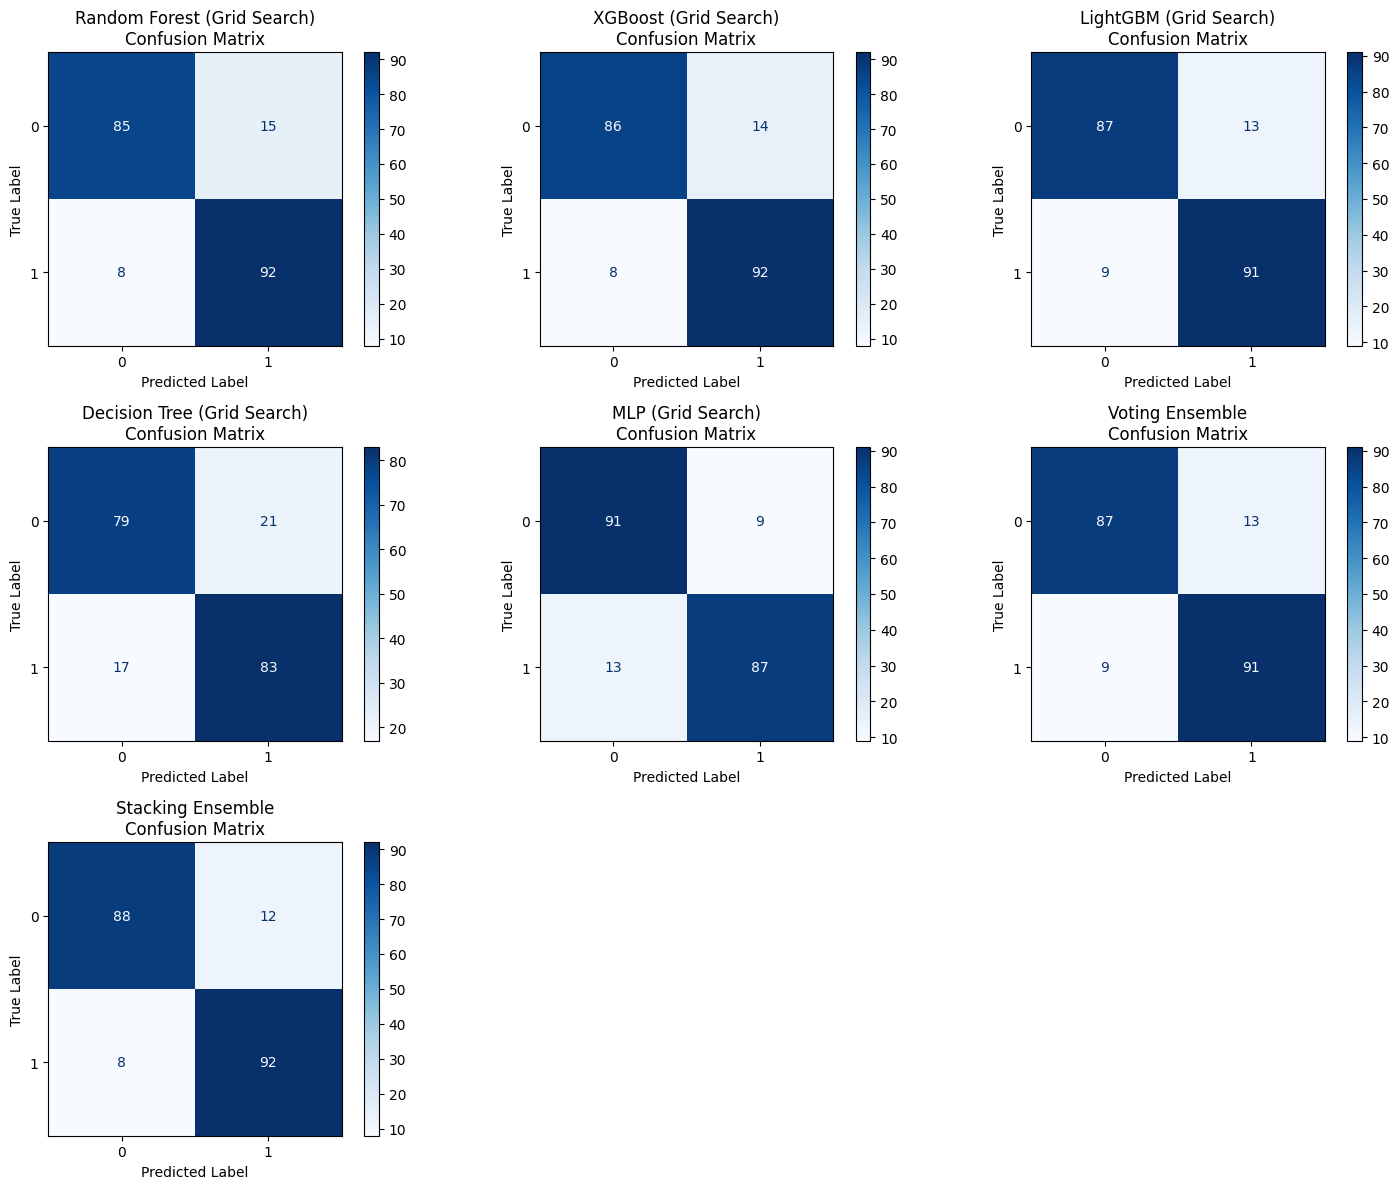

In [ ]:
# prompt: plot confusion matrix for all models

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Dictionary to store confusion matrices for each model
conf_matrices = {
    'Random Forest (Grid Search)': confusion_matrix(y_test, y_pred_best_rf),
    'XGBoost (Grid Search)': confusion_matrix(y_test, y_pred_best_xgb),
    'LightGBM (Grid Search)': confusion_matrix(y_test, y_pred_best_lgbm),
    #'Random Forest (Randomized Search)': confusion_matrix(y_test, y_pred_best_rf_rs),
    'Decision Tree (Grid Search)': confusion_matrix(y_test, y_pred_best_dt),
    # Uncomment the following lines if you successfully trained and evaluated these models
    # 'GRU (Grid Search)': confusion_matrix(y_test, y_pred_best_gru_gs),
    'MLP (Grid Search)': confusion_matrix(y_test, y_pred_best_mlp),
    'Voting Ensemble': confusion_matrix(y_test, y_pred_ensemble),
    'Stacking Ensemble': confusion_matrix(y_test, y_pred_stacking),
}

# Plot confusion matrices for all models
n_models = len(conf_matrices)
n_cols = 3  # Number of columns in the subplot grid
n_rows = (n_models + n_cols - 1) // n_cols # Calculate required rows

plt.figure(figsize=(n_cols * 5, n_rows * 4)) # Adjust figure size based on number of plots

for i, (model_name, matrix) in enumerate(conf_matrices.items()):
    plt.subplot(n_rows, n_cols, i + 1)
    disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=['0', '1']) # Adjust labels if needed
    disp.plot(cmap=plt.cm.Blues, ax=plt.gca())
    plt.title(f'{model_name}\nConfusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()


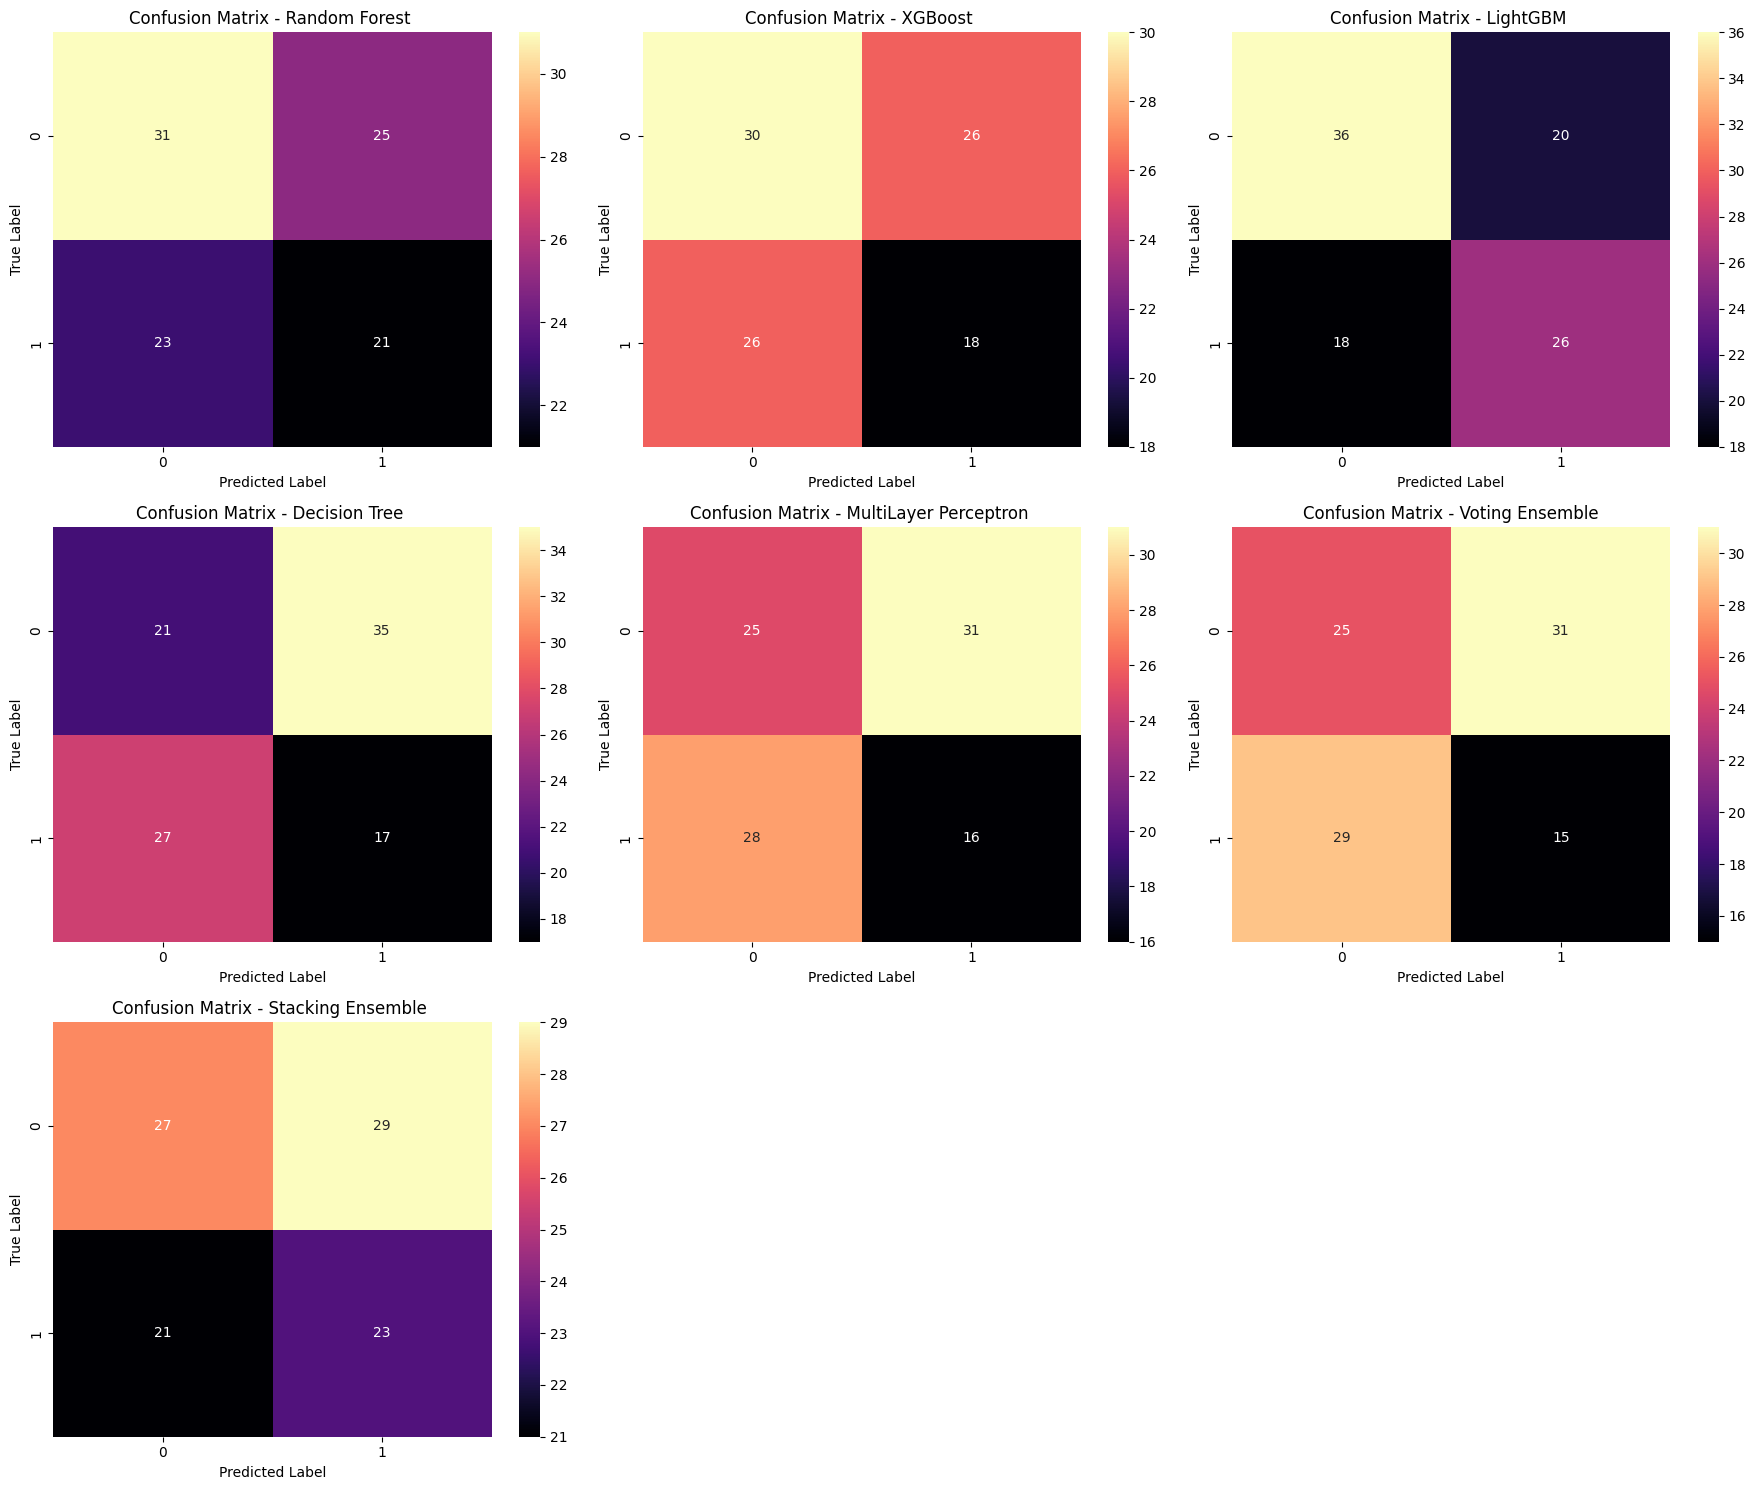

In [ ]:

# Store the confusion matrices and model names
conf_matrices = {
    'Random Forest ': confusion_matrix(y_test, y_pred_best_rf),
    'XGBoost ': confusion_matrix(y_test, y_pred_best_xgb),
    'LightGBM ': confusion_matrix(y_test, y_pred_best_lgbm),
    'Decision Tree ': confusion_matrix(y_test, y_pred_best_dt),
    'MultiLayer Perceptron ': confusion_matrix(y_test, y_pred_best_mlp),
    'Voting Ensemble': confusion_matrix(y_test, y_pred_ensemble),
    'Stacking Ensemble ': confusion_matrix(y_test, y_pred_stacking), # From stacking_model

}

# Plot confusion matrices for each model
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 15))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

for i, (model_name, cm) in enumerate(conf_matrices.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap='magma', ax=axes[i])
    axes[i].set_title(f'Confusion Matrix - {model_name}')
    axes[i].set_xlabel('Predicted Label')
    axes[i].set_ylabel('True Label')

# Hide any unused subplots if the number of models is less than 9
if len(conf_matrices) < len(axes):
    for j in range(len(conf_matrices), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


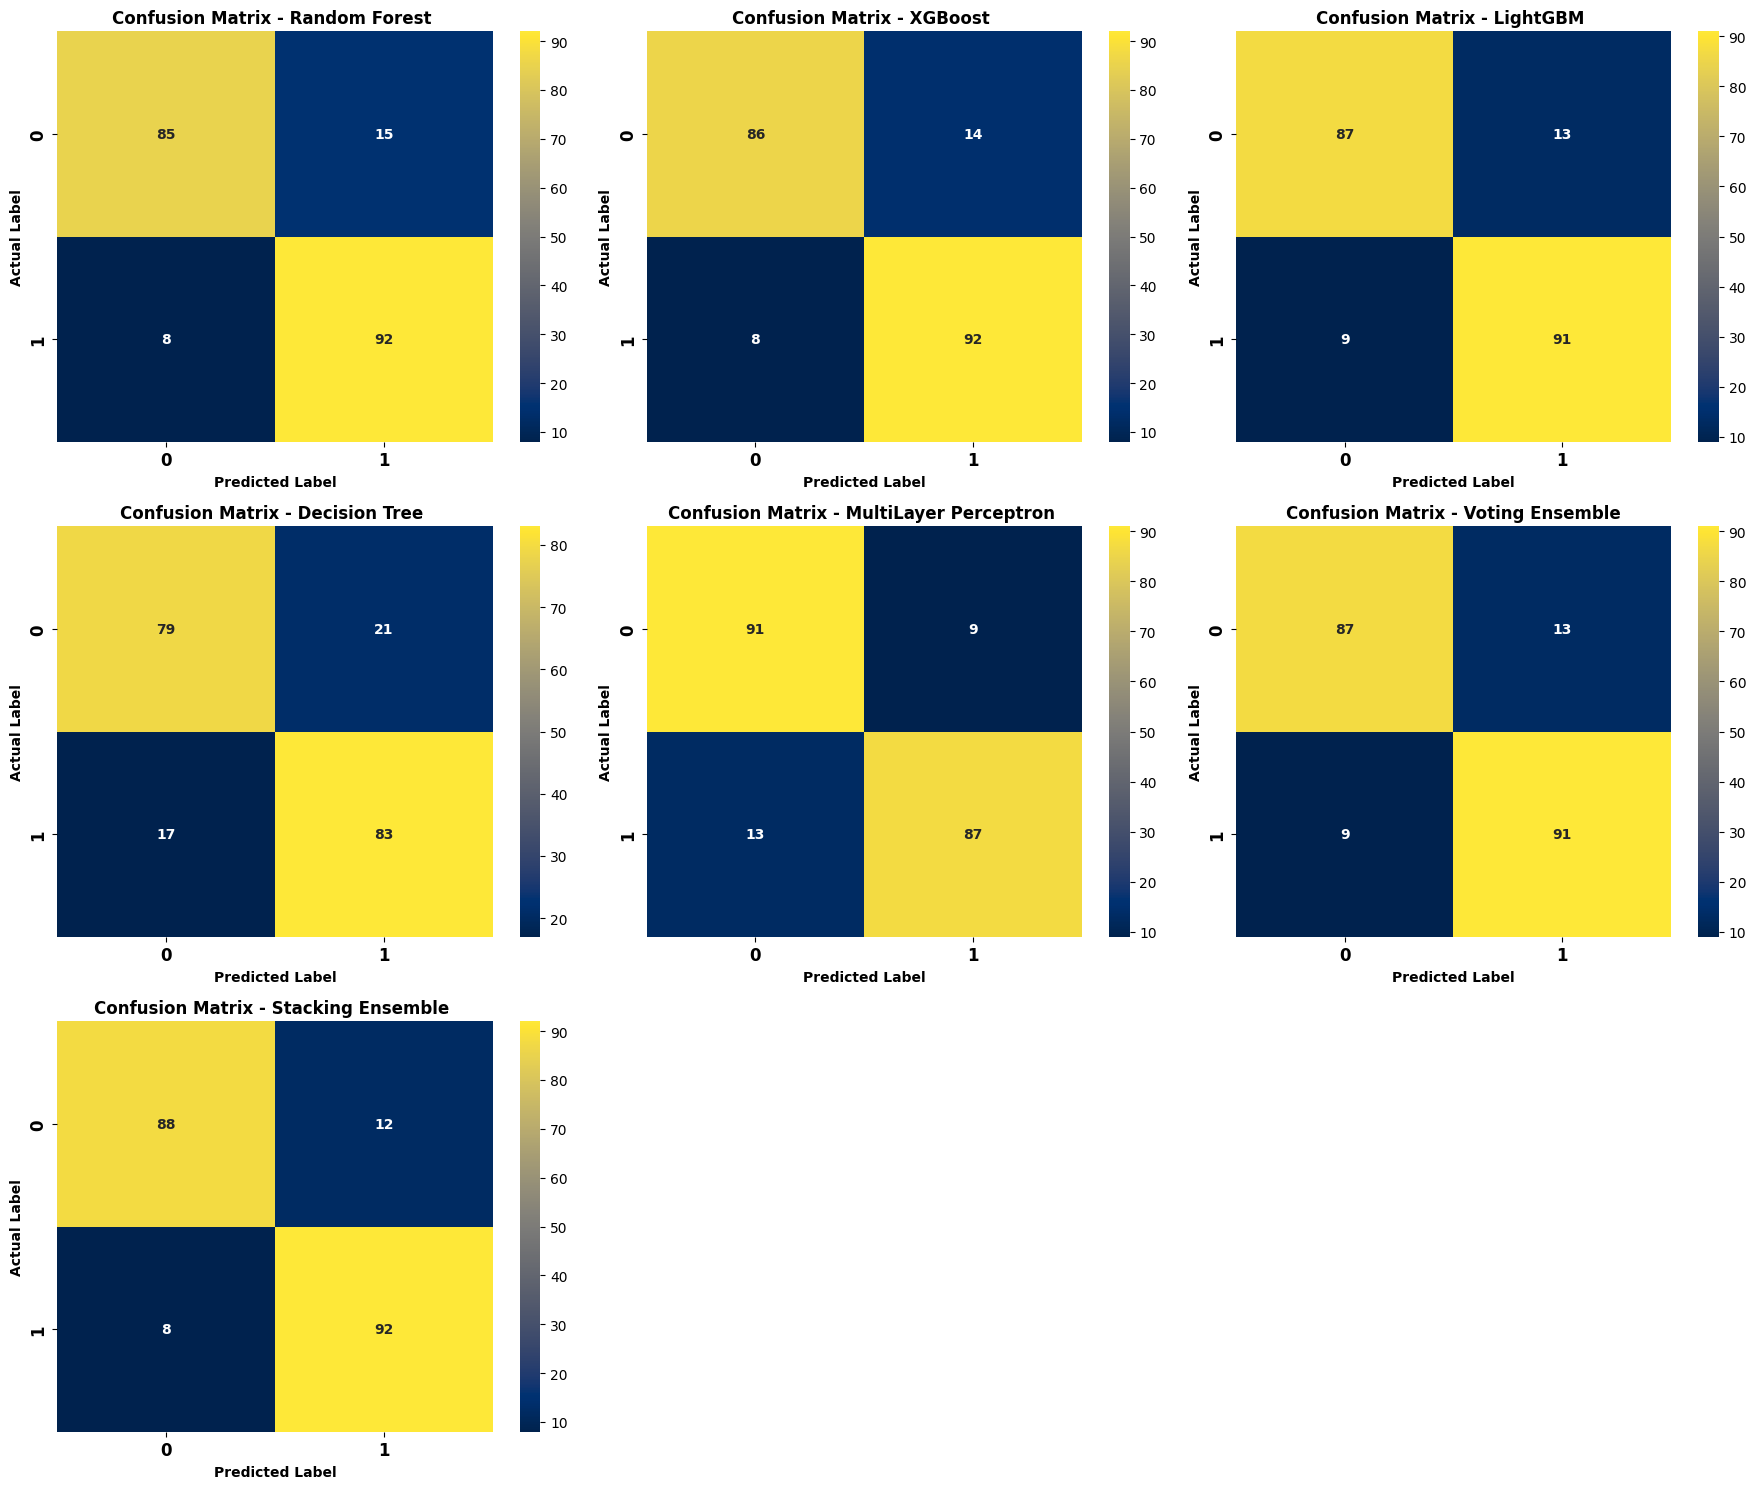

In [ ]:
# Store the confusion matrices and model names
conf_matrices = {
    'Random Forest ': confusion_matrix(y_test, y_pred_best_rf),
    'XGBoost ': confusion_matrix(y_test, y_pred_best_xgb),
    'LightGBM ': confusion_matrix(y_test, y_pred_best_lgbm),
    'Decision Tree ': confusion_matrix(y_test, y_pred_best_dt),
    'MultiLayer Perceptron ': confusion_matrix(y_test, y_pred_best_mlp),
    'Voting Ensemble': confusion_matrix(y_test, y_pred_ensemble),
    'Stacking Ensemble ': confusion_matrix(y_test, y_pred_stacking), # From stacking_model

}

# Plot confusion matrices for each model
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 15))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

for i, (model_name, cm) in enumerate(conf_matrices.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap='cividis', ax=axes[i])
    axes[i].set_title(f'Confusion Matrix - {model_name}', fontweight='bold')
    axes[i].set_xlabel('Predicted Label', fontweight='bold')
    axes[i].set_ylabel('Actual Label', fontweight='bold')

    # Make tick labels bold
    axes[i].tick_params(axis='x', labelsize=12, labelcolor='black')
    axes[i].tick_params(axis='y', labelsize=12, labelcolor='black')


    for label in axes[i].get_xticklabels():
       label.set_fontweight('bold')
# For y-axis tick labels
    for label in axes[i].get_yticklabels():
      label.set_fontweight('bold')
    # Make annotation text bold (requires iterating through the text objects in the heatmap)
    for text in axes[i].texts:
        text.set_fontweight('bold')


# Hide any unused subplots if the number of models is less than 9
if len(conf_matrices) < len(axes):
    for j in range(len(conf_matrices), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
# prompt: plot auc of all models and make all text bold

from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression # Import LogisticRegression for Stacking final_estimator
from sklearn.ensemble import StackingClassifier # Import StackingClassifier


# Calculate ROC curve and AUC for each model
fpr = {}
tpr = {}
roc_auc = {}

# Models dictionary
models = {
    'Random Forest': best_rf_model,
    'XGBoost': best_xgb_model,
    'LightGBM': best_lgbm_model,
    'Decision Tree': best_dt_model,
    'MLP': best_mlp_model,
    'Voting Ensemble': ensemble_model,
    'Stacking Ensemble': stacking_model
}

plt.figure(figsize=(10, 8))

for name, model in models.items():
    try:
        # Get predicted probabilities for the positive class (class 1)
        if hasattr(model, "predict_proba"):
            y_prob = model.predict_proba(X_test)[:, 1]
        elif hasattr(model, "decision_function"): # For models like SVM without predict_proba by default
             y_prob = model.decision_function(X_test)
             # If using decision_function, consider scaling or transforming for AUC plot if needed
             # For binary classification, decision_function can often be used directly,
             # but predict_proba is generally preferred for AUC plots.
             # Make sure probability=True is set for SVC if using predict_proba.
             # If decision_function is used, interpretation is different, but for AUC, relative scores matter.
        else:
            print(f"Model {name} does not have predict_proba or decision_function.")
            continue

        # Calculate ROC curve
        fpr[name], tpr[name], _ = roc_curve(y_test, y_prob)

        # Calculate AUC
        roc_auc[name] = auc(fpr[name], tpr[name])

        # Plot ROC curve
        plt.plot(fpr[name], tpr[name], label=f'{name} (AUC = {roc_auc[name]:.2f})')

    except Exception as e:
        print(f"Error plotting ROC for {name}: {e}")
        continue


# Plot the diagonal line representing a random classifier
plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.50)')

# Customize the plot
plt.xlabel('False Positive Rate', fontweight='bold')
plt.ylabel('True Positive Rate', fontweight='bold')
plt.title('ROC Curve for All Models', fontweight='bold')
plt.legend(loc='lower right',fontweight='bold')
plt.grid(True)

# Make axis tick labels bold
for tick in plt.gca().get_xticklabels():
    tick.set_fontweight('bold')
for tick in plt.gca().get_yticklabels():
    tick.set_fontweight('bold')

plt.show()

print("\n--- Model AUC Scores ---")
for name, score in roc_auc.items():
    print(f"{name}: {score:.4f}")


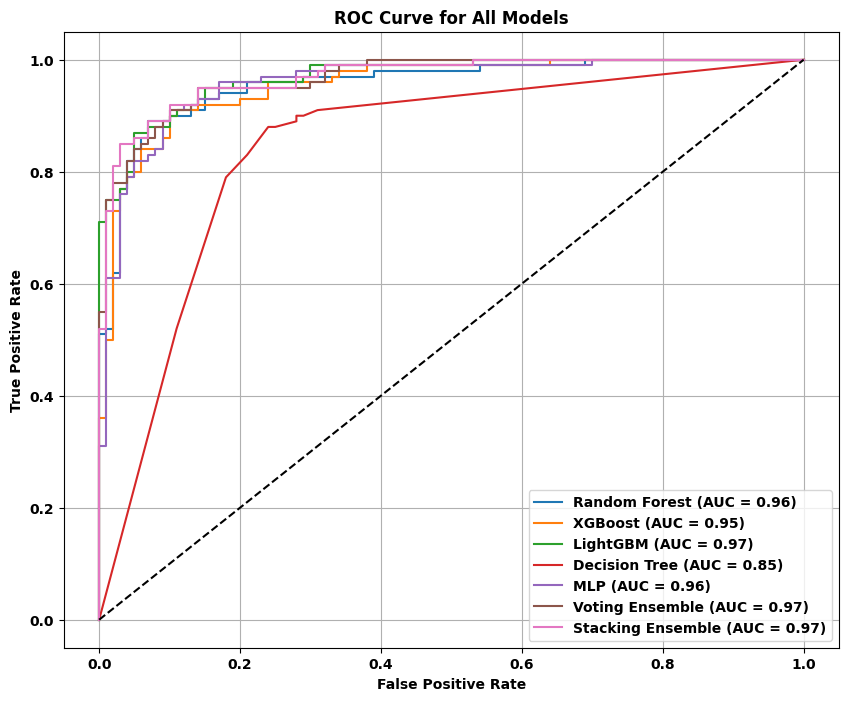


--- Model AUC Scores ---
Random Forest: 0.9568
XGBoost: 0.9547
LightGBM: 0.9687
Decision Tree: 0.8458
MLP: 0.9588
Voting Ensemble: 0.9669
Stacking Ensemble: 0.9681


In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
import matplotlib.pyplot as plt
import seaborn as sns # Assuming seaborn is used for styling or other plots

# Calculate ROC curve and AUC for each model
fpr = {}
tpr = {}
roc_auc = {}

# Models dictionary
models = {
    'Random Forest': best_rf_model,
    'XGBoost': best_xgb_model,
    'LightGBM': best_lgbm_model,
    'Decision Tree': best_dt_model,
    'MLP': best_mlp_model,
    'Voting Ensemble': ensemble_model,
    'Stacking Ensemble': stacking_model
}

plt.figure(figsize=(10, 8))

for name, model in models.items():
    try:
        # Get predicted probabilities for the positive class (class 1)
        if hasattr(model, "predict_proba"):
            y_prob = model.predict_proba(X_test)[:, 1]
        elif hasattr(model, "decision_function"):
             y_prob = model.decision_function(X_test)
        else:
            print(f"Model {name} does not have predict_proba or decision_function.")
            continue

        # Calculate ROC curve
        fpr[name], tpr[name], _ = roc_curve(y_test, y_prob)

        # Calculate AUC
        roc_auc[name] = auc(fpr[name], tpr[name])

        # Plot ROC curve
        plt.plot(fpr[name], tpr[name], label=f'{name} (AUC = {roc_auc[name]:.2f})')

    except Exception as e:
        print(f"Error plotting ROC for {name}: {e}")
        continue

# Plot the diagonal line representing a random classifier
plt.plot([0, 1], [0, 1], 'k--')

# Customize the plot
plt.xlabel('False Positive Rate', fontweight='bold')
plt.ylabel('True Positive Rate', fontweight='bold')
plt.title('ROC Curve for All Models', fontweight='bold')

# Make legend bold using a font dictionary
plt.legend(loc='lower right', prop={'weight': 'bold'})

plt.grid(True)

# Make axis tick labels bold
for tick in plt.gca().get_xticklabels():
    tick.set_fontweight('bold')
for tick in plt.gca().get_yticklabels():
    tick.set_fontweight('bold')

plt.show()

print("\n--- Model AUC Scores ---")
for name, score in roc_auc.items():
    print(f"{name}: {score:.4f}")

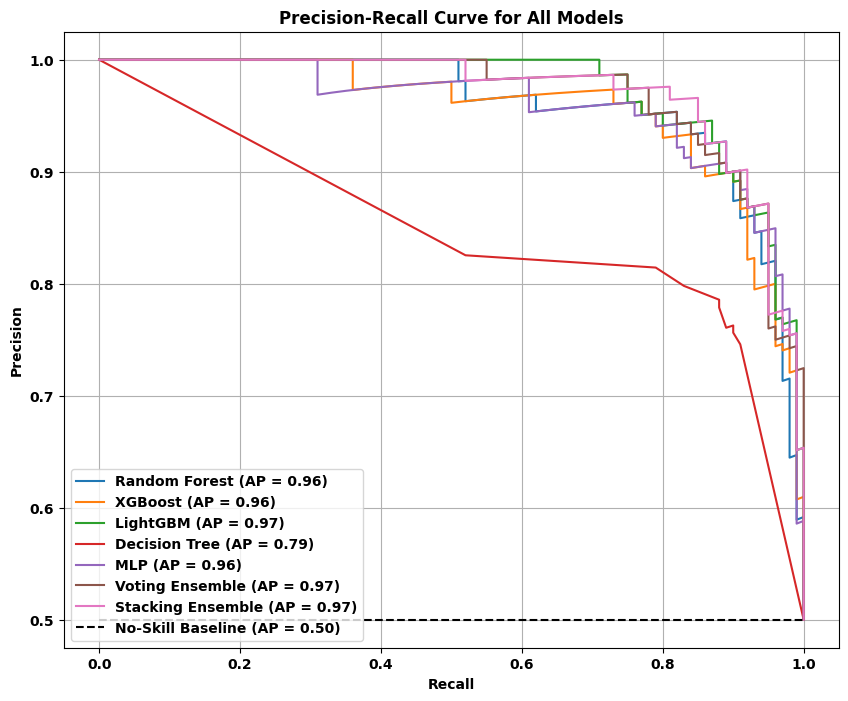


--- Model Average Precision (AP) Scores ---
Random Forest: 0.9603
XGBoost: 0.9558
LightGBM: 0.9721
Decision Tree: 0.7880
MLP: 0.9579
Voting Ensemble: 0.9694
Stacking Ensemble: 0.9709


In [ ]:
# prompt: plot prc for all models

from sklearn.metrics import precision_recall_curve, average_precision_score

# Calculate Precision-Recall curve and Average Precision (AP) for each model
precision = {}
recall = {}
average_precision = {}

plt.figure(figsize=(10, 8))

for name, model in models.items(): # Assuming 'models' dictionary is defined as in the ROC code block
    try:
        # Get predicted probabilities for the positive class (class 1)
        if hasattr(model, "predict_proba"):
            y_prob = model.predict_proba(X_test)[:, 1]
        elif hasattr(model, "decision_function"):
             y_prob = model.decision_function(X_test)
        else:
            print(f"Model {name} does not have predict_proba or decision_function for PRC.")
            continue

        # Calculate Precision-Recall curve
        precision[name], recall[name], _ = precision_recall_curve(y_test, y_prob)

        # Calculate Average Precision (AP)
        average_precision[name] = average_precision_score(y_test, y_prob)

        # Plot Precision-Recall curve
        plt.plot(recall[name], precision[name], label=f'{name} (AP = {average_precision[name]:.2f})')

    except Exception as e:
        print(f"Error plotting PRC for {name}: {e}")
        continue

# Plot the baseline (no-skill classifier for imbalanced data)
# The baseline is the proportion of the positive class in the dataset.
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], 'k--', label=f'No-Skill Baseline (AP = {no_skill:.2f})')

# Customize the plot
plt.xlabel('Recall', fontweight='bold')
plt.ylabel('Precision', fontweight='bold')
plt.title('Precision-Recall Curve for All Models', fontweight='bold')

# Make legend bold using a font dictionary
plt.legend(loc='lower left', prop={'weight': 'bold'}) # Lower left is often better for PRC

plt.grid(True)

# Make axis tick labels bold
for tick in plt.gca().get_xticklabels():
    tick.set_fontweight('bold')
for tick in plt.gca().get_yticklabels():
    tick.set_fontweight('bold')

plt.show()

print("\n--- Model Average Precision (AP) Scores ---")
for name, score in average_precision.items():
    print(f"{name}: {score:.4f}")

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import seaborn as sns # Assuming seaborn is used for styling or other plots

# Calculate Precision-Recall curve and Average Precision (AP) for each model
precision = {}
recall = {}
average_precision = {}

# Ensure 'models' dictionary contains your trained models and 'X_test', 'y_test' are defined
# Example 'models' dictionary structure (based on your previous code):
# models = {
#     'Random Forest': best_rf_model,
#     'XGBoost': best_xgb_model,
#     'LightGBM': best_lgbm_model,
#     'Decision Tree': best_dt_model,
#     'MLP': best_mlp_model,
#     'Voting Ensemble': ensemble_model,
#     'Stacking Ensemble': stacking_model
# }


plt.figure(figsize=(10, 8))

for name, model in models.items():
    try:
        # Get predicted probabilities for the positive class (class 1)
        if hasattr(model, "predict_proba"):
            y_prob = model.predict_proba(X_test)[:, 1]
        elif hasattr(model, "decision_function"):
             y_prob = model.decision_function(X_test)
        else:
            print(f"Model {name} does not have predict_proba or decision_function for PRC.")
            continue

        # Calculate Precision-Recall curve
        precision[name], recall[name], _ = precision_recall_curve(y_test, y_prob)

        # Calculate Average Precision (AP)
        average_precision[name] = average_precision_score(y_test, y_prob)

        # Plot Precision-Recall curve
        plt.plot(recall[name], precision[name], label=f'{name} (AP = {average_precision[name]:.2f})')

    except Exception as e:
        print(f"Error plotting PRC for {name}: {e}")
        continue

# Plot the baseline (no-skill classifier for imbalanced data)
# The baseline is the proportion of the positive class in the dataset.
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], 'k--', label=f'No-Skill Baseline (AP = {no_skill:.2f})')

# Customize the plot
plt.xlabel('Recall', fontweight='bold')
plt.ylabel('Precision', fontweight='bold')
plt.title('Precision-Recall Curve for All Models', fontweight='bold')

# Make legend bold using a font dictionary
plt.legend(loc='lower left', prop={'weight': 'bold'})

plt.grid(True)

# Make axis tick labels bold
for tick in plt.gca().get_xticklabels():
    tick.set_fontweight('bold')
for tick in plt.gca().get_yticklabels():
    tick.set_fontweight('bold')

plt.show()

print("\n--- Model Average Precision Scores ---")
for name, score in average_precision.items():
    print(f"{name}: {score:.4f}")

In [ ]:
# prompt: print accuracy,f1-score,precision,recall

from sklearn.metrics import classification_report

# Dictionary to store predictions for each model
y_preds = {
    'Random Forest': y_pred_best_rf,
    'XGBoost': y_pred_best_xgb,
    'LightGBM': y_pred_best_lgbm,
    'Decision Tree': y_pred_best_dt,
    'MLP': y_pred_best_mlp,
    'Voting Ensemble': y_pred_ensemble,
    'Stacking Ensemble': y_pred_stacking,
}

print("\n--- Model Performance Metrics ---")
for name, y_pred in y_preds.items():
    print(f"\n--- {name} ---")
    print(classification_report(y_test, y_pred))



--- Model Performance Metrics ---

--- Random Forest ---
              precision    recall  f1-score   support

         0.0       0.91      0.85      0.88       100
         1.0       0.86      0.92      0.89       100

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.88       200
weighted avg       0.89      0.89      0.88       200


--- XGBoost ---
              precision    recall  f1-score   support

         0.0       0.91      0.86      0.89       100
         1.0       0.87      0.92      0.89       100

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.89       200
weighted avg       0.89      0.89      0.89       200


--- LightGBM ---
              precision    recall  f1-score   support

         0.0       0.91      0.87      0.89       100
         1.0       0.88      0.91      0.89       100

    accuracy                           0.89       200
   macro avg       0.89      0.89  

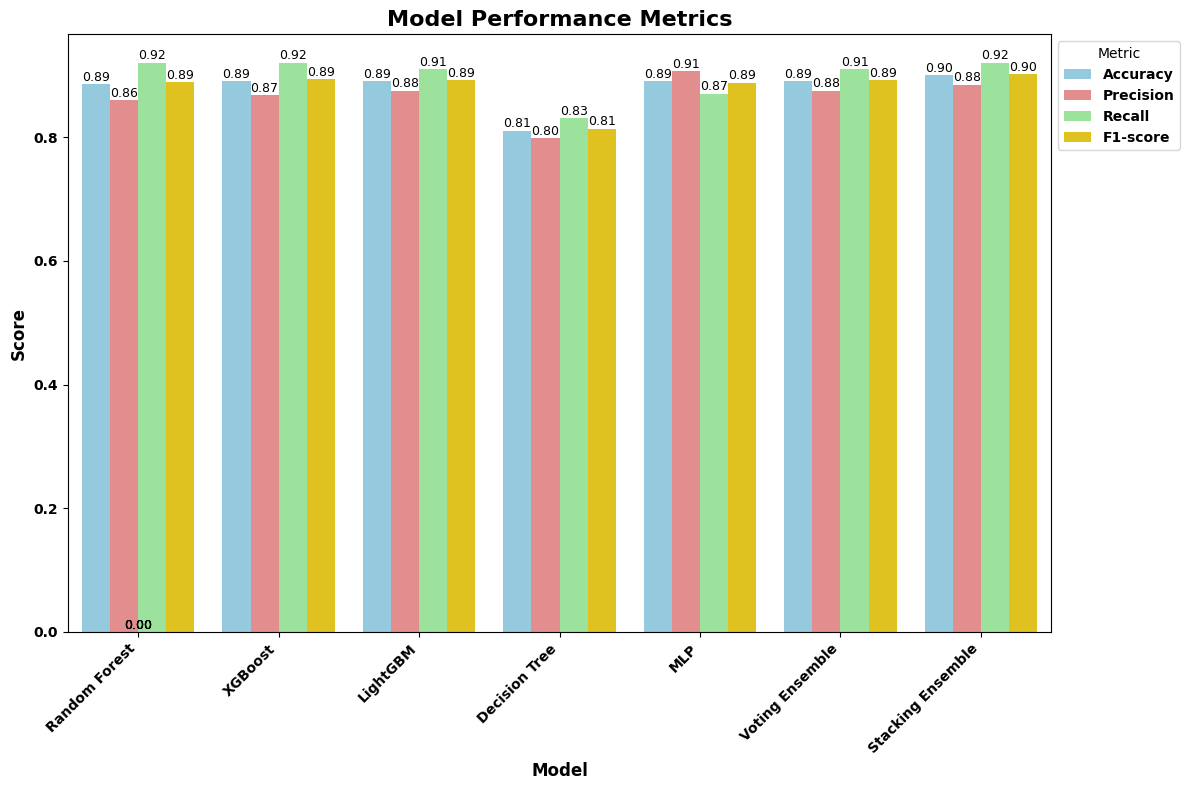


--- Model Performance Metrics Summary ---


Model  Accuracy  Precision  Recall  F1-score
0      Random Forest     0.885   0.859813    0.92  0.888889
1            XGBoost     0.890   0.867925    0.92  0.893204
2           LightGBM     0.890   0.875000    0.91  0.892157
3      Decision Tree     0.810   0.798077    0.83  0.813725
4                MLP     0.890   0.906250    0.87  0.887755
5    Voting Ensemble     0.890   0.875000    0.91  0.892157
6  Stacking Ensemble     0.900   0.884615    0.92  0.901961

In [ ]:
# prompt: plot bar for accuracy,f1-score, precision,recall

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, ConfusionMatrixDisplay, roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier, StackingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import pandas as pd

# Assuming the models and test data (X_test, y_test) are loaded or available from previous steps

# Dictionary to store the predictions for each model
y_preds = {
    'Random Forest': y_pred_best_rf,
    'XGBoost': y_pred_best_xgb,
    'LightGBM': y_pred_best_lgbm,
    'Decision Tree': y_pred_best_dt,
    'MLP': y_pred_best_mlp,
    'Voting Ensemble': y_pred_ensemble,
    'Stacking Ensemble': y_pred_stacking,
}

# Calculate metrics for each model
metrics_data = []
for name, y_pred in y_preds.items():
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    metrics_data.append({'Model': name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-score': f1})

metrics_df = pd.DataFrame(metrics_data)

# Melt the DataFrame to have a long format suitable for bar plotting
metrics_melted = metrics_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Define colors for each metric
metric_colors = {
    'Accuracy': 'skyblue',
    'Precision': 'lightcoral',
    'Recall': 'lightgreen',
    'F1-score': 'gold'
}

# Create the grouped bar plot
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='Model', y='Score', hue='Metric', data=metrics_melted, palette=metric_colors)

# Add title and labels with bold font
plt.title('Model Performance Metrics', fontsize=16, fontweight='bold')
plt.xlabel('Model', fontsize=12, fontweight='bold')
plt.ylabel('Score', fontsize=12, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold') # Make y-tick labels bold

# Add value labels on top of bars
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():.2f}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center',
                       xytext=(0, 5),
                       textcoords='offset points',
                       fontsize=9)

# Customize legend font weight
plt.legend(title='Metric', loc='upper left', bbox_to_anchor=(1, 1), prop={'weight': 'bold'})

plt.tight_layout()
plt.show()

print("\n--- Model Performance Metrics Summary ---")
metrics_df

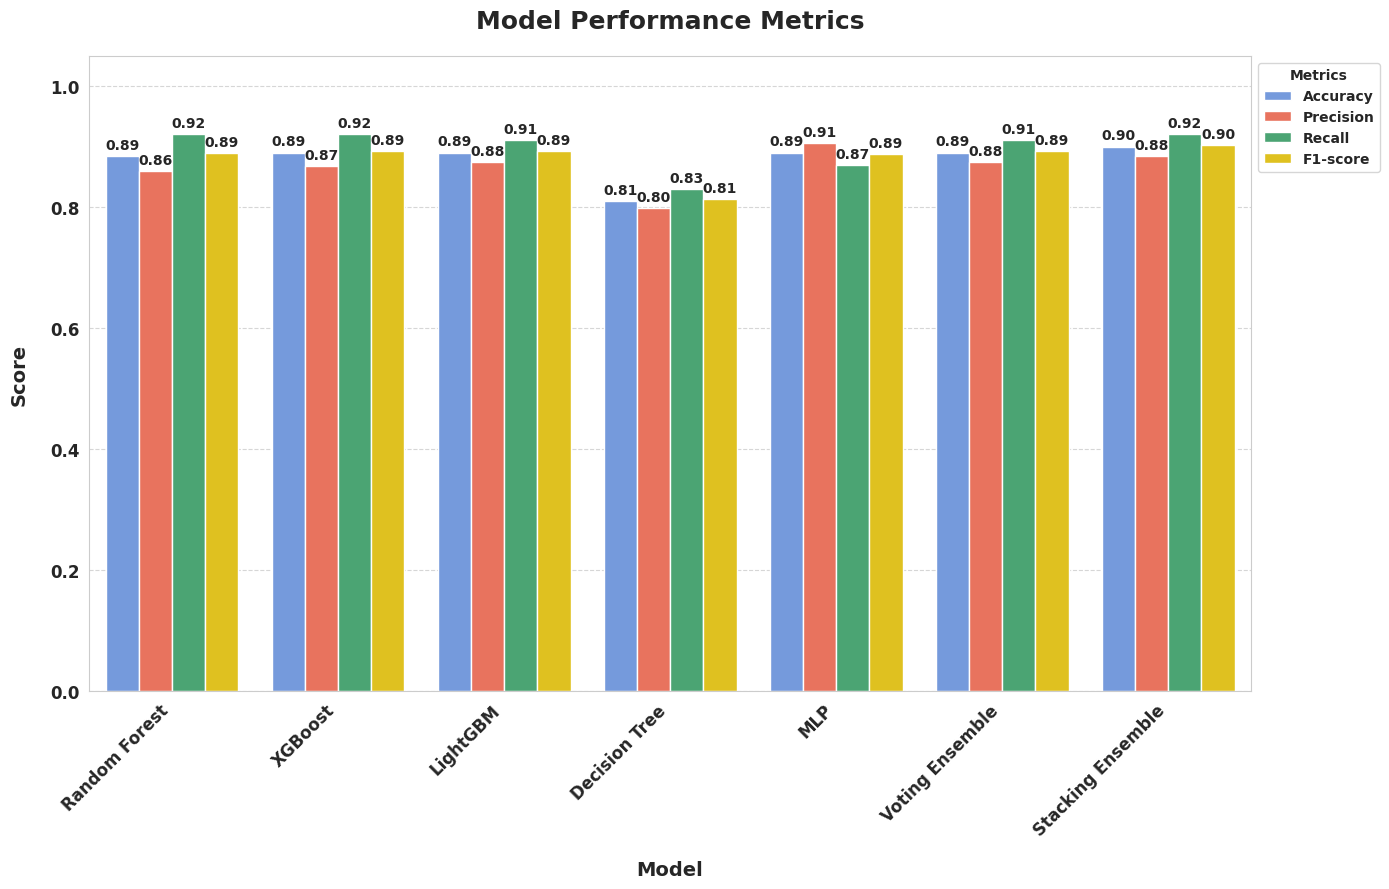


--- Model Performance Metrics Summary ---
               Model  Accuracy  Precision  Recall  F1-score
0      Random Forest     0.885   0.859813    0.92  0.888889
1            XGBoost     0.890   0.867925    0.92  0.893204
2           LightGBM     0.890   0.875000    0.91  0.892157
3      Decision Tree     0.810   0.798077    0.83  0.813725
4                MLP     0.890   0.906250    0.87  0.887755
5    Voting Ensemble     0.890   0.875000    0.91  0.892157
6  Stacking Ensemble     0.900   0.884615    0.92  0.901961


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming y_test and the y_pred_best_rf, y_pred_best_xgb, etc.,
# variables are available from your previous code execution.
# For demonstration purposes, if these are not defined, the script will raise an error.
# Ensure these variables are populated before running this script.

# Dictionary to store the predictions for each model
# This dictionary expects y_pred_best_rf, y_pred_best_xgb, y_pred_best_lgbm,
# y_pred_best_dt, y_pred_best_mlp, y_pred_ensemble, and y_pred_stacking
# to be defined in your environment from previous model training steps.
y_preds = {
    'Random Forest': y_pred_best_rf,
    'XGBoost': y_pred_best_xgb,
    'LightGBM': y_pred_best_lgbm,
    'Decision Tree': y_pred_best_dt,
    'MLP': y_pred_best_mlp,
    'Voting Ensemble': y_pred_ensemble,
    'Stacking Ensemble': y_pred_stacking,
}

# Calculate metrics for each model
metrics_data = []
for name, y_pred in y_preds.items():
    accuracy = accuracy_score(y_test, y_pred)
    # Handle cases where precision, recall, or f1 might be zero due to no positive predictions
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    metrics_data.append({'Model': name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-score': f1})

metrics_df = pd.DataFrame(metrics_data)

# Melt the DataFrame to have a long format suitable for bar plotting
metrics_melted = metrics_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Define attractive colors for each metric using a distinct palette
metric_colors = {
    'Accuracy': '#6495ED',  # Cornflower Blue
    'Precision': '#FF6347', # Tomato
    'Recall': '#3CB371',    # Medium Sea Green
    'F1-score': '#FFD700'   # Gold
}

# Create the grouped bar plot
plt.figure(figsize=(14, 9)) # Increased figure size for better visualization
bar_plot = sns.barplot(x='Model', y='Score', hue='Metric', data=metrics_melted, palette=metric_colors)

# Add title and labels with bold font
plt.title('Model Performance Metrics', fontsize=18, fontweight='bold', pad=20) # Increased title font size and padding
plt.xlabel('Model', fontsize=14, fontweight='bold', labelpad=15) # Increased label font size and padding
plt.ylabel('Score', fontsize=14, fontweight='bold', labelpad=15) # Increased label font size and padding

# Rotate x-axis labels for better readability and make them bold
plt.xticks(rotation=45, ha='right', fontsize=12, fontweight='bold')
# Make y-tick labels bold
plt.yticks(fontsize=12, fontweight='bold')

# Set y-axis limits for better visualization if scores are typically between 0 and 1
plt.ylim(0, 1.05)

# Add value labels on top of bars and make them bold
for p in bar_plot.patches:
  if p.get_height()>=0.1:
    bar_plot.annotate(f'{p.get_height():.2f}',
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center',
                      xytext=(0, 8), # Adjusted vertical offset
                      textcoords='offset points',
                      fontsize=10,
                      fontweight='bold') # Make annotation text bold

# Customize legend font weight and title font weight
legend = plt.legend(title='Metrics', loc='upper left', bbox_to_anchor=(1, 1), prop={'weight': 'bold'}, fontsize=10)
legend.get_title().set_fontweight('bold') # Make legend title bold

plt.grid(axis='y', linestyle='--', alpha=0.8) # Add a subtle grid for better readability

plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

print("\n--- Model Performance Metrics Summary ---")
print(metrics_df.to_string()) # Use to_string() to display the entire DataFrame without truncation


# Visualization

In [ ]:
from sklearn.impute import IterativeImputer

digraph IterativeImputerProcess {
    rankdir=TB; // Top to Bottom
    node [shape=box, style="filled", fillcolor="lightblue", fontname="Helvetica"];

    subgraph cluster_0 {
        label = "Input";
        color = black;
        a [label="Original DataFrame (with NaNs)"];
    }

    subgraph cluster_1 {
        label = "Initialization";
        color = black;
        b [label="Initial Imputation\n(strategy: 'mean')"];
    }

    subgraph cluster_2 {
        label = "Iterative Imputation Loop (max_iter=10)";
        color = black;
        style = "filled";
        fillcolor = "lightgoldenrodyellow";

        c [label="For each Feature j with NaNs\n(round-robin)"];
        d [label="Temporarily 'hide' NaNs for Feature j"];
        e [label="Train Regression Model\n(Estimator: BayesianRidge)\nusing other features as predictors"];
        f [label="Predict missing values for Feature j"];
        g [label="Update Dataset with new\nimputed values for Feature j"];
        h [label="Check Convergence or Max Iterations"];
    }

    subgraph cluster_3 {
        label = "Output";
        color = black;
        i [label="Fully Imputed DataFrame\n(No NaNs)"];
    }

    a -> b [label=""];
    b -> c [label=""];
    c -> d [label=""];
    d -> e [label=""];
    e -> f [label=""];
    f -> g [label=""];
    g -> h [label=""];
    h -> c [label="Loop until converged\nor max_iter reached"];
    h -> i [label="Process Complete"];

    // Additional styling for clarity
    {rank=same; a; i} // Align input and output
}

    subgraph cluster_0 {
        label = "Input";
        color = black;
        a [label="Original DataFrame (with NaNs)"];
    }

    subgraph cluster_1 {
        label = "Initialization";
        color = black;
        b [label="Initial Imputation\n(strategy: 'mean')"];
    }

    subgraph cluster_2 {
        label = "Iterative Imputation Loop (max_iter=10)";
        color = black;
        style = "filled";
        fillcolor = "lightgoldenrodyellow";

        c [label="For each Feature j with NaNs\n(round-robin)"];
        d [label="Temporarily 'hide' NaNs for Feature j"];
        e [label="Train Regression Model\n(Estimator: BayesianRidge)\nusing other features as predictors"];
        f [label="Predict missing values for Feature j"];
        g [label="Update Dataset with new\nimputed values for Feature j"];
        h [label="Check Convergence or Max Iterations"];
    }

    subgraph cluster_3 {
        label = "Output";
        color = black;
        i [label="Fully Imputed DataFrame\n(No NaNs)"];
    }

    a -> b [label=""];
    b -> c [label=""];
    c -> d [label=""];
    d -> e [label=""];
    e -> f [label=""];
    f -> g [label=""];
    g -> h [label=""];
    h -> c [label="Loop until converged\nor max_iter reached"];
    h -> i [label="Process Complete"];

    // Additional styling for clarity
    {rank=same; a; i} // Align input and output
}

    subgraph cluster_0 {
        label = "Input";
        color = black;
        a [label="Original DataFrame (with NaNs)"];
    }

    subgraph cluster_1 {
        label = "Initialization";
        color = black;
        b [label="Initial Imputation\n(strategy: 'mean')"];
    }

    subgraph cluster_2 {
        label = "Iterative Imputation Loop (max_iter=10)";
        color = black;
        style = "filled";
        fillcolor = "lightgoldenrodyellow";

        c [label="For each Feature j with NaNs\n(round-robin)"];
        d [label="Temporarily 'hide' NaNs for Feature j"];
        e [label="Train Regression Model\n(Estimator: BayesianRidge)\nusing other features as predictors"];
        f [label="Predict missing values for Feature j"];
        g [label="Update Dataset with new\nimputed values for Feature j"];
        h [label="Check Convergence or Max Iterations"];
    }

    subgraph cluster_3 {
        label = "Output";
        color = black;
        i [label="Fully Imputed DataFrame\n(No NaNs)"];
    }

    a -> b [label=""];
    b -> c [label=""];
    c -> d [label=""];
    d -> e [label=""];
    e -> f [label=""];
    f -> g [label=""];
    g -> h [label=""];
    h -> c [label="Loop until converged\nor max_iter reached"];
    h -> i [label="Process Complete"];

    // Additional styling for clarity
    {rank=same; a; i} // Align input and output


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 103)

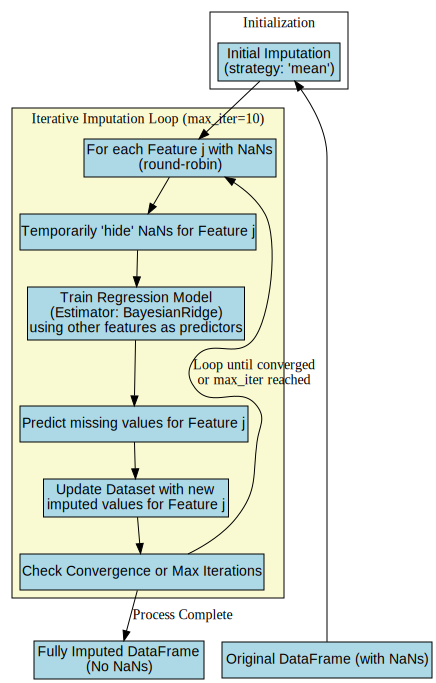

In [ ]:
import graphviz
from IPython.display import display

# Define the diagram in DOT language as a string
dot_diagram = """
digraph IterativeImputerProcess {
    rankdir=TB; // Top to Bottom
    node [shape="box", style="filled", fillcolor="lightblue", fontname="Helvetica"];

    subgraph cluster_0 {
        label = "Input";
        color = black;
        a [label="Original DataFrame (with NaNs)"];
    }

    subgraph cluster_1 {
        label = "Initialization";
        color = black;
        b [label="Initial Imputation\\n(strategy: 'mean')"]; // Use \\n for newline in DOT string
    }

    subgraph cluster_2 {
        label = "Iterative Imputation Loop (max_iter=10)";
        color = black;
        style = "filled";
        fillcolor = "lightgoldenrodyellow";

        c [label="For each Feature j with NaNs\\n(round-robin)"];
        d [label="Temporarily 'hide' NaNs for Feature j"];
        e [label="Train Regression Model\\n(Estimator: BayesianRidge)\\nusing other features as predictors"];
        f [label="Predict missing values for Feature j"];
        g [label="Update Dataset with new\\nimputed values for Feature j"];
        h [label="Check Convergence or Max Iterations"];
    }

    subgraph cluster_3 {
        label = "Output";
        color = black;
        i [label="Fully Imputed DataFrame\\n(No NaNs)"];
    }

    a -> b [label=""];
    b -> c [label=""];
    c -> d [label=""];
    d -> e [label=""];
    e -> f [label=""];
    f -> g [label=""];
    g -> h [label=""];
    h -> c [label="Loop until converged\\nor max_iter reached"];
    h -> i [label="Process Complete"];

    // Additional styling for clarity
    {rank=same; a; i} // Align input and output
}
"""

# Create a graph object from the DOT string
graph = graphviz.Source(dot_diagram)

# Display the graph in the notebook
display(graph)

# **DL Models**

In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

# LSTM requires 3D input (samples, timesteps, features)
# Currently, our data is 2D (samples, features). We need to add a timestep dimension.
# Since we are treating each sample independently for prediction, the timestep is 1.
X_train_lstm = X_train.values.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_lstm = X_test.values.reshape(X_test.shape[0], 1, X_test.shape[1])

# Scale the features for LSTM. MinMaxScaler is often suitable.
# Fit scaler only on training data, then transform both train and test.
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape scaled data for LSTM
X_train_lstm_scaled = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_lstm_scaled = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

# Define the LSTM model architecture
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_lstm_scaled.shape[1], X_train_lstm_scaled.shape[2])))
lstm_model.add(Dropout(0.2)) # Adding dropout for regularization
lstm_model.add(LSTM(units=50, return_sequences=False))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(units=1, activation='sigmoid')) # Output layer for binary classification

# Compile the model
lstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Define callbacks
# Early Stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True)
# Model Checkpoint to save the best model
model_checkpoint = ModelCheckpoint('best_lstm_model.h5', save_best_only=True, monitor='val_loss', mode='min')

# Train the model
print("\nTraining the LSTM model...")
history_lstm = lstm_model.fit(
    X_train_lstm_scaled, y_train,
    epochs=1500, # You can increase epochs, EarlyStopping will stop it
    batch_size=32,
    validation_split=0.2, # Use a portion of training data for validation
    callbacks=[early_stopping, model_checkpoint],
    verbose=1
)




/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Training the LSTM model...
Epoch 1/1500
11/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5160 - loss: 0.6932 

20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.5268 - loss: 0.6928 - val_accuracy: 0.5188 - val_loss: 0.6905
Epoch 2/1500
18/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4978 - loss: 0.6901

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4986 - loss: 0.6900 - val_accuracy: 0.5188 - val_loss: 0.6868
Epoch 3/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4957 - loss: 0.6862

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4965 - loss: 0.6861 - val_accuracy: 0.5188 - val_loss: 0.6796
Epoch 4/1500
11/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5008 - loss: 0.6815  

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5081 - loss: 0.6789 - val_accuracy: 0.5375 - val_loss: 0.6689
Epoch 5/1500
11/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5817 - loss: 0.6550  

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5612 - loss: 0.6590 - val_accuracy: 0.6250 - val_loss: 0.6553
Epoch 6/1500
11/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6344 - loss: 0.6516 

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6527 - loss: 0.6487 - val_accuracy: 0.7188 - val_loss: 0.6375
Epoch 7/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6981 - loss: 0.6329

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6992 - loss: 0.6322 - val_accuracy: 0.7188 - val_loss: 0.6180
Epoch 8/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7501 - loss: 0.5928

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7494 - loss: 0.5926 - val_accuracy: 0.7437 - val_loss: 0.5984
Epoch 9/1500
11/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7277 - loss: 0.5793 

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7347 - loss: 0.5724 - val_accuracy: 0.7125 - val_loss: 0.5819
Epoch 10/1500
19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7471 - loss: 0.5449

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7481 - loss: 0.5441 - val_accuracy: 0.7250 - val_loss: 0.5708
Epoch 11/1500
11/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7669 - loss: 0.5173 

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7582 - loss: 0.5181 - val_accuracy: 0.7563 - val_loss: 0.5646
Epoch 12/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7818 - loss: 0.4871 - val_accuracy: 0.6938 - val_loss: 0.5771
Epoch 13/1500
11/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7085 - loss: 0.5582 

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7339 - loss: 0.5331 - val_accuracy: 0.7375 - val_loss: 0.5605
Epoch 14/1500
11/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8215 - loss: 0.4530 

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7949 - loss: 0.4802 - val_accuracy: 0.7437 - val_loss: 0.5591
Epoch 15/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7553 - loss: 0.5246

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7560 - loss: 0.5235 - val_accuracy: 0.7375 - val_loss: 0.5563
Epoch 16/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7900 - loss: 0.4811 - val_accuracy: 0.7437 - val_loss: 0.5586
Epoch 17/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7652 - loss: 0.4925 - val_accuracy: 0.7188 - val_loss: 0.5622
Epoch 18/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7859 - loss: 0.4685 - val_accuracy: 0.7250 - val_loss: 0.5637
Epoch 19/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7649 - loss: 0.4729 - val_accuracy: 0.7500 - val_loss: 0.5588
Epoch 20/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7790 - loss: 0.4864 - val_accuracy: 0.7375 - val_loss: 0.5570
Epoch 21/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7704 - loss: 0.4763 - val_accuracy: 0.7375 - val_loss: 0.5577
Epoch 22/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7745 - loss: 0.4770 - val_accuracy: 0.

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7748 - loss: 0.4932 - val_accuracy: 0.7375 - val_loss: 0.5549
Epoch 24/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7971 - loss: 0.4797 - val_accuracy: 0.7312 - val_loss: 0.5569
Epoch 25/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8005 - loss: 0.4319 - val_accuracy: 0.7250 - val_loss: 0.5575
Epoch 26/1500
17/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8150 - loss: 0.4499

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8094 - loss: 0.4553 - val_accuracy: 0.7375 - val_loss: 0.5535
Epoch 27/1500
16/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7911 - loss: 0.4742

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7890 - loss: 0.4761 - val_accuracy: 0.7312 - val_loss: 0.5519
Epoch 28/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7956 - loss: 0.4629 - val_accuracy: 0.7250 - val_loss: 0.5531
Epoch 29/1500
16/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7517 - loss: 0.4935

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7582 - loss: 0.4894 - val_accuracy: 0.7312 - val_loss: 0.5516
Epoch 30/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7855 - loss: 0.4677

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7855 - loss: 0.4679 - val_accuracy: 0.7375 - val_loss: 0.5502
Epoch 31/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7636 - loss: 0.4858 - val_accuracy: 0.7188 - val_loss: 0.5532
Epoch 32/1500
11/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8071 - loss: 0.4243 

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7945 - loss: 0.4457 - val_accuracy: 0.7312 - val_loss: 0.5475
Epoch 33/1500
11/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8148 - loss: 0.4480  

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8049 - loss: 0.4552 - val_accuracy: 0.7375 - val_loss: 0.5447
Epoch 34/1500
19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7855 - loss: 0.4650

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7854 - loss: 0.4650 - val_accuracy: 0.7375 - val_loss: 0.5443
Epoch 35/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7847 - loss: 0.4515 - val_accuracy: 0.7188 - val_loss: 0.5492
Epoch 36/1500
11/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7650 - loss: 0.4864  

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7670 - loss: 0.4777 - val_accuracy: 0.7375 - val_loss: 0.5421
Epoch 37/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7926 - loss: 0.4442 - val_accuracy: 0.7312 - val_loss: 0.5432
Epoch 38/1500
11/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8004 - loss: 0.4474 

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7983 - loss: 0.4541 - val_accuracy: 0.7563 - val_loss: 0.5402
Epoch 39/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8022 - loss: 0.4617 - val_accuracy: 0.7312 - val_loss: 0.5420
Epoch 40/1500
11/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7928 - loss: 0.4423 

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7909 - loss: 0.4500 - val_accuracy: 0.7375 - val_loss: 0.5401
Epoch 41/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7731 - loss: 0.4679

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7735 - loss: 0.4677 - val_accuracy: 0.7437 - val_loss: 0.5361
Epoch 42/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7505 - loss: 0.4895 - val_accuracy: 0.7312 - val_loss: 0.5368
Epoch 43/1500
11/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8110 - loss: 0.4201  

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7951 - loss: 0.4396 - val_accuracy: 0.7500 - val_loss: 0.5337
Epoch 44/1500
19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7581 - loss: 0.4797

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7597 - loss: 0.4782 - val_accuracy: 0.7437 - val_loss: 0.5331
Epoch 45/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8207 - loss: 0.4206

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8188 - loss: 0.4227 - val_accuracy: 0.7500 - val_loss: 0.5321
Epoch 46/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7550 - loss: 0.4689 - val_accuracy: 0.7312 - val_loss: 0.5359
Epoch 47/1500
11/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8041 - loss: 0.4344 

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7981 - loss: 0.4433 - val_accuracy: 0.7500 - val_loss: 0.5283
Epoch 48/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7823 - loss: 0.4370 - val_accuracy: 0.7375 - val_loss: 0.5301
Epoch 49/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8033 - loss: 0.4485 - val_accuracy: 0.7437 - val_loss: 0.5288
Epoch 50/1500
17/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7765 - loss: 0.4514

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7786 - loss: 0.4523 - val_accuracy: 0.7563 - val_loss: 0.5244
Epoch 51/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7782 - loss: 0.4325 - val_accuracy: 0.7375 - val_loss: 0.5284
Epoch 52/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8228 - loss: 0.4343 - val_accuracy: 0.7437 - val_loss: 0.5245
Epoch 53/1500
11/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7608 - loss: 0.4746 

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7685 - loss: 0.4634 - val_accuracy: 0.7500 - val_loss: 0.5220
Epoch 54/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7782 - loss: 0.4326 - val_accuracy: 0.7437 - val_loss: 0.5271
Epoch 55/1500
11/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8036 - loss: 0.4215 

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7978 - loss: 0.4393 - val_accuracy: 0.7437 - val_loss: 0.5196
Epoch 56/1500
11/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7851 - loss: 0.4409 

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7819 - loss: 0.4524 - val_accuracy: 0.7500 - val_loss: 0.5167
Epoch 57/1500
11/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7786 - loss: 0.4477  

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7825 - loss: 0.4462 - val_accuracy: 0.7500 - val_loss: 0.5158
Epoch 58/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7936 - loss: 0.4431 - val_accuracy: 0.7437 - val_loss: 0.5167
Epoch 59/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7972 - loss: 0.4296

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7960 - loss: 0.4307 - val_accuracy: 0.7500 - val_loss: 0.5141
Epoch 60/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7704 - loss: 0.4501

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7710 - loss: 0.4504 - val_accuracy: 0.7500 - val_loss: 0.5130
Epoch 61/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7873 - loss: 0.4368 - val_accuracy: 0.7437 - val_loss: 0.5209
Epoch 62/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7365 - loss: 0.5002

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.7379 - loss: 0.4980 - val_accuracy: 0.7500 - val_loss: 0.5088
Epoch 63/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7782 - loss: 0.4433 - val_accuracy: 0.7500 - val_loss: 0.5106
Epoch 64/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7850 - loss: 0.4446 - val_accuracy: 0.7500 - val_loss: 0.5097
Epoch 65/1500
17/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7782 - loss: 0.4547

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.7787 - loss: 0.4547 - val_accuracy: 0.7500 - val_loss: 0.5085
Epoch 66/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7624 - loss: 0.4663 - val_accuracy: 0.7500 - val_loss: 0.5086
Epoch 67/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7635 - loss: 0.4748 - val_accuracy: 0.7375 - val_loss: 0.5097
Epoch 68/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7853 - loss: 0.4331 - val_accuracy: 0.7437 - val_loss: 0.5097
Epoch 69/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7602 - loss: 0.4718

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7609 - loss: 0.4707 - val_accuracy: 0.7500 - val_loss: 0.5056
Epoch 70/1500
11/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7937 - loss: 0.4746 

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7839 - loss: 0.4676 - val_accuracy: 0.7625 - val_loss: 0.5021
Epoch 71/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7559 - loss: 0.4681 - val_accuracy: 0.7500 - val_loss: 0.5057
Epoch 72/1500
11/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7387 - loss: 0.4657 

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7592 - loss: 0.4546 - val_accuracy: 0.7625 - val_loss: 0.5014
Epoch 73/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8037 - loss: 0.4146 - val_accuracy: 0.7500 - val_loss: 0.5030
Epoch 74/1500
11/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7885 - loss: 0.4047 

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7845 - loss: 0.4222 - val_accuracy: 0.7500 - val_loss: 0.5011
Epoch 75/1500
16/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7474 - loss: 0.4597

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7531 - loss: 0.4563 - val_accuracy: 0.7563 - val_loss: 0.4982
Epoch 76/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7919 - loss: 0.4482 - val_accuracy: 0.7563 - val_loss: 0.4987
Epoch 77/1500
11/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7890 - loss: 0.4358 

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7857 - loss: 0.4395 - val_accuracy: 0.7563 - val_loss: 0.4959
Epoch 78/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7785 - loss: 0.4554 - val_accuracy: 0.7563 - val_loss: 0.4979
Epoch 79/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7878 - loss: 0.4337 - val_accuracy: 0.7563 - val_loss: 0.4974
Epoch 80/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7736 - loss: 0.4366 - val_accuracy: 0.7563 - val_loss: 0.4965
Epoch 81/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7853 - loss: 0.4444 - val_accuracy: 0.7500 - val_loss: 0.4982
Epoch 82/1500
18/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7694 - loss: 0.4581

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7703 - loss: 0.4556 - val_accuracy: 0.7563 - val_loss: 0.4955
Epoch 83/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7725 - loss: 0.4370 - val_accuracy: 0.7500 - val_loss: 0.5011
Epoch 84/1500
14/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7799 - loss: 0.4456

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7811 - loss: 0.4461 - val_accuracy: 0.7750 - val_loss: 0.4912
Epoch 85/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7548 - loss: 0.4655 - val_accuracy: 0.7563 - val_loss: 0.4922
Epoch 86/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7502 - loss: 0.4492 - val_accuracy: 0.7625 - val_loss: 0.4914
Epoch 87/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7683 - loss: 0.4488 - val_accuracy: 0.7563 - val_loss: 0.4912
Epoch 88/1500
16/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7504 - loss: 0.4769

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7555 - loss: 0.4699 - val_accuracy: 0.7563 - val_loss: 0.4902
Epoch 89/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7973 - loss: 0.4213 - val_accuracy: 0.7750 - val_loss: 0.4911
Epoch 90/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7689 - loss: 0.4584 - val_accuracy: 0.7500 - val_loss: 0.4968
Epoch 91/1500
11/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8101 - loss: 0.4435 

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8025 - loss: 0.4406 - val_accuracy: 0.7750 - val_loss: 0.4900
Epoch 92/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7836 - loss: 0.4397 - val_accuracy: 0.7563 - val_loss: 0.4923
Epoch 93/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7923 - loss: 0.4124 - val_accuracy: 0.7563 - val_loss: 0.4911
Epoch 94/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7918 - loss: 0.4176 - val_accuracy: 0.7625 - val_loss: 0.4921
Epoch 95/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7721 - loss: 0.4367

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7722 - loss: 0.4367 - val_accuracy: 0.7750 - val_loss: 0.4891
Epoch 96/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7617 - loss: 0.4664 - val_accuracy: 0.7625 - val_loss: 0.4904
Epoch 97/1500
11/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7647 - loss: 0.4617 

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7714 - loss: 0.4543 - val_accuracy: 0.7625 - val_loss: 0.4891
Epoch 98/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7812 - loss: 0.4453 - val_accuracy: 0.7688 - val_loss: 0.4903
Epoch 99/1500
11/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8094 - loss: 0.3989 

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8003 - loss: 0.4185 - val_accuracy: 0.7625 - val_loss: 0.4875
Epoch 100/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7629 - loss: 0.4768 - val_accuracy: 0.7625 - val_loss: 0.4911
Epoch 101/1500
19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7676 - loss: 0.4640

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.7676 - loss: 0.4624 - val_accuracy: 0.7750 - val_loss: 0.4855
Epoch 102/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7761 - loss: 0.4423 - val_accuracy: 0.7625 - val_loss: 0.4907
Epoch 103/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7761 - loss: 0.4497 - val_accuracy: 0.7625 - val_loss: 0.4882
Epoch 104/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7748 - loss: 0.4409 - val_accuracy: 0.7625 - val_loss: 0.4888
Epoch 105/1500
17/20 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8006 - loss: 0.4109

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7982 - loss: 0.4162 - val_accuracy: 0.7750 - val_loss: 0.4852
Epoch 106/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7697 - loss: 0.4350 - val_accuracy: 0.7625 - val_loss: 0.4871
Epoch 107/1500
11/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7591 - loss: 0.4821  

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7727 - loss: 0.4590 - val_accuracy: 0.7750 - val_loss: 0.4847
Epoch 108/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7770 - loss: 0.4342 - val_accuracy: 0.7625 - val_loss: 0.4888
Epoch 109/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7680 - loss: 0.4346 - val_accuracy: 0.7688 - val_loss: 0.4855
Epoch 110/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7878 - loss: 0.4310 - val_accuracy: 0.7750 - val_loss: 0.4851
Epoch 111/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7674 - loss: 0.4524 - val_accuracy: 0.7688 - val_loss: 0.4849
Epoch 112/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7857 - loss: 0.4348 - val_accuracy: 0.7625 - val_loss: 0.4886
Epoch 113/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7608 - loss: 0.4380

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7615 - loss: 0.4376 - val_accuracy: 0.7812 - val_loss: 0.4842
Epoch 114/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7671 - loss: 0.4442 - val_accuracy: 0.7563 - val_loss: 0.4859
Epoch 115/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7889 - loss: 0.4282 - val_accuracy: 0.7625 - val_loss: 0.4869
Epoch 116/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7727 - loss: 0.4410

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7730 - loss: 0.4405 - val_accuracy: 0.7812 - val_loss: 0.4839
Epoch 117/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7678 - loss: 0.4349 - val_accuracy: 0.7625 - val_loss: 0.4859
Epoch 118/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7948 - loss: 0.4301 - val_accuracy: 0.7688 - val_loss: 0.4847
Epoch 119/1500
11/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7873 - loss: 0.4308 

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7892 - loss: 0.4266 - val_accuracy: 0.7812 - val_loss: 0.4833
Epoch 120/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7707 - loss: 0.4413 - val_accuracy: 0.7563 - val_loss: 0.4859
Epoch 121/1500
11/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7733 - loss: 0.4364  

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7771 - loss: 0.4334 - val_accuracy: 0.7812 - val_loss: 0.4828
Epoch 122/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7741 - loss: 0.4135 - val_accuracy: 0.7688 - val_loss: 0.4848
Epoch 123/1500
18/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7947 - loss: 0.4016

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7931 - loss: 0.4054 - val_accuracy: 0.7937 - val_loss: 0.4811
Epoch 124/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7855 - loss: 0.4169 - val_accuracy: 0.7688 - val_loss: 0.4849
Epoch 125/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7517 - loss: 0.4437 - val_accuracy: 0.7937 - val_loss: 0.4821
Epoch 126/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7728 - loss: 0.4243 - val_accuracy: 0.7688 - val_loss: 0.4864
Epoch 127/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7729 - loss: 0.4306 - val_accuracy: 0.7812 - val_loss: 0.4826
Epoch 128/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7982 - loss: 0.4362 - val_accuracy: 0.7750 - val_loss: 0.4831
Epoch 129/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7843 - loss: 0.4119 - val_accuracy: 0.7688 - val_loss: 0.4854
Epoch 130/1500
11/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7878 - loss: 0.4104 

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7834 - loss: 0.4208 - val_accuracy: 0.7812 - val_loss: 0.4810
Epoch 131/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7817 - loss: 0.4440 - val_accuracy: 0.7812 - val_loss: 0.4826
Epoch 132/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7859 - loss: 0.4234 - val_accuracy: 0.7812 - val_loss: 0.4821
Epoch 133/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8003 - loss: 0.4143

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7999 - loss: 0.4147 - val_accuracy: 0.7875 - val_loss: 0.4805
Epoch 134/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7964 - loss: 0.4041 - val_accuracy: 0.7750 - val_loss: 0.4841
Epoch 135/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7904 - loss: 0.4076 - val_accuracy: 0.7812 - val_loss: 0.4806
Epoch 136/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7789 - loss: 0.4144 - val_accuracy: 0.7563 - val_loss: 0.4854
Epoch 137/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7985 - loss: 0.3966 - val_accuracy: 0.7812 - val_loss: 0.4819
Epoch 138/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7700 - loss: 0.4354 - val_accuracy: 0.7563 - val_loss: 0.4830
Epoch 139/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7976 - loss: 0.4234

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7974 - loss: 0.4232 - val_accuracy: 0.7937 - val_loss: 0.4785
Epoch 140/1500
11/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7509 - loss: 0.4701 

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7654 - loss: 0.4487 - val_accuracy: 0.7875 - val_loss: 0.4779
Epoch 141/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7976 - loss: 0.4174 - val_accuracy: 0.7812 - val_loss: 0.4786
Epoch 142/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.7758 - loss: 0.4252 - val_accuracy: 0.7563 - val_loss: 0.4829
Epoch 143/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8029 - loss: 0.4067 - val_accuracy: 0.7937 - val_loss: 0.4806
Epoch 144/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7879 - loss: 0.4188 - val_accuracy: 0.7625 - val_loss: 0.4864
Epoch 145/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7839 - loss: 0.4282 - val_accuracy: 0.7937 - val_loss: 0.4796
Epoch 146/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7570 - loss: 0.4456 - val_accuracy: 0.7750 - val_loss: 0.4782
Epoch 147/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7557 - loss: 0.4341 - val_accu

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7939 - loss: 0.4117 - val_accuracy: 0.7750 - val_loss: 0.4777
Epoch 152/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7850 - loss: 0.4204

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7851 - loss: 0.4202 - val_accuracy: 0.7875 - val_loss: 0.4771
Epoch 153/1500
11/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7591 - loss: 0.4578 

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7643 - loss: 0.4420 - val_accuracy: 0.7875 - val_loss: 0.4757
Epoch 154/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7831 - loss: 0.4310 - val_accuracy: 0.7812 - val_loss: 0.4779
Epoch 155/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7807 - loss: 0.4160 - val_accuracy: 0.7750 - val_loss: 0.4777
Epoch 156/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7967 - loss: 0.4221 - val_accuracy: 0.7812 - val_loss: 0.4781
Epoch 157/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8020 - loss: 0.3941 - val_accuracy: 0.7625 - val_loss: 0.4820
Epoch 158/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8094 - loss: 0.4328 - val_accuracy: 0.7688 - val_loss: 0.4783
Epoch 159/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7880 - loss: 0.4178 - val_accuracy: 0.7750 - val_loss: 0.4764
Epoch 160/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7544 - loss: 0.4290 - val_accura

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7451 - loss: 0.4617 - val_accuracy: 0.7875 - val_loss: 0.4753
Epoch 163/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7853 - loss: 0.4218 - val_accuracy: 0.7625 - val_loss: 0.4810
Epoch 164/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7661 - loss: 0.4318 - val_accuracy: 0.7750 - val_loss: 0.4775
Epoch 165/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7618 - loss: 0.4451 - val_accuracy: 0.7688 - val_loss: 0.4790
Epoch 166/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8191 - loss: 0.3909 - val_accuracy: 0.7812 - val_loss: 0.4788
Epoch 167/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7874 - loss: 0.4152 - val_accuracy: 0.7812 - val_loss: 0.4769
Epoch 168/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7895 - loss: 0.4342 - val_accuracy: 0.7812 - val_loss: 0.4775
Epoch 169/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7981 - loss: 0.3924 - val_accuracy

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7748 - loss: 0.4226 - val_accuracy: 0.7812 - val_loss: 0.4751
Epoch 172/1500
17/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7566 - loss: 0.4522

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7625 - loss: 0.4458 - val_accuracy: 0.7812 - val_loss: 0.4749
Epoch 173/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7900 - loss: 0.4389 - val_accuracy: 0.7812 - val_loss: 0.4753
Epoch 174/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7953 - loss: 0.3815 - val_accuracy: 0.7750 - val_loss: 0.4791
Epoch 175/1500
11/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7599 - loss: 0.4387  

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7692 - loss: 0.4341 - val_accuracy: 0.7812 - val_loss: 0.4744
Epoch 176/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7746 - loss: 0.4358 - val_accuracy: 0.7812 - val_loss: 0.4778
Epoch 177/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7949 - loss: 0.3969 - val_accuracy: 0.7812 - val_loss: 0.4745
Epoch 178/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7947 - loss: 0.4173 - val_accuracy: 0.7812 - val_loss: 0.4744
Epoch 179/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7932 - loss: 0.4066 - val_accuracy: 0.7812 - val_loss: 0.4754
Epoch 180/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8079 - loss: 0.3914 - val_accuracy: 0.7812 - val_loss: 0.4756
Epoch 181/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8229 - loss: 0.3821 - val_accuracy: 0.7812 - val_loss: 0.4759
Epoch 182/1500
11/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8268 - loss: 0.4088 

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8147 - loss: 0.4086 - val_accuracy: 0.7812 - val_loss: 0.4737
Epoch 183/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8092 - loss: 0.4015 - val_accuracy: 0.7750 - val_loss: 0.4752
Epoch 184/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7981 - loss: 0.4138 - val_accuracy: 0.7812 - val_loss: 0.4792
Epoch 185/1500
15/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7652 - loss: 0.4469

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7701 - loss: 0.4395 - val_accuracy: 0.7750 - val_loss: 0.4713
Epoch 186/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8078 - loss: 0.4066 - val_accuracy: 0.7875 - val_loss: 0.4746
Epoch 187/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7875 - loss: 0.4373 - val_accuracy: 0.7812 - val_loss: 0.4730
Epoch 188/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7944 - loss: 0.4173 - val_accuracy: 0.7812 - val_loss: 0.4763
Epoch 189/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8049 - loss: 0.3974 - val_accuracy: 0.7688 - val_loss: 0.4741
Epoch 190/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7982 - loss: 0.4159 - val_accuracy: 0.7812 - val_loss: 0.4758
Epoch 191/1500
11/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8306 - loss: 0.3644 

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8169 - loss: 0.3815 - val_accuracy: 0.7750 - val_loss: 0.4709
Epoch 192/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7992 - loss: 0.3953 - val_accuracy: 0.7812 - val_loss: 0.4756
Epoch 193/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8298 - loss: 0.3641 - val_accuracy: 0.7875 - val_loss: 0.4752
Epoch 194/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7955 - loss: 0.4084 - val_accuracy: 0.7875 - val_loss: 0.4723
Epoch 195/1500
16/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7695 - loss: 0.4152

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7729 - loss: 0.4152 - val_accuracy: 0.7812 - val_loss: 0.4707
Epoch 196/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7962 - loss: 0.3942 - val_accuracy: 0.7875 - val_loss: 0.4744
Epoch 197/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7950 - loss: 0.4176 - val_accuracy: 0.7812 - val_loss: 0.4767
Epoch 198/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8058 - loss: 0.3719 - val_accuracy: 0.7688 - val_loss: 0.4720
Epoch 199/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8129 - loss: 0.3742 - val_accuracy: 0.7875 - val_loss: 0.4765
Epoch 200/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8150 - loss: 0.3993 - val_accuracy: 0.7812 - val_loss: 0.4717
Epoch 201/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7773 - loss: 0.4620 - val_accuracy: 0.7812 - val_loss: 0.4719
Epoch 202/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7977 - loss: 0.4268 - val_accu

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8066 - loss: 0.3990 - val_accuracy: 0.7750 - val_loss: 0.4697
Epoch 211/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7670 - loss: 0.4566 - val_accuracy: 0.7875 - val_loss: 0.4712
Epoch 212/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8051 - loss: 0.4039 - val_accuracy: 0.7875 - val_loss: 0.4758
Epoch 213/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8064 - loss: 0.3756 - val_accuracy: 0.7750 - val_loss: 0.4710
Epoch 214/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8306 - loss: 0.3728 - val_accuracy: 0.7812 - val_loss: 0.4727
Epoch 215/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8105 - loss: 0.3891 - val_accuracy: 0.7875 - val_loss: 0.4708
Epoch 216/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8079 - loss: 0.3891 - val_accuracy: 0.7812 - val_loss: 0.4698
Epoch 217/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7932 - loss: 0.4132 - val_accuracy

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8051 - loss: 0.4032 - val_accuracy: 0.7812 - val_loss: 0.4697
Epoch 222/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8091 - loss: 0.4093 - val_accuracy: 0.7875 - val_loss: 0.4715
Epoch 223/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7748 - loss: 0.4091 - val_accuracy: 0.7875 - val_loss: 0.4740
Epoch 224/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8085 - loss: 0.3933 - val_accuracy: 0.7750 - val_loss: 0.4709
Epoch 225/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8061 - loss: 0.3940 - val_accuracy: 0.7812 - val_loss: 0.4714
Epoch 226/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8185 - loss: 0.3820 - val_accuracy: 0.7750 - val_loss: 0.4707
Epoch 227/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8325 - loss: 0.3498 - val_accuracy: 0.7875 - val_loss: 0.4740
Epoch 228/1500
19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7963 - loss: 0.4184

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7972 - loss: 0.4165 - val_accuracy: 0.7750 - val_loss: 0.4675
Epoch 229/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8058 - loss: 0.3964 - val_accuracy: 0.7812 - val_loss: 0.4708
Epoch 230/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7989 - loss: 0.4162 - val_accuracy: 0.7812 - val_loss: 0.4688
Epoch 231/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8061 - loss: 0.3937 - val_accuracy: 0.7812 - val_loss: 0.4697
Epoch 232/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7999 - loss: 0.4274 - val_accuracy: 0.7937 - val_loss: 0.4718
Epoch 233/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8124 - loss: 0.3958 - val_accuracy: 0.7812 - val_loss: 0.4709
Epoch 234/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8155 - loss: 0.4037 - val_accuracy: 0.7812 - val_loss: 0.4697
Epoch 235/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8028 - loss: 0.3765 - val_accurac

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7698 - loss: 0.4398 - val_accuracy: 0.7750 - val_loss: 0.4651
Epoch 237/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8234 - loss: 0.3885 - val_accuracy: 0.7875 - val_loss: 0.4727
Epoch 238/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7988 - loss: 0.3985 - val_accuracy: 0.7812 - val_loss: 0.4692
Epoch 239/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7972 - loss: 0.4110 - val_accuracy: 0.7875 - val_loss: 0.4772
Epoch 240/1500
12/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8109 - loss: 0.3844

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8078 - loss: 0.3938 - val_accuracy: 0.7750 - val_loss: 0.4647
Epoch 241/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7868 - loss: 0.3970 - val_accuracy: 0.7812 - val_loss: 0.4669
Epoch 242/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8189 - loss: 0.3790 - val_accuracy: 0.7812 - val_loss: 0.4663
Epoch 243/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8192 - loss: 0.3682 - val_accuracy: 0.7750 - val_loss: 0.4658
Epoch 244/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7946 - loss: 0.4049

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7951 - loss: 0.4043 - val_accuracy: 0.7750 - val_loss: 0.4636
Epoch 245/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8225 - loss: 0.3778 - val_accuracy: 0.7812 - val_loss: 0.4650
Epoch 246/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8027 - loss: 0.3956 - val_accuracy: 0.7937 - val_loss: 0.4701
Epoch 247/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7939 - loss: 0.4112 - val_accuracy: 0.7750 - val_loss: 0.4655
Epoch 248/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8177 - loss: 0.3814 - val_accuracy: 0.7937 - val_loss: 0.4677
Epoch 249/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7970 - loss: 0.3953 - val_accuracy: 0.7812 - val_loss: 0.4671
Epoch 250/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8171 - loss: 0.3696 - val_accuracy: 0.7812 - val_loss: 0.4691
Epoch 251/1500
19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7943 - loss: 0.4280

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7960 - loss: 0.4252 - val_accuracy: 0.7750 - val_loss: 0.4628
Epoch 252/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8021 - loss: 0.3901 - val_accuracy: 0.7875 - val_loss: 0.4664
Epoch 253/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8082 - loss: 0.3862 - val_accuracy: 0.7812 - val_loss: 0.4667
Epoch 254/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8013 - loss: 0.3908 - val_accuracy: 0.7812 - val_loss: 0.4666
Epoch 255/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8103 - loss: 0.3791 - val_accuracy: 0.7750 - val_loss: 0.4657
Epoch 256/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8114 - loss: 0.3933 - val_accuracy: 0.7812 - val_loss: 0.4665
Epoch 257/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8056 - loss: 0.4132 - val_accuracy: 0.7812 - val_loss: 0.4662
Epoch 258/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8254 - loss: 0.3786 - val_accurac

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8102 - loss: 0.3942 - val_accuracy: 0.7812 - val_loss: 0.4625
Epoch 261/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8160 - loss: 0.3988 - val_accuracy: 0.7937 - val_loss: 0.4671
Epoch 262/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8153 - loss: 0.3983 - val_accuracy: 0.7750 - val_loss: 0.4636
Epoch 263/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7844 - loss: 0.4291 - val_accuracy: 0.7937 - val_loss: 0.4671
Epoch 264/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8070 - loss: 0.3886 - val_accuracy: 0.7750 - val_loss: 0.4651
Epoch 265/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8015 - loss: 0.3990 - val_accuracy: 0.7875 - val_loss: 0.4709
Epoch 266/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8177 - loss: 0.3635 - val_accuracy: 0.8000 - val_loss: 0.4669
Epoch 267/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7742 - loss: 0.4265 - val_accu

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7883 - loss: 0.4104 - val_accuracy: 0.7875 - val_loss: 0.4622
Epoch 269/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8348 - loss: 0.3739 - val_accuracy: 0.7937 - val_loss: 0.4648
Epoch 270/1500
18/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8294 - loss: 0.4058

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8301 - loss: 0.4032 - val_accuracy: 0.7750 - val_loss: 0.4609
Epoch 271/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8116 - loss: 0.3768 - val_accuracy: 0.7875 - val_loss: 0.4660
Epoch 272/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8256 - loss: 0.3844 - val_accuracy: 0.7875 - val_loss: 0.4638
Epoch 273/1500
13/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7851 - loss: 0.4546

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7952 - loss: 0.4279 - val_accuracy: 0.7812 - val_loss: 0.4609
Epoch 274/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8234 - loss: 0.3936

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8230 - loss: 0.3933 - val_accuracy: 0.7812 - val_loss: 0.4600
Epoch 275/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8090 - loss: 0.3823 - val_accuracy: 0.7875 - val_loss: 0.4654
Epoch 276/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8008 - loss: 0.4321 - val_accuracy: 0.7812 - val_loss: 0.4603
Epoch 277/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7948 - loss: 0.3713 - val_accuracy: 0.7875 - val_loss: 0.4637
Epoch 278/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8200 - loss: 0.3835 - val_accuracy: 0.7875 - val_loss: 0.4621
Epoch 279/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8526 - loss: 0.3599 - val_accuracy: 0.7875 - val_loss: 0.4654
Epoch 280/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8118 - loss: 0.3979 - val_accuracy: 0.7812 - val_loss: 0.4601
Epoch 281/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8336 - loss: 0.3581 - val_accur

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7955 - loss: 0.4170 - val_accuracy: 0.7812 - val_loss: 0.4586
Epoch 290/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8124 - loss: 0.3916 - val_accuracy: 0.7875 - val_loss: 0.4619
Epoch 291/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8230 - loss: 0.3799 - val_accuracy: 0.7875 - val_loss: 0.4618
Epoch 292/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8268 - loss: 0.3906 - val_accuracy: 0.7937 - val_loss: 0.4634
Epoch 293/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8238 - loss: 0.3802 - val_accuracy: 0.7937 - val_loss: 0.4626
Epoch 294/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8287 - loss: 0.3880 - val_accuracy: 0.7937 - val_loss: 0.4600
Epoch 295/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8140 - loss: 0.3818 - val_accuracy: 0.7812 - val_loss: 0.4593
Epoch 296/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8200 - loss: 0.3704 - val_accur

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8240 - loss: 0.3784 - val_accuracy: 0.7937 - val_loss: 0.4578
Epoch 299/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7996 - loss: 0.3994 - val_accuracy: 0.7937 - val_loss: 0.4638
Epoch 300/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8145 - loss: 0.3692 - val_accuracy: 0.7937 - val_loss: 0.4584
Epoch 301/1500
19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8300 - loss: 0.3461

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8296 - loss: 0.3485 - val_accuracy: 0.7875 - val_loss: 0.4572
Epoch 302/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8412 - loss: 0.3721 - val_accuracy: 0.7937 - val_loss: 0.4575
Epoch 303/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8126 - loss: 0.3856 - val_accuracy: 0.7875 - val_loss: 0.4583
Epoch 304/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8328 - loss: 0.3633 - val_accuracy: 0.7937 - val_loss: 0.4580
Epoch 305/1500
11/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7930 - loss: 0.4073 

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8075 - loss: 0.3908 - val_accuracy: 0.7937 - val_loss: 0.4562
Epoch 306/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8223 - loss: 0.3667 - val_accuracy: 0.7937 - val_loss: 0.4612
Epoch 307/1500
18/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8002 - loss: 0.4044

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8022 - loss: 0.4015 - val_accuracy: 0.7937 - val_loss: 0.4546
Epoch 308/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8282 - loss: 0.3797 - val_accuracy: 0.7937 - val_loss: 0.4574
Epoch 309/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8286 - loss: 0.3578 - val_accuracy: 0.7937 - val_loss: 0.4560
Epoch 310/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8284 - loss: 0.3576 - val_accuracy: 0.7937 - val_loss: 0.4582
Epoch 311/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8444 - loss: 0.3278 - val_accuracy: 0.7937 - val_loss: 0.4557
Epoch 312/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8248 - loss: 0.3594 - val_accuracy: 0.7937 - val_loss: 0.4553
Epoch 313/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8186 - loss: 0.3756 - val_accuracy: 0.8000 - val_loss: 0.4585
Epoch 314/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7947 - loss: 0.4065 - val_accurac

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8185 - loss: 0.3909 - val_accuracy: 0.7875 - val_loss: 0.4534
Epoch 318/1500
16/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8200 - loss: 0.3644

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8191 - loss: 0.3675 - val_accuracy: 0.7937 - val_loss: 0.4519
Epoch 319/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8232 - loss: 0.3703 - val_accuracy: 0.8000 - val_loss: 0.4545
Epoch 320/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8502 - loss: 0.3136 - val_accuracy: 0.7875 - val_loss: 0.4527
Epoch 321/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8184 - loss: 0.3761 - val_accuracy: 0.7937 - val_loss: 0.4531
Epoch 322/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7994 - loss: 0.3866 - val_accuracy: 0.8000 - val_loss: 0.4549
Epoch 323/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8252 - loss: 0.3546 - val_accuracy: 0.7937 - val_loss: 0.4574
Epoch 324/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8224 - loss: 0.3468 - val_accuracy: 0.7937 - val_loss: 0.4560
Epoch 325/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8341 - loss: 0.3663 - val_accuracy

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8412 - loss: 0.3507 - val_accuracy: 0.7937 - val_loss: 0.4503
Epoch 328/1500
18/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8287 - loss: 0.3591

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8266 - loss: 0.3622 - val_accuracy: 0.7937 - val_loss: 0.4502
Epoch 329/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8376 - loss: 0.3518 - val_accuracy: 0.7937 - val_loss: 0.4532
Epoch 330/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8461 - loss: 0.3482 - val_accuracy: 0.7937 - val_loss: 0.4504
Epoch 331/1500
16/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7999 - loss: 0.4099

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8015 - loss: 0.4031 - val_accuracy: 0.8000 - val_loss: 0.4486
Epoch 332/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8304 - loss: 0.3753 - val_accuracy: 0.8000 - val_loss: 0.4497
Epoch 333/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8455 - loss: 0.3328 - val_accuracy: 0.8000 - val_loss: 0.4555
Epoch 334/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8448 - loss: 0.3428 - val_accuracy: 0.8000 - val_loss: 0.4528
Epoch 335/1500
18/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7952 - loss: 0.4154

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7995 - loss: 0.4091 - val_accuracy: 0.7937 - val_loss: 0.4483
Epoch 336/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8162 - loss: 0.3893 - val_accuracy: 0.8000 - val_loss: 0.4511
Epoch 337/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8301 - loss: 0.3788 - val_accuracy: 0.8000 - val_loss: 0.4500
Epoch 338/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7829 - loss: 0.3907 - val_accuracy: 0.7937 - val_loss: 0.4499
Epoch 339/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8262 - loss: 0.3745 - val_accuracy: 0.8000 - val_loss: 0.4495
Epoch 340/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8487 - loss: 0.3558

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8476 - loss: 0.3568 - val_accuracy: 0.8000 - val_loss: 0.4481
Epoch 341/1500
18/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8060 - loss: 0.4018

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8083 - loss: 0.3985 - val_accuracy: 0.7875 - val_loss: 0.4465
Epoch 342/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8175 - loss: 0.3626 - val_accuracy: 0.8000 - val_loss: 0.4493
Epoch 343/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8256 - loss: 0.3780 - val_accuracy: 0.8000 - val_loss: 0.4497
Epoch 344/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8402 - loss: 0.3588 - val_accuracy: 0.8000 - val_loss: 0.4494
Epoch 345/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8180 - loss: 0.3883 - val_accuracy: 0.7937 - val_loss: 0.4541
Epoch 346/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8228 - loss: 0.3627 - val_accuracy: 0.7875 - val_loss: 0.4483
Epoch 347/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7989 - loss: 0.4091 - val_accuracy: 0.8000 - val_loss: 0.4496
Epoch 348/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8324 - loss: 0.3756 - val_accurac

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8115 - loss: 0.3827 - val_accuracy: 0.8000 - val_loss: 0.4443
Epoch 351/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8197 - loss: 0.3900 - val_accuracy: 0.8000 - val_loss: 0.4463
Epoch 352/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8167 - loss: 0.3705 - val_accuracy: 0.7937 - val_loss: 0.4470
Epoch 353/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8073 - loss: 0.3753 - val_accuracy: 0.7937 - val_loss: 0.4533
Epoch 354/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8175 - loss: 0.3601 - val_accuracy: 0.7875 - val_loss: 0.4453
Epoch 355/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8472 - loss: 0.3393 - val_accuracy: 0.8000 - val_loss: 0.4510
Epoch 356/1500
16/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8434 - loss: 0.3504

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8387 - loss: 0.3519 - val_accuracy: 0.7937 - val_loss: 0.4442
Epoch 357/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8336 - loss: 0.3567 - val_accuracy: 0.8062 - val_loss: 0.4465
Epoch 358/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8053 - loss: 0.3860 - val_accuracy: 0.8000 - val_loss: 0.4450
Epoch 359/1500
17/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8008 - loss: 0.3640

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8026 - loss: 0.3655 - val_accuracy: 0.7875 - val_loss: 0.4429
Epoch 360/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8174 - loss: 0.3648 - val_accuracy: 0.7875 - val_loss: 0.4429
Epoch 361/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8469 - loss: 0.3688 - val_accuracy: 0.8062 - val_loss: 0.4444
Epoch 362/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8154 - loss: 0.3824

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8155 - loss: 0.3817 - val_accuracy: 0.8000 - val_loss: 0.4399
Epoch 363/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8178 - loss: 0.3881 - val_accuracy: 0.8000 - val_loss: 0.4428
Epoch 364/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8415 - loss: 0.3555 - val_accuracy: 0.8000 - val_loss: 0.4436
Epoch 365/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8324 - loss: 0.3627 - val_accuracy: 0.8062 - val_loss: 0.4438
Epoch 366/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8131 - loss: 0.3684 - val_accuracy: 0.8000 - val_loss: 0.4419
Epoch 367/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8294 - loss: 0.3626 - val_accuracy: 0.8062 - val_loss: 0.4431
Epoch 368/1500
17/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8291 - loss: 0.3712

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8292 - loss: 0.3701 - val_accuracy: 0.8000 - val_loss: 0.4398
Epoch 369/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8458 - loss: 0.3543 - val_accuracy: 0.8000 - val_loss: 0.4415
Epoch 370/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8393 - loss: 0.3687 - val_accuracy: 0.8062 - val_loss: 0.4430
Epoch 371/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8536 - loss: 0.3295 - val_accuracy: 0.8000 - val_loss: 0.4433
Epoch 372/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8123 - loss: 0.3789 - val_accuracy: 0.8062 - val_loss: 0.4426
Epoch 373/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8296 - loss: 0.3489 - val_accuracy: 0.8000 - val_loss: 0.4418
Epoch 374/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8454 - loss: 0.3349 - val_accuracy: 0.7875 - val_loss: 0.4399
Epoch 375/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8360 - loss: 0.3430 - val_accur

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8353 - loss: 0.3557 - val_accuracy: 0.8000 - val_loss: 0.4373
Epoch 381/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8441 - loss: 0.3416 - val_accuracy: 0.8062 - val_loss: 0.4385
Epoch 382/1500
19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8280 - loss: 0.3659

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8280 - loss: 0.3653 - val_accuracy: 0.8000 - val_loss: 0.4358
Epoch 383/1500
14/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7964 - loss: 0.3982 

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8024 - loss: 0.3913 - val_accuracy: 0.7937 - val_loss: 0.4352
Epoch 384/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8083 - loss: 0.3497 - val_accuracy: 0.8000 - val_loss: 0.4445
Epoch 385/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8280 - loss: 0.3415 - val_accuracy: 0.8062 - val_loss: 0.4399
Epoch 386/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8449 - loss: 0.3567 - val_accuracy: 0.8062 - val_loss: 0.4403
Epoch 387/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8312 - loss: 0.3381 - val_accuracy: 0.7937 - val_loss: 0.4375
Epoch 388/1500
19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8255 - loss: 0.3687

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8265 - loss: 0.3677 - val_accuracy: 0.7937 - val_loss: 0.4340
Epoch 389/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8381 - loss: 0.3631 - val_accuracy: 0.8062 - val_loss: 0.4385
Epoch 390/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8245 - loss: 0.3920 - val_accuracy: 0.8062 - val_loss: 0.4414
Epoch 391/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8155 - loss: 0.3800 - val_accuracy: 0.7937 - val_loss: 0.4370
Epoch 392/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8490 - loss: 0.3393 - val_accuracy: 0.8062 - val_loss: 0.4383
Epoch 393/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8380 - loss: 0.3772 - val_accuracy: 0.8062 - val_loss: 0.4361
Epoch 394/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8333 - loss: 0.3412 - val_accuracy: 0.7937 - val_loss: 0.4342
Epoch 395/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8260 - loss: 0.3658 - val_accu

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8384 - loss: 0.3444 - val_accuracy: 0.8000 - val_loss: 0.4328
Epoch 401/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8143 - loss: 0.3685 - val_accuracy: 0.8125 - val_loss: 0.4381
Epoch 402/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8262 - loss: 0.3612 - val_accuracy: 0.8000 - val_loss: 0.4328
Epoch 403/1500
19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8325 - loss: 0.3352

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8321 - loss: 0.3374 - val_accuracy: 0.7875 - val_loss: 0.4312
Epoch 404/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8257 - loss: 0.3791 - val_accuracy: 0.8000 - val_loss: 0.4313
Epoch 405/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8390 - loss: 0.3462 - val_accuracy: 0.8000 - val_loss: 0.4342
Epoch 406/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8231 - loss: 0.3677 - val_accuracy: 0.8062 - val_loss: 0.4362
Epoch 407/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8500 - loss: 0.3329 - val_accuracy: 0.8000 - val_loss: 0.4350
Epoch 408/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8277 - loss: 0.3515 - val_accuracy: 0.8000 - val_loss: 0.4328
Epoch 409/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8620 - loss: 0.3179 - val_accuracy: 0.8000 - val_loss: 0.4339
Epoch 410/1500
18/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8642 - loss: 0.3243

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8588 - loss: 0.3281 - val_accuracy: 0.8000 - val_loss: 0.4304
Epoch 411/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8199 - loss: 0.3691 - val_accuracy: 0.8062 - val_loss: 0.4306
Epoch 412/1500
14/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8111 - loss: 0.4221

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8202 - loss: 0.4028 - val_accuracy: 0.7937 - val_loss: 0.4291
Epoch 413/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8446 - loss: 0.3330 - val_accuracy: 0.8062 - val_loss: 0.4324
Epoch 414/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8376 - loss: 0.3378 - val_accuracy: 0.8000 - val_loss: 0.4315
Epoch 415/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8301 - loss: 0.3555 - val_accuracy: 0.8062 - val_loss: 0.4346
Epoch 416/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8187 - loss: 0.3735 - val_accuracy: 0.8000 - val_loss: 0.4291
Epoch 417/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8505 - loss: 0.3167 - val_accuracy: 0.8000 - val_loss: 0.4311
Epoch 418/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8159 - loss: 0.3664

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8166 - loss: 0.3657 - val_accuracy: 0.8000 - val_loss: 0.4280
Epoch 419/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8398 - loss: 0.3491 - val_accuracy: 0.8125 - val_loss: 0.4307
Epoch 420/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8482 - loss: 0.3537 - val_accuracy: 0.8000 - val_loss: 0.4295
Epoch 421/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8486 - loss: 0.3315 - val_accuracy: 0.8125 - val_loss: 0.4293
Epoch 422/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8501 - loss: 0.3477

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8497 - loss: 0.3478 - val_accuracy: 0.8000 - val_loss: 0.4277
Epoch 423/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8613 - loss: 0.3195 - val_accuracy: 0.8125 - val_loss: 0.4295
Epoch 424/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8282 - loss: 0.3514

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8288 - loss: 0.3514 - val_accuracy: 0.8000 - val_loss: 0.4259
Epoch 425/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8367 - loss: 0.3426 - val_accuracy: 0.8000 - val_loss: 0.4278
Epoch 426/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8356 - loss: 0.3898 - val_accuracy: 0.8062 - val_loss: 0.4317
Epoch 427/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8264 - loss: 0.3284 - val_accuracy: 0.8125 - val_loss: 0.4303
Epoch 428/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8321 - loss: 0.3630 - val_accuracy: 0.8000 - val_loss: 0.4270
Epoch 429/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8445 - loss: 0.3326 - val_accuracy: 0.8125 - val_loss: 0.4295
Epoch 430/1500
19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8319 - loss: 0.3633

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8326 - loss: 0.3616 - val_accuracy: 0.8000 - val_loss: 0.4253
Epoch 431/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8522 - loss: 0.3272 - val_accuracy: 0.8125 - val_loss: 0.4289
Epoch 432/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8279 - loss: 0.3409 - val_accuracy: 0.8000 - val_loss: 0.4255
Epoch 433/1500
19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8426 - loss: 0.3221

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8421 - loss: 0.3244 - val_accuracy: 0.8000 - val_loss: 0.4224
Epoch 434/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8328 - loss: 0.3874 - val_accuracy: 0.8000 - val_loss: 0.4228
Epoch 435/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8319 - loss: 0.3415 - val_accuracy: 0.8125 - val_loss: 0.4266
Epoch 436/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7976 - loss: 0.3724 - val_accuracy: 0.8000 - val_loss: 0.4259
Epoch 437/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8583 - loss: 0.3359 - val_accuracy: 0.8000 - val_loss: 0.4295
Epoch 438/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8283 - loss: 0.3586

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8287 - loss: 0.3583 - val_accuracy: 0.8000 - val_loss: 0.4204
Epoch 439/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8432 - loss: 0.3406 - val_accuracy: 0.8125 - val_loss: 0.4231
Epoch 440/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8236 - loss: 0.3724 - val_accuracy: 0.8000 - val_loss: 0.4244
Epoch 441/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8619 - loss: 0.3389 - val_accuracy: 0.8062 - val_loss: 0.4311
Epoch 442/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8269 - loss: 0.3506 - val_accuracy: 0.8062 - val_loss: 0.4228
Epoch 443/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8331 - loss: 0.3656 - val_accuracy: 0.8062 - val_loss: 0.4222
Epoch 444/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8370 - loss: 0.3425 - val_accuracy: 0.8062 - val_loss: 0.4252
Epoch 445/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8599 - loss: 0.3266 - val_accur

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8292 - loss: 0.3637 - val_accuracy: 0.8000 - val_loss: 0.4183
Epoch 447/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8461 - loss: 0.3288 - val_accuracy: 0.8062 - val_loss: 0.4253
Epoch 448/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8581 - loss: 0.3322 - val_accuracy: 0.8062 - val_loss: 0.4258
Epoch 449/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8542 - loss: 0.3438 - val_accuracy: 0.8062 - val_loss: 0.4230
Epoch 450/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8562 - loss: 0.3357 - val_accuracy: 0.8062 - val_loss: 0.4205
Epoch 451/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8734 - loss: 0.3041 - val_accuracy: 0.8000 - val_loss: 0.4204
Epoch 452/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8575 - loss: 0.3285 - val_accuracy: 0.8000 - val_loss: 0.4207
Epoch 453/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8465 - loss: 0.3503 - val_accur

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8336 - loss: 0.3469 - val_accuracy: 0.7937 - val_loss: 0.4177
Epoch 462/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8556 - loss: 0.3337 - val_accuracy: 0.8125 - val_loss: 0.4220
Epoch 463/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8479 - loss: 0.3696 - val_accuracy: 0.8125 - val_loss: 0.4179
Epoch 464/1500
19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8634 - loss: 0.3235 

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8615 - loss: 0.3254 - val_accuracy: 0.8000 - val_loss: 0.4171
Epoch 465/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8384 - loss: 0.3422 - val_accuracy: 0.8062 - val_loss: 0.4184
Epoch 466/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8466 - loss: 0.3583

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8467 - loss: 0.3575 - val_accuracy: 0.8000 - val_loss: 0.4169
Epoch 467/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8092 - loss: 0.3753 - val_accuracy: 0.8125 - val_loss: 0.4178
Epoch 468/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8470 - loss: 0.3346 - val_accuracy: 0.8000 - val_loss: 0.4175
Epoch 469/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8487 - loss: 0.3207 - val_accuracy: 0.8000 - val_loss: 0.4188
Epoch 470/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8174 - loss: 0.3547 - val_accuracy: 0.8125 - val_loss: 0.4186
Epoch 471/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8430 - loss: 0.3402 - val_accuracy: 0.8125 - val_loss: 0.4195
Epoch 472/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8211 - loss: 0.3988 - val_accuracy: 0.8000 - val_loss: 0.4180
Epoch 473/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8218 - loss: 0.3920

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8233 - loss: 0.3892 - val_accuracy: 0.8000 - val_loss: 0.4136
Epoch 474/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8455 - loss: 0.3347 - val_accuracy: 0.8125 - val_loss: 0.4188
Epoch 475/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8559 - loss: 0.3060 - val_accuracy: 0.8000 - val_loss: 0.4145
Epoch 476/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8812 - loss: 0.3030 - val_accuracy: 0.8000 - val_loss: 0.4152
Epoch 477/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8475 - loss: 0.3392 - val_accuracy: 0.8062 - val_loss: 0.4160
Epoch 478/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8570 - loss: 0.3264 - val_accuracy: 0.8062 - val_loss: 0.4174
Epoch 479/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8627 - loss: 0.3255 - val_accuracy: 0.8125 - val_loss: 0.4152
Epoch 480/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8508 - loss: 0.3336 - val_accurac

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8689 - loss: 0.3291 - val_accuracy: 0.8062 - val_loss: 0.4134
Epoch 483/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8590 - loss: 0.3202 - val_accuracy: 0.8062 - val_loss: 0.4140
Epoch 484/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8493 - loss: 0.3582 - val_accuracy: 0.8000 - val_loss: 0.4148
Epoch 485/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8380 - loss: 0.3432 - val_accuracy: 0.8062 - val_loss: 0.4148
Epoch 486/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8643 - loss: 0.3135 - val_accuracy: 0.8062 - val_loss: 0.4174
Epoch 487/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8450 - loss: 0.3399

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8449 - loss: 0.3399 - val_accuracy: 0.8000 - val_loss: 0.4117
Epoch 488/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8550 - loss: 0.3313 - val_accuracy: 0.7937 - val_loss: 0.4132
Epoch 489/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8442 - loss: 0.3529 - val_accuracy: 0.8000 - val_loss: 0.4174
Epoch 490/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8536 - loss: 0.3316 - val_accuracy: 0.8062 - val_loss: 0.4141
Epoch 491/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8259 - loss: 0.3620 - val_accuracy: 0.8000 - val_loss: 0.4149
Epoch 492/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8356 - loss: 0.3345 - val_accuracy: 0.8062 - val_loss: 0.4157
Epoch 493/1500
11/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8832 - loss: 0.2776  

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8673 - loss: 0.3046 - val_accuracy: 0.8062 - val_loss: 0.4098
Epoch 494/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8427 - loss: 0.3253 - val_accuracy: 0.8062 - val_loss: 0.4103
Epoch 495/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8417 - loss: 0.3481 - val_accuracy: 0.8062 - val_loss: 0.4106
Epoch 496/1500
18/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8529 - loss: 0.3534

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8535 - loss: 0.3502 - val_accuracy: 0.8125 - val_loss: 0.4089
Epoch 497/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8775 - loss: 0.2984 - val_accuracy: 0.8062 - val_loss: 0.4108
Epoch 498/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8523 - loss: 0.3593

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8523 - loss: 0.3581 - val_accuracy: 0.8062 - val_loss: 0.4089
Epoch 499/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8453 - loss: 0.3300 - val_accuracy: 0.8062 - val_loss: 0.4116
Epoch 500/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8491 - loss: 0.3410 - val_accuracy: 0.8062 - val_loss: 0.4108
Epoch 501/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8794 - loss: 0.3024 - val_accuracy: 0.8000 - val_loss: 0.4102
Epoch 502/1500
19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8717 - loss: 0.3334

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8704 - loss: 0.3328 - val_accuracy: 0.8125 - val_loss: 0.4074
Epoch 503/1500
11/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8330 - loss: 0.3446  

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8406 - loss: 0.3393 - val_accuracy: 0.8188 - val_loss: 0.4058
Epoch 504/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8747 - loss: 0.3146 - val_accuracy: 0.8188 - val_loss: 0.4090
Epoch 505/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8355 - loss: 0.3642 - val_accuracy: 0.7937 - val_loss: 0.4179
Epoch 506/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8534 - loss: 0.3095 - val_accuracy: 0.8000 - val_loss: 0.4126
Epoch 507/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8262 - loss: 0.3080 - val_accuracy: 0.8062 - val_loss: 0.4083
Epoch 508/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8632 - loss: 0.3106 - val_accuracy: 0.8062 - val_loss: 0.4096
Epoch 509/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8520 - loss: 0.3367 - val_accuracy: 0.8062 - val_loss: 0.4100
Epoch 510/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8674 - loss: 0.3330 - val_accura

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8404 - loss: 0.3470 - val_accuracy: 0.8062 - val_loss: 0.4054
Epoch 520/1500
18/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8703 - loss: 0.3240

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8689 - loss: 0.3238 - val_accuracy: 0.8125 - val_loss: 0.4046
Epoch 521/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8777 - loss: 0.2911 - val_accuracy: 0.7937 - val_loss: 0.4173
Epoch 522/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8688 - loss: 0.3067 - val_accuracy: 0.8188 - val_loss: 0.4053
Epoch 523/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8628 - loss: 0.3242

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8629 - loss: 0.3246 - val_accuracy: 0.8125 - val_loss: 0.4021
Epoch 524/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8511 - loss: 0.3453 - val_accuracy: 0.7937 - val_loss: 0.4096
Epoch 525/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8633 - loss: 0.3126

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8632 - loss: 0.3132 - val_accuracy: 0.8188 - val_loss: 0.4017
Epoch 526/1500
19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8425 - loss: 0.3525

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8438 - loss: 0.3500 - val_accuracy: 0.8188 - val_loss: 0.4011
Epoch 527/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8404 - loss: 0.3413 - val_accuracy: 0.8125 - val_loss: 0.4047
Epoch 528/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8398 - loss: 0.3542 - val_accuracy: 0.8062 - val_loss: 0.4039
Epoch 529/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8504 - loss: 0.3331 - val_accuracy: 0.8125 - val_loss: 0.4025
Epoch 530/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8546 - loss: 0.3065 - val_accuracy: 0.8125 - val_loss: 0.4072
Epoch 531/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8653 - loss: 0.3034 - val_accuracy: 0.8062 - val_loss: 0.4024
Epoch 532/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8768 - loss: 0.3084 - val_accuracy: 0.7937 - val_loss: 0.4110
Epoch 533/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8358 - loss: 0.3461 - val_accurac

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8447 - loss: 0.3241 - val_accuracy: 0.8125 - val_loss: 0.3985
Epoch 541/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8721 - loss: 0.3157 - val_accuracy: 0.7937 - val_loss: 0.4036
Epoch 542/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8544 - loss: 0.3146 - val_accuracy: 0.8188 - val_loss: 0.4009
Epoch 543/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8573 - loss: 0.3154 - val_accuracy: 0.7937 - val_loss: 0.4038
Epoch 544/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8682 - loss: 0.2968 - val_accuracy: 0.8250 - val_loss: 0.3992
Epoch 545/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8659 - loss: 0.3091 - val_accuracy: 0.8062 - val_loss: 0.4035
Epoch 546/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8629 - loss: 0.3196 - val_accuracy: 0.8125 - val_loss: 0.4034
Epoch 547/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8897 - loss: 0.2831 - val_accu

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8486 - loss: 0.3264 - val_accuracy: 0.8000 - val_loss: 0.3959
Epoch 555/1500
16/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8484 - loss: 0.3281

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8523 - loss: 0.3264 - val_accuracy: 0.8188 - val_loss: 0.3947
Epoch 556/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8396 - loss: 0.3249 - val_accuracy: 0.8125 - val_loss: 0.3993
Epoch 557/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8586 - loss: 0.3192 - val_accuracy: 0.8125 - val_loss: 0.3991
Epoch 558/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8690 - loss: 0.3080 - val_accuracy: 0.8188 - val_loss: 0.3986
Epoch 559/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8785 - loss: 0.2954 - val_accuracy: 0.8125 - val_loss: 0.3974
Epoch 560/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8865 - loss: 0.3099 - val_accuracy: 0.8188 - val_loss: 0.3963
Epoch 561/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8788 - loss: 0.3098 - val_accuracy: 0.8250 - val_loss: 0.3975
Epoch 562/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8575 - loss: 0.3296 - val_accur

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8651 - loss: 0.3183 - val_accuracy: 0.8250 - val_loss: 0.3938
Epoch 569/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8590 - loss: 0.3158 - val_accuracy: 0.8188 - val_loss: 0.3942
Epoch 570/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8971 - loss: 0.2992 - val_accuracy: 0.8125 - val_loss: 0.3969
Epoch 571/1500
15/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8567 - loss: 0.3324

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8593 - loss: 0.3281 - val_accuracy: 0.8188 - val_loss: 0.3927
Epoch 572/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8683 - loss: 0.3118 - val_accuracy: 0.8125 - val_loss: 0.3975
Epoch 573/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8495 - loss: 0.3216 - val_accuracy: 0.8188 - val_loss: 0.3953
Epoch 574/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8717 - loss: 0.3098 - val_accuracy: 0.8188 - val_loss: 0.3964
Epoch 575/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8946 - loss: 0.2806 - val_accuracy: 0.8188 - val_loss: 0.3975
Epoch 576/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8672 - loss: 0.3155 - val_accuracy: 0.8188 - val_loss: 0.3939
Epoch 577/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8552 - loss: 0.3210

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8560 - loss: 0.3204 - val_accuracy: 0.8188 - val_loss: 0.3908
Epoch 578/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8832 - loss: 0.2950 - val_accuracy: 0.8188 - val_loss: 0.3924
Epoch 579/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8654 - loss: 0.3181 - val_accuracy: 0.8188 - val_loss: 0.3937
Epoch 580/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8751 - loss: 0.3302 - val_accuracy: 0.8062 - val_loss: 0.3967
Epoch 581/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8747 - loss: 0.3083 - val_accuracy: 0.8188 - val_loss: 0.3908
Epoch 582/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8804 - loss: 0.3103 - val_accuracy: 0.8250 - val_loss: 0.3973
Epoch 583/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8658 - loss: 0.3081 - val_accuracy: 0.8188 - val_loss: 0.3959
Epoch 584/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8771 - loss: 0.2811 - val_accurac

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8619 - loss: 0.3348 - val_accuracy: 0.8188 - val_loss: 0.3897
Epoch 590/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8920 - loss: 0.2848 - val_accuracy: 0.7937 - val_loss: 0.4035
Epoch 591/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8657 - loss: 0.3120 - val_accuracy: 0.8188 - val_loss: 0.3924
Epoch 592/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8690 - loss: 0.2975 - val_accuracy: 0.8188 - val_loss: 0.3935
Epoch 593/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8642 - loss: 0.3139 - val_accuracy: 0.8250 - val_loss: 0.3955
Epoch 594/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8533 - loss: 0.3275 - val_accuracy: 0.8188 - val_loss: 0.3992
Epoch 595/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8857 - loss: 0.2978 - val_accuracy: 0.8062 - val_loss: 0.3998
Epoch 596/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8487 - loss: 0.3419 - val_accu

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8695 - loss: 0.3130 - val_accuracy: 0.8188 - val_loss: 0.3894
Epoch 601/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8914 - loss: 0.2976 - val_accuracy: 0.8188 - val_loss: 0.3908
Epoch 602/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8581 - loss: 0.3291 - val_accuracy: 0.8250 - val_loss: 0.3930
Epoch 603/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8868 - loss: 0.2887 - val_accuracy: 0.8000 - val_loss: 0.3959
Epoch 604/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8681 - loss: 0.2993 - val_accuracy: 0.8188 - val_loss: 0.3926
Epoch 605/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8759 - loss: 0.2832 - val_accuracy: 0.8188 - val_loss: 0.3952
Epoch 606/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8796 - loss: 0.2732 - val_accuracy: 0.8188 - val_loss: 0.3931
Epoch 607/1500
19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8798 - loss: 0.3541

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8803 - loss: 0.3501 - val_accuracy: 0.8188 - val_loss: 0.3891
Epoch 608/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8800 - loss: 0.3015

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8803 - loss: 0.3013 - val_accuracy: 0.8250 - val_loss: 0.3887
Epoch 609/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8557 - loss: 0.3172 - val_accuracy: 0.8000 - val_loss: 0.3976
Epoch 610/1500
17/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8534 - loss: 0.3403

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8559 - loss: 0.3340 - val_accuracy: 0.8250 - val_loss: 0.3859
Epoch 611/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8855 - loss: 0.2789 - val_accuracy: 0.8188 - val_loss: 0.3893
Epoch 612/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8559 - loss: 0.2897 - val_accuracy: 0.8250 - val_loss: 0.3909
Epoch 613/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8853 - loss: 0.2751 - val_accuracy: 0.7937 - val_loss: 0.3964
Epoch 614/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8862 - loss: 0.2811 - val_accuracy: 0.8250 - val_loss: 0.3896
Epoch 615/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8650 - loss: 0.2905 - val_accuracy: 0.8188 - val_loss: 0.3925
Epoch 616/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8669 - loss: 0.3100 - val_accuracy: 0.8250 - val_loss: 0.3869
Epoch 617/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8970 - loss: 0.2624 - val_accur

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8705 - loss: 0.3363 - val_accuracy: 0.8250 - val_loss: 0.3857
Epoch 628/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8853 - loss: 0.2999 - val_accuracy: 0.8000 - val_loss: 0.3894
Epoch 629/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8886 - loss: 0.2862 - val_accuracy: 0.8125 - val_loss: 0.3870
Epoch 630/1500
18/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8745 - loss: 0.3035

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8745 - loss: 0.3017 - val_accuracy: 0.8125 - val_loss: 0.3842
Epoch 631/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8761 - loss: 0.3132 - val_accuracy: 0.8188 - val_loss: 0.3843
Epoch 632/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8470 - loss: 0.3385 - val_accuracy: 0.8062 - val_loss: 0.3874
Epoch 633/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8865 - loss: 0.2780 - val_accuracy: 0.8125 - val_loss: 0.3877
Epoch 634/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8640 - loss: 0.3116 - val_accuracy: 0.8188 - val_loss: 0.3846
Epoch 635/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8742 - loss: 0.2846 - val_accuracy: 0.8000 - val_loss: 0.3914
Epoch 636/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8752 - loss: 0.2799 - val_accuracy: 0.8125 - val_loss: 0.3859
Epoch 637/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8936 - loss: 0.2807 - val_accur

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8862 - loss: 0.2700 - val_accuracy: 0.8188 - val_loss: 0.3841
Epoch 654/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8956 - loss: 0.2649 - val_accuracy: 0.8125 - val_loss: 0.3890
Epoch 655/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9014 - loss: 0.2715 - val_accuracy: 0.8188 - val_loss: 0.3872
Epoch 656/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8936 - loss: 0.2860 - val_accuracy: 0.8188 - val_loss: 0.3861
Epoch 657/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8868 - loss: 0.2995 - val_accuracy: 0.8125 - val_loss: 0.3896
Epoch 658/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8629 - loss: 0.3045 - val_accuracy: 0.8188 - val_loss: 0.3846
Epoch 659/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8865 - loss: 0.2904 - val_accuracy: 0.8188 - val_loss: 0.3873
Epoch 660/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8847 - loss: 0.3007 - val_accura

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8840 - loss: 0.2975 - val_accuracy: 0.8188 - val_loss: 0.3828
Epoch 662/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8877 - loss: 0.2970 - val_accuracy: 0.8250 - val_loss: 0.3840
Epoch 663/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8867 - loss: 0.2572 - val_accuracy: 0.8313 - val_loss: 0.3857
Epoch 664/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8806 - loss: 0.2816 - val_accuracy: 0.8125 - val_loss: 0.3842
Epoch 665/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8825 - loss: 0.2814 - val_accuracy: 0.8188 - val_loss: 0.3930
Epoch 666/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8931 - loss: 0.2512 - val_accuracy: 0.8188 - val_loss: 0.3922
Epoch 667/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8867 - loss: 0.2887 - val_accuracy: 0.8188 - val_loss: 0.3891
Epoch 668/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8891 - loss: 0.2626 - val_acc

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8716 - loss: 0.2722 - val_accuracy: 0.8188 - val_loss: 0.3811
Epoch 682/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8835 - loss: 0.2781 - val_accuracy: 0.8313 - val_loss: 0.3832
Epoch 683/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8739 - loss: 0.2995 - val_accuracy: 0.8375 - val_loss: 0.3812
Epoch 684/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8818 - loss: 0.2767 - val_accuracy: 0.8313 - val_loss: 0.3816
Epoch 685/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8783 - loss: 0.2681 - val_accuracy: 0.8313 - val_loss: 0.3846
Epoch 686/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9097 - loss: 0.2527 - val_accuracy: 0.8313 - val_loss: 0.3852
Epoch 687/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9054 - loss: 0.2481 - val_accuracy: 0.8438 - val_loss: 0.3870
Epoch 688/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8987 - loss: 0.2634 - val_accur

In [ ]:

# Load the best saved model
best_lstm_model = tf.keras.models.load_model('best_lstm_model.h5')
print("\nBest LSTM model loaded successfully.")

# Evaluate the best model on the test set
print("\nEvaluating the best LSTM model on the test set...")
loss, accuracy = best_lstm_model.evaluate(X_test_lstm_scaled, y_test, verbose=0)
print(f"LSTM Test Accuracy: {accuracy:.4f}")

# Get predictions for confusion matrix and classification report
y_pred_prob_lstm = best_lstm_model.predict(X_test_lstm_scaled)
y_pred_lstm = (y_pred_prob_lstm > 0.5).astype("int32")

print(f'LSTM Confusion Matrix:\n{confusion_matrix(y_test, y_pred_lstm)}')
print(f'LSTM Classification Report:\n{classification_report(y_test, y_pred_lstm)}')

# Plot training history
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history_lstm.history['accuracy'])
plt.plot(history_lstm.history['val_accuracy'])
plt.title('LSTM Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_lstm.history['loss'])
plt.plot(history_lstm.history['val_loss'])
plt.title('LSTM Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


Best LSTM model loaded successfully.

Evaluating the best LSTM model on the test set...
LSTM Test Accuracy: 0.8600
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step
LSTM Confusion Matrix:
[[79 21]
 [ 7 93]]


NameError: name 'classification_report' is not defined

In [ ]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix

# Ensure X_train, X_test, y_train, y_test, and scaler are available from previous steps

# Scale the features for GRU. MinMaxScaler is suitable.
# If scaler was already fitted on X_train and used for LSTM, reuse it.
# If not, fit and transform here.
scaler = MinMaxScaler() # Uncomment if you need a new scaler
X_train_scaled = scaler.fit_transform(X_train) # Uncomment if you need a new scaler
X_test_scaled = scaler.transform(X_test) # Uncomment if you need a new scaler

# Reshape scaled data for GRU. GRU also requires 3D input (samples, timesteps, features).
# Since we are treating each sample independently, the timestep is 1.
X_train_gru_scaled = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_gru_scaled = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

# Define the GRU model architecture
gru_model = Sequential()
gru_model.add(GRU(units=100, return_sequences=True, input_shape=(X_train_gru_scaled.shape[1], X_train_gru_scaled.shape[2])))
 # Adding dropout for regularization
gru_model.add(GRU(units=50, return_sequences=False))
gru_model.add(Dropout(0.2))
gru_model.add(Dense(units=1, activation='sigmoid')) # Output layer for binary classification

# Compile the model
gru_model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Define callbacks
# Early Stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=900, restore_best_weights=True)
# Model Checkpoint to save the best model
model_checkpoint = ModelCheckpoint('best_gru_model.h5', save_best_only=True, monitor='val_loss', mode='min')

# Train the model
print("\nTraining the GRU model...")
history_gru = gru_model.fit(
    X_train_gru_scaled, y_train,
    epochs=1000, # You can increase epochs, EarlyStopping will stop it
    batch_size=16,
    validation_split=0.2, # Use a portion of training data for validation
    callbacks=[early_stopping, model_checkpoint],
    verbose=1
)



Training the GRU model...
Epoch 1/1000


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5283 - loss: 0.6905

40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.5224 - loss: 0.6905 - val_accuracy: 0.5188 - val_loss: 0.6885
Epoch 2/1000
34/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5045 - loss: 0.6876

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5038 - loss: 0.6877 - val_accuracy: 0.5188 - val_loss: 0.6863
Epoch 3/1000
32/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5256 - loss: 0.6845 

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5221 - loss: 0.6847 - val_accuracy: 0.5188 - val_loss: 0.6839
Epoch 4/1000
34/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4962 - loss: 0.6850

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4981 - loss: 0.6847 - val_accuracy: 0.5250 - val_loss: 0.6820
Epoch 5/1000
34/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5225 - loss: 0.6807

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5198 - loss: 0.6809 - val_accuracy: 0.5312 - val_loss: 0.6798
Epoch 6/1000
35/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5230 - loss: 0.6780

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5227 - loss: 0.6780 - val_accuracy: 0.5375 - val_loss: 0.6772
Epoch 7/1000
34/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5291 - loss: 0.6772

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5318 - loss: 0.6770 - val_accuracy: 0.5625 - val_loss: 0.6749
Epoch 8/1000
32/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5822 - loss: 0.6689

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5758 - loss: 0.6696 - val_accuracy: 0.5875 - val_loss: 0.6718
Epoch 9/1000
34/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5940 - loss: 0.6693

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5896 - loss: 0.6692 - val_accuracy: 0.5938 - val_loss: 0.6685
Epoch 10/1000
36/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5763 - loss: 0.6711

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5814 - loss: 0.6702 - val_accuracy: 0.6250 - val_loss: 0.6652
Epoch 11/1000
31/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6410 - loss: 0.6613

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6418 - loss: 0.6611 - val_accuracy: 0.7000 - val_loss: 0.6613
Epoch 12/1000
35/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6747 - loss: 0.6578

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6713 - loss: 0.6573 - val_accuracy: 0.6938 - val_loss: 0.6569
Epoch 13/1000
34/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6775 - loss: 0.6448

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6756 - loss: 0.6457 - val_accuracy: 0.7250 - val_loss: 0.6527
Epoch 14/1000
33/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6963 - loss: 0.6486

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6952 - loss: 0.6479 - val_accuracy: 0.7125 - val_loss: 0.6479
Epoch 15/1000
38/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7098 - loss: 0.6383

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7099 - loss: 0.6381 - val_accuracy: 0.7188 - val_loss: 0.6414
Epoch 16/1000
35/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7078 - loss: 0.6394

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7107 - loss: 0.6379 - val_accuracy: 0.7188 - val_loss: 0.6363
Epoch 17/1000
35/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7507 - loss: 0.6237

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7478 - loss: 0.6232 - val_accuracy: 0.7188 - val_loss: 0.6296
Epoch 18/1000
33/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7492 - loss: 0.6054

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7469 - loss: 0.6067 - val_accuracy: 0.7437 - val_loss: 0.6239
Epoch 19/1000
35/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7265 - loss: 0.6094

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7289 - loss: 0.6087 - val_accuracy: 0.7500 - val_loss: 0.6172
Epoch 20/1000
34/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7370 - loss: 0.6025

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7382 - loss: 0.6012 - val_accuracy: 0.7375 - val_loss: 0.6106
Epoch 21/1000
34/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7516 - loss: 0.5884

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7528 - loss: 0.5879 - val_accuracy: 0.7375 - val_loss: 0.6047
Epoch 22/1000
34/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7425 - loss: 0.5786

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7444 - loss: 0.5784 - val_accuracy: 0.7375 - val_loss: 0.5980
Epoch 23/1000
34/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7570 - loss: 0.5624

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7568 - loss: 0.5634 - val_accuracy: 0.7312 - val_loss: 0.5911
Epoch 24/1000
36/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7727 - loss: 0.5486

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7702 - loss: 0.5500 - val_accuracy: 0.7188 - val_loss: 0.5859
Epoch 25/1000
34/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7742 - loss: 0.5397

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7716 - loss: 0.5416 - val_accuracy: 0.7250 - val_loss: 0.5818
Epoch 26/1000
38/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7927 - loss: 0.5321

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7900 - loss: 0.5331 - val_accuracy: 0.7312 - val_loss: 0.5774
Epoch 27/1000
34/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7779 - loss: 0.5336

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7762 - loss: 0.5348 - val_accuracy: 0.7312 - val_loss: 0.5723
Epoch 28/1000
35/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7520 - loss: 0.5336

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7542 - loss: 0.5327 - val_accuracy: 0.7312 - val_loss: 0.5677
Epoch 29/1000
34/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7512 - loss: 0.5480 

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7527 - loss: 0.5450 - val_accuracy: 0.7312 - val_loss: 0.5642
Epoch 30/1000
34/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7630 - loss: 0.5281

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7627 - loss: 0.5268 - val_accuracy: 0.7375 - val_loss: 0.5605
Epoch 31/1000
38/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7550 - loss: 0.5252

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7558 - loss: 0.5245 - val_accuracy: 0.7250 - val_loss: 0.5586
Epoch 32/1000
32/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7815 - loss: 0.5169

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7803 - loss: 0.5143 - val_accuracy: 0.7250 - val_loss: 0.5563
Epoch 33/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7809 - loss: 0.4855

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7807 - loss: 0.4860 - val_accuracy: 0.7375 - val_loss: 0.5547
Epoch 34/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7801 - loss: 0.4989

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7798 - loss: 0.4990 - val_accuracy: 0.7188 - val_loss: 0.5537
Epoch 35/1000
35/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7680 - loss: 0.5019

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7686 - loss: 0.5022 - val_accuracy: 0.7375 - val_loss: 0.5516
Epoch 36/1000
34/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7669 - loss: 0.4993

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7668 - loss: 0.4997 - val_accuracy: 0.7312 - val_loss: 0.5502
Epoch 37/1000
39/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7711 - loss: 0.5085

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7710 - loss: 0.5079 - val_accuracy: 0.7250 - val_loss: 0.5490
Epoch 38/1000
34/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7561 - loss: 0.5049

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7587 - loss: 0.5032 - val_accuracy: 0.7250 - val_loss: 0.5478
Epoch 39/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8033 - loss: 0.4582 - val_accuracy: 0.7188 - val_loss: 0.5484
Epoch 40/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7671 - loss: 0.5026 - val_accuracy: 0.7125 - val_loss: 0.5482
Epoch 41/1000
39/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7784 - loss: 0.4953

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7782 - loss: 0.4950 - val_accuracy: 0.7125 - val_loss: 0.5470
Epoch 42/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7913 - loss: 0.4771 - val_accuracy: 0.7188 - val_loss: 0.5473
Epoch 43/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7975 - loss: 0.4609 - val_accuracy: 0.7188 - val_loss: 0.5476
Epoch 44/1000
35/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7758 - loss: 0.4854

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7761 - loss: 0.4853 - val_accuracy: 0.7063 - val_loss: 0.5463
Epoch 45/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7775 - loss: 0.4785 - val_accuracy: 0.7125 - val_loss: 0.5467
Epoch 46/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7842 - loss: 0.4793 - val_accuracy: 0.7188 - val_loss: 0.5485
Epoch 47/1000
34/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7672 - loss: 0.4699

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7698 - loss: 0.4714 - val_accuracy: 0.7312 - val_loss: 0.5452
Epoch 48/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7696 - loss: 0.4700 - val_accuracy: 0.7188 - val_loss: 0.5457
Epoch 49/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7735 - loss: 0.4755 - val_accuracy: 0.7312 - val_loss: 0.5453
Epoch 50/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7850 - loss: 0.4710 - val_accuracy: 0.7250 - val_loss: 0.5460
Epoch 51/1000
39/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7704 - loss: 0.4992

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7708 - loss: 0.4981 - val_accuracy: 0.7312 - val_loss: 0.5446
Epoch 52/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7578 - loss: 0.4867 - val_accuracy: 0.7250 - val_loss: 0.5464
Epoch 53/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7778 - loss: 0.4721 - val_accuracy: 0.7250 - val_loss: 0.5459
Epoch 54/1000
35/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7838 - loss: 0.4828

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7834 - loss: 0.4813 - val_accuracy: 0.7375 - val_loss: 0.5445
Epoch 55/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7697 - loss: 0.4759 - val_accuracy: 0.7250 - val_loss: 0.5468
Epoch 56/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7789 - loss: 0.4835 - val_accuracy: 0.7250 - val_loss: 0.5465
Epoch 57/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7821 - loss: 0.4623 - val_accuracy: 0.7188 - val_loss: 0.5457
Epoch 58/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7609 - loss: 0.4837 - val_accuracy: 0.7188 - val_loss: 0.5458
Epoch 59/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7850 - loss: 0.4899 - val_accuracy: 0.7188 - val_loss: 0.5459
Epoch 60/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7807 - loss: 0.4801 - val_accuracy: 0.7250 - val_loss: 0.5470
Epoch 61/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7740 - loss: 0.4750 - val_accuracy: 0.7188

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7949 - loss: 0.4572 - val_accuracy: 0.7437 - val_loss: 0.5442
Epoch 103/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7550 - loss: 0.4998 - val_accuracy: 0.7375 - val_loss: 0.5446
Epoch 104/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7904 - loss: 0.4380 - val_accuracy: 0.7312 - val_loss: 0.5456
Epoch 105/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7969 - loss: 0.4701 - val_accuracy: 0.7312 - val_loss: 0.5465
Epoch 106/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7906 - loss: 0.4786 - val_accuracy: 0.7312 - val_loss: 0.5455
Epoch 107/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7843 - loss: 0.4641 - val_accuracy: 0.7312 - val_loss: 0.5451
Epoch 108/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7718 - loss: 0.4779 - val_accuracy: 0.7312 - val_loss: 0.5459
Epoch 109/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8131 - loss: 0.4315 - val_accuracy:

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7778 - loss: 0.4761 - val_accuracy: 0.7375 - val_loss: 0.5440
Epoch 118/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7631 - loss: 0.5234 - val_accuracy: 0.7312 - val_loss: 0.5446
Epoch 119/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7868 - loss: 0.4627 - val_accuracy: 0.7375 - val_loss: 0.5452
Epoch 120/1000
33/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7507 - loss: 0.5060

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7581 - loss: 0.4987 - val_accuracy: 0.7437 - val_loss: 0.5428
Epoch 121/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7677 - loss: 0.4876 - val_accuracy: 0.7375 - val_loss: 0.5431
Epoch 122/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7949 - loss: 0.4489 - val_accuracy: 0.7375 - val_loss: 0.5440
Epoch 123/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8085 - loss: 0.4209 - val_accuracy: 0.7375 - val_loss: 0.5434
Epoch 124/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7963 - loss: 0.4659 - val_accuracy: 0.7375 - val_loss: 0.5440
Epoch 125/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7880 - loss: 0.4866 - val_accuracy: 0.7375 - val_loss: 0.5436
Epoch 126/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7895 - loss: 0.4443 - val_accuracy: 0.7375 - val_loss: 0.5449
Epoch 127/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7939 - loss: 0.4612 - val_accuracy: 

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7750 - loss: 0.4753 - val_accuracy: 0.7375 - val_loss: 0.5424
Epoch 133/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7821 - loss: 0.4591 - val_accuracy: 0.7375 - val_loss: 0.5427
Epoch 134/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8096 - loss: 0.4461 - val_accuracy: 0.7312 - val_loss: 0.5450
Epoch 135/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8135 - loss: 0.4532 - val_accuracy: 0.7375 - val_loss: 0.5425
Epoch 136/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7688 - loss: 0.4867 - val_accuracy: 0.7375 - val_loss: 0.5429
Epoch 137/1000
33/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7770 - loss: 0.4573

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7776 - loss: 0.4588 - val_accuracy: 0.7375 - val_loss: 0.5424
Epoch 138/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8055 - loss: 0.4416 - val_accuracy: 0.7312 - val_loss: 0.5432
Epoch 139/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7482 - loss: 0.4953 - val_accuracy: 0.7312 - val_loss: 0.5430
Epoch 140/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7804 - loss: 0.4817 - val_accuracy: 0.7375 - val_loss: 0.5425
Epoch 141/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7571 - loss: 0.5016 - val_accuracy: 0.7375 - val_loss: 0.5426
Epoch 142/1000
32/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7967 - loss: 0.4549

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7932 - loss: 0.4574 - val_accuracy: 0.7375 - val_loss: 0.5413
Epoch 143/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7829 - loss: 0.4616 - val_accuracy: 0.7375 - val_loss: 0.5425
Epoch 144/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8077 - loss: 0.4639 - val_accuracy: 0.7375 - val_loss: 0.5434
Epoch 145/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7765 - loss: 0.4756 - val_accuracy: 0.7375 - val_loss: 0.5421
Epoch 146/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7995 - loss: 0.4457 - val_accuracy: 0.7375 - val_loss: 0.5423
Epoch 147/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8231 - loss: 0.4368 - val_accuracy: 0.7375 - val_loss: 0.5413
Epoch 148/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7615 - loss: 0.4820 - val_accuracy: 0.7312 - val_loss: 0.5437
Epoch 149/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7953 - loss: 0.4597 - val_accuracy

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8089 - loss: 0.4464 - val_accuracy: 0.7375 - val_loss: 0.5409
Epoch 154/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8088 - loss: 0.4555 - val_accuracy: 0.7375 - val_loss: 0.5427
Epoch 155/1000
30/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8053 - loss: 0.4529

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7996 - loss: 0.4566 - val_accuracy: 0.7437 - val_loss: 0.5400
Epoch 156/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7939 - loss: 0.4748 - val_accuracy: 0.7375 - val_loss: 0.5407
Epoch 157/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7937 - loss: 0.4511 - val_accuracy: 0.7375 - val_loss: 0.5404
Epoch 158/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7663 - loss: 0.4634 - val_accuracy: 0.7375 - val_loss: 0.5407
Epoch 159/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7867 - loss: 0.5008 - val_accuracy: 0.7375 - val_loss: 0.5403
Epoch 160/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8133 - loss: 0.4418 - val_accuracy: 0.7375 - val_loss: 0.5409
Epoch 161/1000
33/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7836 - loss: 0.4807

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7841 - loss: 0.4773 - val_accuracy: 0.7437 - val_loss: 0.5396
Epoch 162/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7997 - loss: 0.4434 - val_accuracy: 0.7375 - val_loss: 0.5404
Epoch 163/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8088 - loss: 0.4506 - val_accuracy: 0.7375 - val_loss: 0.5415
Epoch 164/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7997 - loss: 0.4380 - val_accuracy: 0.7375 - val_loss: 0.5400
Epoch 165/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7749 - loss: 0.4627 - val_accuracy: 0.7375 - val_loss: 0.5400
Epoch 166/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7748 - loss: 0.4512 - val_accuracy: 0.7375 - val_loss: 0.5414
Epoch 167/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7796 - loss: 0.4558 - val_accuracy: 0.7375 - val_loss: 0.5402
Epoch 168/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7979 - loss: 0.4400 - val_accuracy

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8033 - loss: 0.4497 - val_accuracy: 0.7437 - val_loss: 0.5391
Epoch 175/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7891 - loss: 0.4482 - val_accuracy: 0.7375 - val_loss: 0.5410
Epoch 176/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7790 - loss: 0.4729 - val_accuracy: 0.7375 - val_loss: 0.5392
Epoch 177/1000
31/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8018 - loss: 0.4657

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7986 - loss: 0.4653 - val_accuracy: 0.7437 - val_loss: 0.5381
Epoch 178/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7835 - loss: 0.4534 - val_accuracy: 0.7375 - val_loss: 0.5394
Epoch 179/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7820 - loss: 0.4645 - val_accuracy: 0.7375 - val_loss: 0.5395
Epoch 180/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8074 - loss: 0.4459 - val_accuracy: 0.7375 - val_loss: 0.5395
Epoch 181/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7950 - loss: 0.4433 - val_accuracy: 0.7375 - val_loss: 0.5395
Epoch 182/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7824 - loss: 0.4721 - val_accuracy: 0.7375 - val_loss: 0.5395
Epoch 183/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7994 - loss: 0.4669 - val_accuracy: 0.7375 - val_loss: 0.5386
Epoch 184/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8067 - loss: 0.4493 - val_accuracy:

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7772 - loss: 0.4609 - val_accuracy: 0.7437 - val_loss: 0.5375
Epoch 188/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8004 - loss: 0.4379 - val_accuracy: 0.7375 - val_loss: 0.5392
Epoch 189/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7888 - loss: 0.4559 - val_accuracy: 0.7375 - val_loss: 0.5384
Epoch 190/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7937 - loss: 0.4456 - val_accuracy: 0.7375 - val_loss: 0.5391
Epoch 191/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7708 - loss: 0.5112 - val_accuracy: 0.7437 - val_loss: 0.5375
Epoch 192/1000
33/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7622 - loss: 0.5289

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7666 - loss: 0.5163 - val_accuracy: 0.7437 - val_loss: 0.5366
Epoch 193/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7918 - loss: 0.4648 - val_accuracy: 0.7375 - val_loss: 0.5383
Epoch 194/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7861 - loss: 0.4376 - val_accuracy: 0.7437 - val_loss: 0.5376
Epoch 195/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7540 - loss: 0.5021 - val_accuracy: 0.7375 - val_loss: 0.5389
Epoch 196/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8201 - loss: 0.4234 - val_accuracy: 0.7437 - val_loss: 0.5375
Epoch 197/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7867 - loss: 0.4563 - val_accuracy: 0.7375 - val_loss: 0.5379
Epoch 198/1000
32/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8222 - loss: 0.4237

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8144 - loss: 0.4317 - val_accuracy: 0.7437 - val_loss: 0.5364
Epoch 199/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7781 - loss: 0.4628 - val_accuracy: 0.7375 - val_loss: 0.5387
Epoch 200/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7891 - loss: 0.4795 - val_accuracy: 0.7437 - val_loss: 0.5371
Epoch 201/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7738 - loss: 0.4925 - val_accuracy: 0.7437 - val_loss: 0.5368
Epoch 202/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7993 - loss: 0.4306 - val_accuracy: 0.7437 - val_loss: 0.5370
Epoch 203/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7804 - loss: 0.4626 - val_accuracy: 0.7375 - val_loss: 0.5373
Epoch 204/1000
30/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7806 - loss: 0.5028

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7823 - loss: 0.4918 - val_accuracy: 0.7437 - val_loss: 0.5357
Epoch 205/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7874 - loss: 0.4697 - val_accuracy: 0.7437 - val_loss: 0.5368
Epoch 206/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7883 - loss: 0.4526 - val_accuracy: 0.7437 - val_loss: 0.5367
Epoch 207/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7968 - loss: 0.4476 - val_accuracy: 0.7437 - val_loss: 0.5357
Epoch 208/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7687 - loss: 0.4752 - val_accuracy: 0.7437 - val_loss: 0.5368
Epoch 209/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7932 - loss: 0.4729 - val_accuracy: 0.7437 - val_loss: 0.5366
Epoch 210/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8080 - loss: 0.4489 - val_accuracy: 0.7437 - val_loss: 0.5368
Epoch 211/1000
38/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7666 - loss: 0.4669

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7680 - loss: 0.4661 - val_accuracy: 0.7437 - val_loss: 0.5352
Epoch 212/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7848 - loss: 0.4716 - val_accuracy: 0.7437 - val_loss: 0.5357
Epoch 213/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7972 - loss: 0.4516 - val_accuracy: 0.7437 - val_loss: 0.5360
Epoch 214/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7740 - loss: 0.4912 - val_accuracy: 0.7437 - val_loss: 0.5354
Epoch 215/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7495 - loss: 0.5110 - val_accuracy: 0.7437 - val_loss: 0.5353
Epoch 216/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8049 - loss: 0.4479 - val_accuracy: 0.7437 - val_loss: 0.5353
Epoch 217/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.7754 - loss: 0.4604 - val_accuracy: 0.7375 - val_loss: 0.5367
Epoch 218/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7716 - loss: 0.4994 - val_acc

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7771 - loss: 0.5045 - val_accuracy: 0.7437 - val_loss: 0.5334
Epoch 220/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8053 - loss: 0.4391 - val_accuracy: 0.7312 - val_loss: 0.5374
Epoch 221/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7924 - loss: 0.4320 - val_accuracy: 0.7437 - val_loss: 0.5346
Epoch 222/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7809 - loss: 0.4416 - val_accuracy: 0.7437 - val_loss: 0.5348
Epoch 223/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7589 - loss: 0.5092 - val_accuracy: 0.7375 - val_loss: 0.5354
Epoch 224/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8164 - loss: 0.4346 - val_accuracy: 0.7437 - val_loss: 0.5335
Epoch 225/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7763 - loss: 0.4715 - val_accuracy: 0.7437 - val_loss: 0.5336
Epoch 226/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7823 - loss: 0.4555 - val_accurac

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7918 - loss: 0.4441 - val_accuracy: 0.7437 - val_loss: 0.5332
Epoch 228/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7807 - loss: 0.4539 - val_accuracy: 0.7437 - val_loss: 0.5345
Epoch 229/1000
33/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7959 - loss: 0.4446

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7949 - loss: 0.4468 - val_accuracy: 0.7437 - val_loss: 0.5328
Epoch 230/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7886 - loss: 0.4580 - val_accuracy: 0.7437 - val_loss: 0.5343
Epoch 231/1000
35/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8065 - loss: 0.4740 

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8042 - loss: 0.4722 - val_accuracy: 0.7437 - val_loss: 0.5326
Epoch 232/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7752 - loss: 0.4568 - val_accuracy: 0.7437 - val_loss: 0.5332
Epoch 233/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7876 - loss: 0.4830 - val_accuracy: 0.7437 - val_loss: 0.5337
Epoch 234/1000
33/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7874 - loss: 0.4591

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7866 - loss: 0.4596 - val_accuracy: 0.7437 - val_loss: 0.5325
Epoch 235/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7903 - loss: 0.4497 - val_accuracy: 0.7437 - val_loss: 0.5336
Epoch 236/1000
32/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7791 - loss: 0.4631

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7815 - loss: 0.4624 - val_accuracy: 0.7437 - val_loss: 0.5324
Epoch 237/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8206 - loss: 0.4268 - val_accuracy: 0.7437 - val_loss: 0.5327
Epoch 238/1000
33/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8170 - loss: 0.4254

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8117 - loss: 0.4314 - val_accuracy: 0.7437 - val_loss: 0.5320
Epoch 239/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7901 - loss: 0.4499 - val_accuracy: 0.7437 - val_loss: 0.5333
Epoch 240/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8029 - loss: 0.4442

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8024 - loss: 0.4446 - val_accuracy: 0.7437 - val_loss: 0.5316
Epoch 241/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7781 - loss: 0.4654 - val_accuracy: 0.7312 - val_loss: 0.5350
Epoch 242/1000
39/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7962 - loss: 0.4672

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7961 - loss: 0.4666 - val_accuracy: 0.7437 - val_loss: 0.5310
Epoch 243/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7752 - loss: 0.4593 - val_accuracy: 0.7437 - val_loss: 0.5321
Epoch 244/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7980 - loss: 0.4440 - val_accuracy: 0.7437 - val_loss: 0.5328
Epoch 245/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7907 - loss: 0.4546 - val_accuracy: 0.7437 - val_loss: 0.5328
Epoch 246/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7822 - loss: 0.4535 - val_accuracy: 0.7437 - val_loss: 0.5316
Epoch 247/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8162 - loss: 0.4313 - val_accuracy: 0.7437 - val_loss: 0.5317
Epoch 248/1000
39/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8049 - loss: 0.4343

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8039 - loss: 0.4353 - val_accuracy: 0.7437 - val_loss: 0.5302
Epoch 249/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8029 - loss: 0.4400 - val_accuracy: 0.7437 - val_loss: 0.5315
Epoch 250/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8161 - loss: 0.4445 - val_accuracy: 0.7437 - val_loss: 0.5309
Epoch 251/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7918 - loss: 0.4367 - val_accuracy: 0.7437 - val_loss: 0.5315
Epoch 252/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7728 - loss: 0.4596 - val_accuracy: 0.7437 - val_loss: 0.5304
Epoch 253/1000
31/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7664 - loss: 0.4721

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7698 - loss: 0.4695 - val_accuracy: 0.7437 - val_loss: 0.5302
Epoch 254/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8006 - loss: 0.4388 - val_accuracy: 0.7437 - val_loss: 0.5316
Epoch 255/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8072 - loss: 0.4684 - val_accuracy: 0.7437 - val_loss: 0.5316
Epoch 256/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7994 - loss: 0.4341

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7991 - loss: 0.4346 - val_accuracy: 0.7437 - val_loss: 0.5290
Epoch 257/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7859 - loss: 0.4650 - val_accuracy: 0.7437 - val_loss: 0.5302
Epoch 258/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7739 - loss: 0.4796 - val_accuracy: 0.7437 - val_loss: 0.5305
Epoch 259/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8121 - loss: 0.4486 - val_accuracy: 0.7437 - val_loss: 0.5293
Epoch 260/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7952 - loss: 0.4491 - val_accuracy: 0.7312 - val_loss: 0.5322
Epoch 261/1000
33/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8310 - loss: 0.4247

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8240 - loss: 0.4311 - val_accuracy: 0.7437 - val_loss: 0.5283
Epoch 262/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7968 - loss: 0.4745 - val_accuracy: 0.7437 - val_loss: 0.5292
Epoch 263/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7794 - loss: 0.4784 - val_accuracy: 0.7437 - val_loss: 0.5289
Epoch 264/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8209 - loss: 0.4277 - val_accuracy: 0.7437 - val_loss: 0.5285
Epoch 265/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7779 - loss: 0.4722 - val_accuracy: 0.7437 - val_loss: 0.5308
Epoch 266/1000
34/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7978 - loss: 0.4374

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7953 - loss: 0.4411 - val_accuracy: 0.7437 - val_loss: 0.5280
Epoch 267/1000
39/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7946 - loss: 0.4493

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7945 - loss: 0.4496 - val_accuracy: 0.7437 - val_loss: 0.5278
Epoch 268/1000
30/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7624 - loss: 0.4930

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7704 - loss: 0.4823 - val_accuracy: 0.7437 - val_loss: 0.5275
Epoch 269/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7877 - loss: 0.4622 - val_accuracy: 0.7437 - val_loss: 0.5280
Epoch 270/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7823 - loss: 0.4499 - val_accuracy: 0.7437 - val_loss: 0.5277
Epoch 271/1000
32/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8015 - loss: 0.4736

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7985 - loss: 0.4708 - val_accuracy: 0.7437 - val_loss: 0.5275
Epoch 272/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7815 - loss: 0.4444 - val_accuracy: 0.7437 - val_loss: 0.5281
Epoch 273/1000
33/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7579 - loss: 0.4950

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7611 - loss: 0.4887 - val_accuracy: 0.7437 - val_loss: 0.5265
Epoch 274/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7789 - loss: 0.4384 - val_accuracy: 0.7437 - val_loss: 0.5297
Epoch 275/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8120 - loss: 0.4216 - val_accuracy: 0.7437 - val_loss: 0.5268
Epoch 276/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7851 - loss: 0.4494 - val_accuracy: 0.7437 - val_loss: 0.5266
Epoch 277/1000
39/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7868 - loss: 0.4862

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7869 - loss: 0.4847 - val_accuracy: 0.7437 - val_loss: 0.5257
Epoch 278/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7819 - loss: 0.4431 - val_accuracy: 0.7437 - val_loss: 0.5265
Epoch 279/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7859 - loss: 0.4653 - val_accuracy: 0.7437 - val_loss: 0.5264
Epoch 280/1000
33/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8008 - loss: 0.4765

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7995 - loss: 0.4724 - val_accuracy: 0.7375 - val_loss: 0.5249
Epoch 281/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7978 - loss: 0.4403 - val_accuracy: 0.7437 - val_loss: 0.5257
Epoch 282/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7775 - loss: 0.4546 - val_accuracy: 0.7437 - val_loss: 0.5254
Epoch 283/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7978 - loss: 0.4233 - val_accuracy: 0.7437 - val_loss: 0.5264
Epoch 284/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8125 - loss: 0.4288 - val_accuracy: 0.7437 - val_loss: 0.5266
Epoch 285/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8110 - loss: 0.4311 - val_accuracy: 0.7437 - val_loss: 0.5253
Epoch 286/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7815 - loss: 0.4501 - val_accuracy: 0.7437 - val_loss: 0.5249
Epoch 287/1000
32/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7971 - loss: 0.4287

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7932 - loss: 0.4339 - val_accuracy: 0.7375 - val_loss: 0.5245
Epoch 288/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7631 - loss: 0.4637 - val_accuracy: 0.7437 - val_loss: 0.5258
Epoch 289/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7938 - loss: 0.4668 - val_accuracy: 0.7437 - val_loss: 0.5250
Epoch 290/1000
31/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7568 - loss: 0.5066

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7614 - loss: 0.4967 - val_accuracy: 0.7437 - val_loss: 0.5240
Epoch 291/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7890 - loss: 0.4376 - val_accuracy: 0.7437 - val_loss: 0.5241
Epoch 292/1000
34/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8208 - loss: 0.4149

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8148 - loss: 0.4219 - val_accuracy: 0.7375 - val_loss: 0.5235
Epoch 293/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8117 - loss: 0.4209 - val_accuracy: 0.7437 - val_loss: 0.5248
Epoch 294/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7964 - loss: 0.4333 - val_accuracy: 0.7437 - val_loss: 0.5242
Epoch 295/1000
33/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7873 - loss: 0.4487

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7871 - loss: 0.4506 - val_accuracy: 0.7437 - val_loss: 0.5233
Epoch 296/1000
31/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8187 - loss: 0.4122

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8115 - loss: 0.4228 - val_accuracy: 0.7437 - val_loss: 0.5222
Epoch 297/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7776 - loss: 0.4591 - val_accuracy: 0.7437 - val_loss: 0.5224
Epoch 298/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7849 - loss: 0.4594 - val_accuracy: 0.7437 - val_loss: 0.5235
Epoch 299/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7682 - loss: 0.4670 - val_accuracy: 0.7437 - val_loss: 0.5238
Epoch 300/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7980 - loss: 0.4425 - val_accuracy: 0.7437 - val_loss: 0.5234
Epoch 301/1000
38/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8075 - loss: 0.4553

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8068 - loss: 0.4550 - val_accuracy: 0.7375 - val_loss: 0.5220
Epoch 302/1000
39/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8037 - loss: 0.4499

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8030 - loss: 0.4501 - val_accuracy: 0.7437 - val_loss: 0.5205
Epoch 303/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8041 - loss: 0.4480 - val_accuracy: 0.7375 - val_loss: 0.5217
Epoch 304/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.7713 - loss: 0.4599 - val_accuracy: 0.7375 - val_loss: 0.5213
Epoch 305/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7799 - loss: 0.4620 - val_accuracy: 0.7375 - val_loss: 0.5215
Epoch 306/1000
33/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7672 - loss: 0.4806

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7715 - loss: 0.4744 - val_accuracy: 0.7437 - val_loss: 0.5202
Epoch 307/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7735 - loss: 0.4643 - val_accuracy: 0.7437 - val_loss: 0.5203
Epoch 308/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7723 - loss: 0.4656 - val_accuracy: 0.7375 - val_loss: 0.5206
Epoch 309/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7952 - loss: 0.4559 - val_accuracy: 0.7375 - val_loss: 0.5203
Epoch 310/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8021 - loss: 0.4245 - val_accuracy: 0.7375 - val_loss: 0.5207
Epoch 311/1000
33/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7713 - loss: 0.4478

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7730 - loss: 0.4497 - val_accuracy: 0.7437 - val_loss: 0.5192
Epoch 312/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7804 - loss: 0.4399 - val_accuracy: 0.7437 - val_loss: 0.5210
Epoch 313/1000
33/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7897 - loss: 0.4321

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7898 - loss: 0.4357 - val_accuracy: 0.7437 - val_loss: 0.5186
Epoch 314/1000
31/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7717 - loss: 0.4859

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7756 - loss: 0.4787 - val_accuracy: 0.7437 - val_loss: 0.5181
Epoch 315/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7895 - loss: 0.4500 - val_accuracy: 0.7437 - val_loss: 0.5188
Epoch 316/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7987 - loss: 0.4119 - val_accuracy: 0.7375 - val_loss: 0.5197
Epoch 317/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7953 - loss: 0.4464 - val_accuracy: 0.7437 - val_loss: 0.5183
Epoch 318/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7977 - loss: 0.4401 - val_accuracy: 0.7437 - val_loss: 0.5183
Epoch 319/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8216 - loss: 0.4189 - val_accuracy: 0.7375 - val_loss: 0.5197
Epoch 320/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7732 - loss: 0.4711 - val_accuracy: 0.7437 - val_loss: 0.5192
Epoch 321/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8119 - loss: 0.4415

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8116 - loss: 0.4417 - val_accuracy: 0.7437 - val_loss: 0.5174
Epoch 322/1000
32/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7873 - loss: 0.4525

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7865 - loss: 0.4515 - val_accuracy: 0.7437 - val_loss: 0.5172
Epoch 323/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8126 - loss: 0.4283 - val_accuracy: 0.7437 - val_loss: 0.5197
Epoch 324/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7816 - loss: 0.4499 - val_accuracy: 0.7437 - val_loss: 0.5174
Epoch 325/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7849 - loss: 0.4623 - val_accuracy: 0.7375 - val_loss: 0.5183
Epoch 326/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8212 - loss: 0.4156

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8202 - loss: 0.4164 - val_accuracy: 0.7437 - val_loss: 0.5167
Epoch 327/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7940 - loss: 0.4450 - val_accuracy: 0.7375 - val_loss: 0.5174
Epoch 328/1000
36/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7961 - loss: 0.4647

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7963 - loss: 0.4628 - val_accuracy: 0.7437 - val_loss: 0.5166
Epoch 329/1000
33/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7831 - loss: 0.4522

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7838 - loss: 0.4521 - val_accuracy: 0.7437 - val_loss: 0.5160
Epoch 330/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7636 - loss: 0.4701 - val_accuracy: 0.7437 - val_loss: 0.5164
Epoch 331/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7756 - loss: 0.4509 - val_accuracy: 0.7437 - val_loss: 0.5161
Epoch 332/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7821 - loss: 0.4502 - val_accuracy: 0.7375 - val_loss: 0.5167
Epoch 333/1000
38/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7696 - loss: 0.4789 

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7707 - loss: 0.4769 - val_accuracy: 0.7437 - val_loss: 0.5150
Epoch 334/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7740 - loss: 0.4713 - val_accuracy: 0.7437 - val_loss: 0.5156
Epoch 335/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8011 - loss: 0.4384

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8008 - loss: 0.4386 - val_accuracy: 0.7437 - val_loss: 0.5140
Epoch 336/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7512 - loss: 0.4885 - val_accuracy: 0.7375 - val_loss: 0.5160
Epoch 337/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8090 - loss: 0.4440 - val_accuracy: 0.7437 - val_loss: 0.5144
Epoch 338/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7745 - loss: 0.4384 - val_accuracy: 0.7437 - val_loss: 0.5143
Epoch 339/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7720 - loss: 0.4560 - val_accuracy: 0.7375 - val_loss: 0.5158
Epoch 340/1000
34/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8163 - loss: 0.4313 

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8124 - loss: 0.4347 - val_accuracy: 0.7437 - val_loss: 0.5135
Epoch 341/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7779 - loss: 0.4419 - val_accuracy: 0.7437 - val_loss: 0.5146
Epoch 342/1000
34/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7782 - loss: 0.4656

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7785 - loss: 0.4630 - val_accuracy: 0.7437 - val_loss: 0.5132
Epoch 343/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7843 - loss: 0.4319 - val_accuracy: 0.7437 - val_loss: 0.5135
Epoch 344/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7794 - loss: 0.4420 - val_accuracy: 0.7437 - val_loss: 0.5138
Epoch 345/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8039 - loss: 0.4310 - val_accuracy: 0.7312 - val_loss: 0.5148
Epoch 346/1000
32/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7822 - loss: 0.4314

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7802 - loss: 0.4347 - val_accuracy: 0.7437 - val_loss: 0.5122
Epoch 347/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7891 - loss: 0.4649 - val_accuracy: 0.7437 - val_loss: 0.5123
Epoch 348/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7894 - loss: 0.4196

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7894 - loss: 0.4203 - val_accuracy: 0.7437 - val_loss: 0.5113
Epoch 349/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7768 - loss: 0.4576 - val_accuracy: 0.7437 - val_loss: 0.5126
Epoch 350/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7802 - loss: 0.4419 - val_accuracy: 0.7437 - val_loss: 0.5118
Epoch 351/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7762 - loss: 0.4613

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7764 - loss: 0.4610 - val_accuracy: 0.7437 - val_loss: 0.5106
Epoch 352/1000
33/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8092 - loss: 0.4040

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8030 - loss: 0.4122 - val_accuracy: 0.7437 - val_loss: 0.5105
Epoch 353/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7925 - loss: 0.4582 - val_accuracy: 0.7437 - val_loss: 0.5118
Epoch 354/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7924 - loss: 0.4561 - val_accuracy: 0.7375 - val_loss: 0.5137
Epoch 355/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7988 - loss: 0.4264

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7985 - loss: 0.4269 - val_accuracy: 0.7437 - val_loss: 0.5100
Epoch 356/1000
34/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7806 - loss: 0.4565

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7813 - loss: 0.4548 - val_accuracy: 0.7437 - val_loss: 0.5098
Epoch 357/1000
34/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7902 - loss: 0.4507

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7910 - loss: 0.4493 - val_accuracy: 0.7437 - val_loss: 0.5093
Epoch 358/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7929 - loss: 0.4454 - val_accuracy: 0.7437 - val_loss: 0.5099
Epoch 359/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7893 - loss: 0.4334

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7889 - loss: 0.4338 - val_accuracy: 0.7437 - val_loss: 0.5090
Epoch 360/1000
33/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7817 - loss: 0.4489

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7842 - loss: 0.4487 - val_accuracy: 0.7437 - val_loss: 0.5090
Epoch 361/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7757 - loss: 0.4645 - val_accuracy: 0.7437 - val_loss: 0.5103
Epoch 362/1000
31/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8022 - loss: 0.4352

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7997 - loss: 0.4389 - val_accuracy: 0.7437 - val_loss: 0.5083
Epoch 363/1000
33/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7596 - loss: 0.4853

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7641 - loss: 0.4785 - val_accuracy: 0.7500 - val_loss: 0.5079
Epoch 364/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7667 - loss: 0.4473 - val_accuracy: 0.7437 - val_loss: 0.5084
Epoch 365/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7837 - loss: 0.4358 - val_accuracy: 0.7437 - val_loss: 0.5090
Epoch 366/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8230 - loss: 0.4191 - val_accuracy: 0.7437 - val_loss: 0.5105
Epoch 367/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7844 - loss: 0.4356 - val_accuracy: 0.7437 - val_loss: 0.5083
Epoch 368/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7839 - loss: 0.4488 - val_accuracy: 0.7437 - val_loss: 0.5082
Epoch 369/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7871 - loss: 0.4267 - val_accuracy: 0.7437 - val_loss: 0.5080
Epoch 370/1000
32/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7704 - loss: 0.4686

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7731 - loss: 0.4631 - val_accuracy: 0.7437 - val_loss: 0.5068
Epoch 371/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7890 - loss: 0.4338 - val_accuracy: 0.7437 - val_loss: 0.5074
Epoch 372/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7709 - loss: 0.4601 - val_accuracy: 0.7437 - val_loss: 0.5078
Epoch 373/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7920 - loss: 0.4361 - val_accuracy: 0.7437 - val_loss: 0.5076
Epoch 374/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7890 - loss: 0.4358 - val_accuracy: 0.7437 - val_loss: 0.5074
Epoch 375/1000
31/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7629 - loss: 0.4583

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7651 - loss: 0.4573 - val_accuracy: 0.7437 - val_loss: 0.5068
Epoch 376/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8032 - loss: 0.4322 - val_accuracy: 0.7437 - val_loss: 0.5084
Epoch 377/1000
34/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8201 - loss: 0.4196

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8146 - loss: 0.4236 - val_accuracy: 0.7500 - val_loss: 0.5054
Epoch 378/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7842 - loss: 0.4420 - val_accuracy: 0.7437 - val_loss: 0.5055
Epoch 379/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7673 - loss: 0.4754 - val_accuracy: 0.7437 - val_loss: 0.5065
Epoch 380/1000
32/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7953 - loss: 0.4455

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7939 - loss: 0.4458 - val_accuracy: 0.7563 - val_loss: 0.5040
Epoch 381/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7865 - loss: 0.4645 - val_accuracy: 0.7500 - val_loss: 0.5043
Epoch 382/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7816 - loss: 0.4314 - val_accuracy: 0.7437 - val_loss: 0.5052
Epoch 383/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7981 - loss: 0.4424 - val_accuracy: 0.7500 - val_loss: 0.5044
Epoch 384/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7916 - loss: 0.4544 - val_accuracy: 0.7437 - val_loss: 0.5053
Epoch 385/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7752 - loss: 0.4491 - val_accuracy: 0.7437 - val_loss: 0.5041
Epoch 386/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7751 - loss: 0.4426 - val_accuracy: 0.7437 - val_loss: 0.5058
Epoch 387/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7840 - loss: 0.4355 - val_accuracy

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7600 - loss: 0.4795 - val_accuracy: 0.7563 - val_loss: 0.5025
Epoch 389/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7562 - loss: 0.4473 - val_accuracy: 0.7437 - val_loss: 0.5051
Epoch 390/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7849 - loss: 0.4470 - val_accuracy: 0.7437 - val_loss: 0.5040
Epoch 391/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7605 - loss: 0.4854 - val_accuracy: 0.7437 - val_loss: 0.5035
Epoch 392/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7500 - loss: 0.4798 - val_accuracy: 0.7437 - val_loss: 0.5034
Epoch 393/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7869 - loss: 0.4506 - val_accuracy: 0.7437 - val_loss: 0.5037
Epoch 394/1000
32/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7783 - loss: 0.3994

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7760 - loss: 0.4083 - val_accuracy: 0.7625 - val_loss: 0.5010
Epoch 395/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8038 - loss: 0.4248 - val_accuracy: 0.7437 - val_loss: 0.5035
Epoch 396/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7847 - loss: 0.4500 - val_accuracy: 0.7500 - val_loss: 0.5020
Epoch 397/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7504 - loss: 0.4366 - val_accuracy: 0.7437 - val_loss: 0.5033
Epoch 398/1000
37/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8171 - loss: 0.4352

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8145 - loss: 0.4364 - val_accuracy: 0.7563 - val_loss: 0.5009
Epoch 399/1000
33/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7573 - loss: 0.4461

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7586 - loss: 0.4464 - val_accuracy: 0.7563 - val_loss: 0.5005
Epoch 400/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7906 - loss: 0.4300 - val_accuracy: 0.7437 - val_loss: 0.5034
Epoch 401/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7769 - loss: 0.4569 - val_accuracy: 0.7563 - val_loss: 0.5006
Epoch 402/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7891 - loss: 0.4546 - val_accuracy: 0.7500 - val_loss: 0.5006
Epoch 403/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7930 - loss: 0.4368 - val_accuracy: 0.7500 - val_loss: 0.5006
Epoch 404/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7847 - loss: 0.4391 - val_accuracy: 0.7437 - val_loss: 0.5017
Epoch 405/1000
39/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7440 - loss: 0.4607

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7453 - loss: 0.4599 - val_accuracy: 0.7563 - val_loss: 0.5000
Epoch 406/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7663 - loss: 0.4390 - val_accuracy: 0.7437 - val_loss: 0.5013
Epoch 407/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7945 - loss: 0.4482 - val_accuracy: 0.7437 - val_loss: 0.5026
Epoch 408/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8044 - loss: 0.4300 - val_accuracy: 0.7437 - val_loss: 0.5030
Epoch 409/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7642 - loss: 0.4616 - val_accuracy: 0.7437 - val_loss: 0.5015
Epoch 410/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7885 - loss: 0.4383 - val_accuracy: 0.7437 - val_loss: 0.5006
Epoch 411/1000
34/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7679 - loss: 0.4388

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7689 - loss: 0.4388 - val_accuracy: 0.7563 - val_loss: 0.4994
Epoch 412/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7691 - loss: 0.4424 - val_accuracy: 0.7437 - val_loss: 0.5007
Epoch 413/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7895 - loss: 0.4415 - val_accuracy: 0.7437 - val_loss: 0.5004
Epoch 414/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8062 - loss: 0.4087 - val_accuracy: 0.7500 - val_loss: 0.4997
Epoch 415/1000
34/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7970 - loss: 0.4195

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7945 - loss: 0.4225 - val_accuracy: 0.7563 - val_loss: 0.4989
Epoch 416/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7880 - loss: 0.4550 - val_accuracy: 0.7437 - val_loss: 0.5002
Epoch 417/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7457 - loss: 0.4695 - val_accuracy: 0.7500 - val_loss: 0.4991
Epoch 418/1000
34/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7656 - loss: 0.4423

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7682 - loss: 0.4419 - val_accuracy: 0.7500 - val_loss: 0.4987
Epoch 419/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7843 - loss: 0.4480 - val_accuracy: 0.7500 - val_loss: 0.4989
Epoch 420/1000
33/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7715 - loss: 0.4574

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7718 - loss: 0.4540 - val_accuracy: 0.7563 - val_loss: 0.4975
Epoch 421/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7560 - loss: 0.4650 - val_accuracy: 0.7500 - val_loss: 0.4988
Epoch 422/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7775 - loss: 0.4428 - val_accuracy: 0.7437 - val_loss: 0.4995
Epoch 423/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8032 - loss: 0.4142 - val_accuracy: 0.7563 - val_loss: 0.4976
Epoch 424/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7718 - loss: 0.4452 - val_accuracy: 0.7563 - val_loss: 0.4977
Epoch 425/1000
33/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8073 - loss: 0.4156

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8021 - loss: 0.4201 - val_accuracy: 0.7563 - val_loss: 0.4967
Epoch 426/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7887 - loss: 0.4223 - val_accuracy: 0.7437 - val_loss: 0.4991
Epoch 427/1000
34/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7654 - loss: 0.4507

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7658 - loss: 0.4494 - val_accuracy: 0.7563 - val_loss: 0.4962
Epoch 428/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7753 - loss: 0.4319 - val_accuracy: 0.7437 - val_loss: 0.4986
Epoch 429/1000
32/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7670 - loss: 0.4657

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7706 - loss: 0.4593 - val_accuracy: 0.7563 - val_loss: 0.4961
Epoch 430/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8090 - loss: 0.4003 - val_accuracy: 0.7437 - val_loss: 0.4990
Epoch 431/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8027 - loss: 0.4226 - val_accuracy: 0.7437 - val_loss: 0.4976
Epoch 432/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7888 - loss: 0.4346 - val_accuracy: 0.7563 - val_loss: 0.4963
Epoch 433/1000
34/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7780 - loss: 0.4390

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7776 - loss: 0.4397 - val_accuracy: 0.7563 - val_loss: 0.4958
Epoch 434/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7476 - loss: 0.4546 - val_accuracy: 0.7563 - val_loss: 0.4965
Epoch 435/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7952 - loss: 0.4460 - val_accuracy: 0.7563 - val_loss: 0.4960
Epoch 436/1000
35/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7650 - loss: 0.4782

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7673 - loss: 0.4727 - val_accuracy: 0.7563 - val_loss: 0.4949
Epoch 437/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7804 - loss: 0.4135 - val_accuracy: 0.7563 - val_loss: 0.4956
Epoch 438/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7777 - loss: 0.4264 - val_accuracy: 0.7437 - val_loss: 0.4967
Epoch 439/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7897 - loss: 0.4244 - val_accuracy: 0.7563 - val_loss: 0.4950
Epoch 440/1000
38/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7519 - loss: 0.4583 

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7532 - loss: 0.4570 - val_accuracy: 0.7563 - val_loss: 0.4939
Epoch 441/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7674 - loss: 0.4579 - val_accuracy: 0.7563 - val_loss: 0.4946
Epoch 442/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7503 - loss: 0.4564 - val_accuracy: 0.7563 - val_loss: 0.4956
Epoch 443/1000
32/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7781 - loss: 0.4347

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7776 - loss: 0.4353 - val_accuracy: 0.7563 - val_loss: 0.4938
Epoch 444/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7913 - loss: 0.4546 - val_accuracy: 0.7500 - val_loss: 0.4958
Epoch 445/1000
39/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7770 - loss: 0.4356

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7770 - loss: 0.4359 - val_accuracy: 0.7563 - val_loss: 0.4934
Epoch 446/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7889 - loss: 0.4267 - val_accuracy: 0.7563 - val_loss: 0.4949
Epoch 447/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7892 - loss: 0.4520 - val_accuracy: 0.7563 - val_loss: 0.4935
Epoch 448/1000
32/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7485 - loss: 0.4589

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7523 - loss: 0.4567 - val_accuracy: 0.7563 - val_loss: 0.4930
Epoch 449/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8007 - loss: 0.4193 - val_accuracy: 0.7563 - val_loss: 0.4944
Epoch 450/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7791 - loss: 0.4554 - val_accuracy: 0.7500 - val_loss: 0.4947
Epoch 451/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7748 - loss: 0.4720 - val_accuracy: 0.7563 - val_loss: 0.4930
Epoch 452/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7570 - loss: 0.4518 - val_accuracy: 0.7500 - val_loss: 0.4949
Epoch 453/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7975 - loss: 0.3957 - val_accuracy: 0.7563 - val_loss: 0.4936
Epoch 454/1000
32/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7939 - loss: 0.4455 

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7906 - loss: 0.4447 - val_accuracy: 0.7563 - val_loss: 0.4930
Epoch 455/1000
33/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7519 - loss: 0.4457

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7556 - loss: 0.4448 - val_accuracy: 0.7563 - val_loss: 0.4924
Epoch 456/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7803 - loss: 0.4343

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7801 - loss: 0.4345 - val_accuracy: 0.7563 - val_loss: 0.4923
Epoch 457/1000
34/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7642 - loss: 0.4442

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7656 - loss: 0.4435 - val_accuracy: 0.7563 - val_loss: 0.4922
Epoch 458/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7760 - loss: 0.4579 - val_accuracy: 0.7563 - val_loss: 0.4929
Epoch 459/1000
34/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7836 - loss: 0.4365

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7826 - loss: 0.4383 - val_accuracy: 0.7563 - val_loss: 0.4919
Epoch 460/1000
35/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7601 - loss: 0.4524 

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7605 - loss: 0.4503 - val_accuracy: 0.7563 - val_loss: 0.4916
Epoch 461/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7832 - loss: 0.4645 - val_accuracy: 0.7500 - val_loss: 0.4939
Epoch 462/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7913 - loss: 0.4416 - val_accuracy: 0.7563 - val_loss: 0.4931
Epoch 463/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7763 - loss: 0.4224 - val_accuracy: 0.7563 - val_loss: 0.4924
Epoch 464/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7755 - loss: 0.4479 - val_accuracy: 0.7563 - val_loss: 0.4929
Epoch 465/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7985 - loss: 0.4180 - val_accuracy: 0.7563 - val_loss: 0.4933
Epoch 466/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7718 - loss: 0.4436 - val_accuracy: 0.7563 - val_loss: 0.4921
Epoch 467/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7660 - loss: 0.4605 - val_accura

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7685 - loss: 0.4581 - val_accuracy: 0.7563 - val_loss: 0.4902
Epoch 470/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7555 - loss: 0.4469 - val_accuracy: 0.7500 - val_loss: 0.4932
Epoch 471/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7693 - loss: 0.4568 - val_accuracy: 0.7563 - val_loss: 0.4919
Epoch 472/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7843 - loss: 0.4358 - val_accuracy: 0.7563 - val_loss: 0.4910
Epoch 473/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7911 - loss: 0.4217 - val_accuracy: 0.7563 - val_loss: 0.4914
Epoch 474/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7747 - loss: 0.4286 - val_accuracy: 0.7563 - val_loss: 0.4911
Epoch 475/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7758 - loss: 0.4352 - val_accuracy: 0.7563 - val_loss: 0.4905
Epoch 476/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7539 - loss: 0.4318 - val_accuracy:

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7827 - loss: 0.4383 - val_accuracy: 0.7563 - val_loss: 0.4900
Epoch 478/1000
34/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8027 - loss: 0.4174

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7976 - loss: 0.4217 - val_accuracy: 0.7563 - val_loss: 0.4899
Epoch 479/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7808 - loss: 0.4102 - val_accuracy: 0.7563 - val_loss: 0.4916
Epoch 480/1000
32/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7646 - loss: 0.4649

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7660 - loss: 0.4600 - val_accuracy: 0.7688 - val_loss: 0.4884
Epoch 481/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7851 - loss: 0.4164 - val_accuracy: 0.7563 - val_loss: 0.4916
Epoch 482/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7999 - loss: 0.4314 - val_accuracy: 0.7563 - val_loss: 0.4901
Epoch 483/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7834 - loss: 0.4223 - val_accuracy: 0.7563 - val_loss: 0.4906
Epoch 484/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7706 - loss: 0.4514 - val_accuracy: 0.7563 - val_loss: 0.4891
Epoch 485/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7740 - loss: 0.4288 - val_accuracy: 0.7563 - val_loss: 0.4912
Epoch 486/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7985 - loss: 0.4322 - val_accuracy: 0.7563 - val_loss: 0.4900
Epoch 487/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7599 - loss: 0.4656 - val_accuracy

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7779 - loss: 0.4409 - val_accuracy: 0.7563 - val_loss: 0.4881
Epoch 494/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7884 - loss: 0.4378 - val_accuracy: 0.7563 - val_loss: 0.4898
Epoch 495/1000
34/40 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7758 - loss: 0.4335

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7765 - loss: 0.4327 - val_accuracy: 0.7688 - val_loss: 0.4873
Epoch 496/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7618 - loss: 0.4517 - val_accuracy: 0.7563 - val_loss: 0.4879
Epoch 497/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7541 - loss: 0.4157 - val_accuracy: 0.7563 - val_loss: 0.4883
Epoch 498/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7656 - loss: 0.4278 - val_accuracy: 0.7563 - val_loss: 0.4887
Epoch 499/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7617 - loss: 0.4399 - val_accuracy: 0.7563 - val_loss: 0.4880
Epoch 500/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7541 - loss: 0.4513 - val_accuracy: 0.7563 - val_loss: 0.4881
Epoch 501/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7633 - loss: 0.4512 - val_accuracy: 0.7688 - val_loss: 0.4874
Epoch 502/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7922 - loss: 0.3965 - val_accurac

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7909 - loss: 0.4200 - val_accuracy: 0.7688 - val_loss: 0.4866
Epoch 506/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7830 - loss: 0.4255 - val_accuracy: 0.7625 - val_loss: 0.4870
Epoch 507/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7829 - loss: 0.4303 - val_accuracy: 0.7563 - val_loss: 0.4889
Epoch 508/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8076 - loss: 0.4111 - val_accuracy: 0.7625 - val_loss: 0.4867
Epoch 509/1000
32/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7818 - loss: 0.4359

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7782 - loss: 0.4372 - val_accuracy: 0.7688 - val_loss: 0.4865
Epoch 510/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7652 - loss: 0.4438 - val_accuracy: 0.7563 - val_loss: 0.4877
Epoch 511/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7666 - loss: 0.4495 - val_accuracy: 0.7625 - val_loss: 0.4868
Epoch 512/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7656 - loss: 0.4486 - val_accuracy: 0.7563 - val_loss: 0.4876
Epoch 513/1000
33/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7761 - loss: 0.4338

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7766 - loss: 0.4340 - val_accuracy: 0.7688 - val_loss: 0.4865
Epoch 514/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7781 - loss: 0.4233 - val_accuracy: 0.7625 - val_loss: 0.4870
Epoch 515/1000
37/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7936 - loss: 0.4205

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7913 - loss: 0.4219 - val_accuracy: 0.7688 - val_loss: 0.4856
Epoch 516/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.7953 - loss: 0.4268 - val_accuracy: 0.7688 - val_loss: 0.4863
Epoch 517/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.7920 - loss: 0.4232 - val_accuracy: 0.7625 - val_loss: 0.4875
Epoch 518/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7683 - loss: 0.4604 - val_accuracy: 0.7688 - val_loss: 0.4859
Epoch 519/1000
39/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7668 - loss: 0.4446

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7670 - loss: 0.4441 - val_accuracy: 0.7688 - val_loss: 0.4855
Epoch 520/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7966 - loss: 0.4075 - val_accuracy: 0.7625 - val_loss: 0.4873
Epoch 521/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7780 - loss: 0.4155 - val_accuracy: 0.7625 - val_loss: 0.4872
Epoch 522/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7927 - loss: 0.4150 - val_accuracy: 0.7625 - val_loss: 0.4872
Epoch 523/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7898 - loss: 0.4399 - val_accuracy: 0.7563 - val_loss: 0.4879
Epoch 524/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8054 - loss: 0.4237 - val_accuracy: 0.7625 - val_loss: 0.4867
Epoch 525/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7666 - loss: 0.4289 - val_accuracy: 0.7625 - val_loss: 0.4861
Epoch 526/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7978 - loss: 0.4172 - val_accu

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8047 - loss: 0.3866 - val_accuracy: 0.7688 - val_loss: 0.4855
Epoch 531/1000
33/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7654 - loss: 0.4337

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7683 - loss: 0.4344 - val_accuracy: 0.7625 - val_loss: 0.4855
Epoch 532/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7802 - loss: 0.4129 - val_accuracy: 0.7625 - val_loss: 0.4866
Epoch 533/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7714 - loss: 0.4393 - val_accuracy: 0.7625 - val_loss: 0.4857
Epoch 534/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7692 - loss: 0.4405 - val_accuracy: 0.7625 - val_loss: 0.4867
Epoch 535/1000
34/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7310 - loss: 0.5135

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7370 - loss: 0.5013 - val_accuracy: 0.7563 - val_loss: 0.4854
Epoch 536/1000
31/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8060 - loss: 0.3683

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7967 - loss: 0.3829 - val_accuracy: 0.7688 - val_loss: 0.4851
Epoch 537/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7888 - loss: 0.4103 - val_accuracy: 0.7563 - val_loss: 0.4879
Epoch 538/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8027 - loss: 0.4149 - val_accuracy: 0.7563 - val_loss: 0.4852
Epoch 539/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7703 - loss: 0.4351 - val_accuracy: 0.7625 - val_loss: 0.4857
Epoch 540/1000
33/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7551 - loss: 0.4591

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7596 - loss: 0.4540 - val_accuracy: 0.7625 - val_loss: 0.4849
Epoch 541/1000
39/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7461 - loss: 0.4529

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7471 - loss: 0.4520 - val_accuracy: 0.7688 - val_loss: 0.4837
Epoch 542/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7976 - loss: 0.4175 - val_accuracy: 0.7625 - val_loss: 0.4857
Epoch 543/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8270 - loss: 0.3867 - val_accuracy: 0.7625 - val_loss: 0.4859
Epoch 544/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7858 - loss: 0.4418 - val_accuracy: 0.7563 - val_loss: 0.4849
Epoch 545/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7767 - loss: 0.4211 - val_accuracy: 0.7563 - val_loss: 0.4848
Epoch 546/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7706 - loss: 0.4374 - val_accuracy: 0.7563 - val_loss: 0.4847
Epoch 547/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7841 - loss: 0.4199 - val_accuracy: 0.7625 - val_loss: 0.4856
Epoch 548/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7766 - loss: 0.4257 - val_accuracy

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7704 - loss: 0.4578 - val_accuracy: 0.7688 - val_loss: 0.4835
Epoch 552/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7864 - loss: 0.4301 - val_accuracy: 0.7563 - val_loss: 0.4879
Epoch 553/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7572 - loss: 0.4539 - val_accuracy: 0.7563 - val_loss: 0.4848
Epoch 554/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7694 - loss: 0.4279 - val_accuracy: 0.7625 - val_loss: 0.4856
Epoch 555/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7733 - loss: 0.4248 - val_accuracy: 0.7688 - val_loss: 0.4839
Epoch 556/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7575 - loss: 0.4346 - val_accuracy: 0.7688 - val_loss: 0.4838
Epoch 557/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7857 - loss: 0.4100 - val_accuracy: 0.7688 - val_loss: 0.4842
Epoch 558/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7689 - loss: 0.4384 - val_accuracy

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7781 - loss: 0.4150 - val_accuracy: 0.7688 - val_loss: 0.4834
Epoch 568/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7841 - loss: 0.4336 - val_accuracy: 0.7625 - val_loss: 0.4838
Epoch 569/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7758 - loss: 0.4321 - val_accuracy: 0.7688 - val_loss: 0.4835
Epoch 570/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7814 - loss: 0.4157 - val_accuracy: 0.7625 - val_loss: 0.4855
Epoch 571/1000
33/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7522 - loss: 0.4491

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7563 - loss: 0.4459 - val_accuracy: 0.7688 - val_loss: 0.4832
Epoch 572/1000
30/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7530 - loss: 0.4520

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7552 - loss: 0.4480 - val_accuracy: 0.7750 - val_loss: 0.4820
Epoch 573/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7737 - loss: 0.4215 - val_accuracy: 0.7688 - val_loss: 0.4836
Epoch 574/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7741 - loss: 0.4448 - val_accuracy: 0.7688 - val_loss: 0.4831
Epoch 575/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7960 - loss: 0.3938 - val_accuracy: 0.7688 - val_loss: 0.4830
Epoch 576/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7898 - loss: 0.4081 - val_accuracy: 0.7563 - val_loss: 0.4841
Epoch 577/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8029 - loss: 0.3947 - val_accuracy: 0.7688 - val_loss: 0.4834
Epoch 578/1000
37/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7546 - loss: 0.4561

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7561 - loss: 0.4537 - val_accuracy: 0.7750 - val_loss: 0.4820
Epoch 579/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7608 - loss: 0.4397 - val_accuracy: 0.7625 - val_loss: 0.4849
Epoch 580/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7905 - loss: 0.4242 - val_accuracy: 0.7688 - val_loss: 0.4828
Epoch 581/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7884 - loss: 0.4095 - val_accuracy: 0.7688 - val_loss: 0.4827
Epoch 582/1000
34/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7842 - loss: 0.4120

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7811 - loss: 0.4155 - val_accuracy: 0.7750 - val_loss: 0.4818
Epoch 583/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7635 - loss: 0.4316 - val_accuracy: 0.7688 - val_loss: 0.4833
Epoch 584/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7730 - loss: 0.4404 - val_accuracy: 0.7625 - val_loss: 0.4841
Epoch 585/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7628 - loss: 0.4301 - val_accuracy: 0.7625 - val_loss: 0.4831
Epoch 586/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7892 - loss: 0.4056 - val_accuracy: 0.7688 - val_loss: 0.4824
Epoch 587/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7778 - loss: 0.4302 - val_accuracy: 0.7688 - val_loss: 0.4826
Epoch 588/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7620 - loss: 0.4442 - val_accuracy: 0.7688 - val_loss: 0.4828
Epoch 589/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8020 - loss: 0.4014 - val_accuracy:

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7721 - loss: 0.4205 - val_accuracy: 0.7750 - val_loss: 0.4816
Epoch 599/1000
39/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7620 - loss: 0.4448

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7621 - loss: 0.4442 - val_accuracy: 0.7750 - val_loss: 0.4810
Epoch 600/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7882 - loss: 0.4179 - val_accuracy: 0.7688 - val_loss: 0.4821
Epoch 601/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7669 - loss: 0.4219 - val_accuracy: 0.7750 - val_loss: 0.4818
Epoch 602/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7863 - loss: 0.3879 - val_accuracy: 0.7688 - val_loss: 0.4827
Epoch 603/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7579 - loss: 0.4385 - val_accuracy: 0.7750 - val_loss: 0.4811
Epoch 604/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7514 - loss: 0.4642 - val_accuracy: 0.7688 - val_loss: 0.4824
Epoch 605/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7727 - loss: 0.4337 - val_accuracy: 0.7750 - val_loss: 0.4818
Epoch 606/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7833 - loss: 0.4261 - val_accurac

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7648 - loss: 0.4238 - val_accuracy: 0.7750 - val_loss: 0.4804
Epoch 612/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7820 - loss: 0.4106 - val_accuracy: 0.7750 - val_loss: 0.4820
Epoch 613/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7890 - loss: 0.4089 - val_accuracy: 0.7688 - val_loss: 0.4821
Epoch 614/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7701 - loss: 0.4376 - val_accuracy: 0.7750 - val_loss: 0.4804
Epoch 615/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7854 - loss: 0.4024 - val_accuracy: 0.7750 - val_loss: 0.4820
Epoch 616/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7612 - loss: 0.4380 - val_accuracy: 0.7750 - val_loss: 0.4817
Epoch 617/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7778 - loss: 0.4403 - val_accuracy: 0.7750 - val_loss: 0.4809
Epoch 618/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7570 - loss: 0.4481 - val_accurac

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7859 - loss: 0.4225 - val_accuracy: 0.7750 - val_loss: 0.4803
Epoch 648/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7704 - loss: 0.4580 - val_accuracy: 0.7750 - val_loss: 0.4811
Epoch 649/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7945 - loss: 0.4176 - val_accuracy: 0.7750 - val_loss: 0.4819
Epoch 650/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7742 - loss: 0.4452 - val_accuracy: 0.7750 - val_loss: 0.4804
Epoch 651/1000
39/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8076 - loss: 0.3875

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8057 - loss: 0.3894 - val_accuracy: 0.7750 - val_loss: 0.4797
Epoch 652/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7710 - loss: 0.4435 - val_accuracy: 0.7750 - val_loss: 0.4802
Epoch 653/1000
32/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7718 - loss: 0.4147

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7718 - loss: 0.4179 - val_accuracy: 0.7750 - val_loss: 0.4793
Epoch 654/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7840 - loss: 0.4367 - val_accuracy: 0.7625 - val_loss: 0.4820
Epoch 655/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7765 - loss: 0.4228 - val_accuracy: 0.7750 - val_loss: 0.4798
Epoch 656/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7976 - loss: 0.3874 - val_accuracy: 0.7750 - val_loss: 0.4799
Epoch 657/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7667 - loss: 0.4341 - val_accuracy: 0.7750 - val_loss: 0.4809
Epoch 658/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8071 - loss: 0.4008 - val_accuracy: 0.7750 - val_loss: 0.4799
Epoch 659/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7681 - loss: 0.4468 - val_accuracy: 0.7750 - val_loss: 0.4801
Epoch 660/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7778 - loss: 0.4126 - val_accuracy:

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7951 - loss: 0.3962 - val_accuracy: 0.7750 - val_loss: 0.4793
Epoch 668/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7886 - loss: 0.4116 - val_accuracy: 0.7750 - val_loss: 0.4807
Epoch 669/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7865 - loss: 0.4026 - val_accuracy: 0.7750 - val_loss: 0.4795
Epoch 670/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7747 - loss: 0.4220 - val_accuracy: 0.7750 - val_loss: 0.4806
Epoch 671/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7734 - loss: 0.4506 - val_accuracy: 0.7750 - val_loss: 0.4793
Epoch 672/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7622 - loss: 0.4355 - val_accuracy: 0.7750 - val_loss: 0.4801
Epoch 673/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7882 - loss: 0.3937 - val_accuracy: 0.7750 - val_loss: 0.4796
Epoch 674/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7709 - loss: 0.4230 - val_accuracy

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7618 - loss: 0.4471 - val_accuracy: 0.7750 - val_loss: 0.4792
Epoch 681/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7485 - loss: 0.4693 - val_accuracy: 0.7750 - val_loss: 0.4798
Epoch 682/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7947 - loss: 0.3988 - val_accuracy: 0.7750 - val_loss: 0.4796
Epoch 683/1000
34/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7583 - loss: 0.4248

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7633 - loss: 0.4243 - val_accuracy: 0.7812 - val_loss: 0.4790
Epoch 684/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7955 - loss: 0.4137 - val_accuracy: 0.7750 - val_loss: 0.4799
Epoch 685/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8004 - loss: 0.4102 - val_accuracy: 0.7750 - val_loss: 0.4795
Epoch 686/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7797 - loss: 0.4458 - val_accuracy: 0.7750 - val_loss: 0.4792
Epoch 687/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7685 - loss: 0.4438 - val_accuracy: 0.7750 - val_loss: 0.4797
Epoch 688/1000
34/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7975 - loss: 0.4200

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7937 - loss: 0.4211 - val_accuracy: 0.7750 - val_loss: 0.4789
Epoch 689/1000
32/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7611 - loss: 0.4651

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7658 - loss: 0.4559 - val_accuracy: 0.7812 - val_loss: 0.4787
Epoch 690/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7838 - loss: 0.4238 - val_accuracy: 0.7750 - val_loss: 0.4794
Epoch 691/1000
34/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7788 - loss: 0.4111

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7802 - loss: 0.4124 - val_accuracy: 0.7812 - val_loss: 0.4787
Epoch 692/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7769 - loss: 0.4399 - val_accuracy: 0.7750 - val_loss: 0.4787
Epoch 693/1000
32/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7951 - loss: 0.4058

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7937 - loss: 0.4078 - val_accuracy: 0.7812 - val_loss: 0.4785
Epoch 694/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7611 - loss: 0.4290 - val_accuracy: 0.7750 - val_loss: 0.4796
Epoch 695/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7717 - loss: 0.3985 - val_accuracy: 0.7750 - val_loss: 0.4791
Epoch 696/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7979 - loss: 0.4231 - val_accuracy: 0.7750 - val_loss: 0.4797
Epoch 697/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7856 - loss: 0.4040 - val_accuracy: 0.7750 - val_loss: 0.4798
Epoch 698/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7926 - loss: 0.3948 - val_accuracy: 0.7750 - val_loss: 0.4796
Epoch 699/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7873 - loss: 0.4195 - val_accuracy: 0.7812 - val_loss: 0.4789
Epoch 700/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7889 - loss: 0.4244

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7888 - loss: 0.4244 - val_accuracy: 0.7812 - val_loss: 0.4780
Epoch 701/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7550 - loss: 0.4556 - val_accuracy: 0.7750 - val_loss: 0.4790
Epoch 702/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7864 - loss: 0.4060 - val_accuracy: 0.7812 - val_loss: 0.4788
Epoch 703/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7748 - loss: 0.4423 - val_accuracy: 0.7750 - val_loss: 0.4788
Epoch 704/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7748 - loss: 0.4195 - val_accuracy: 0.7750 - val_loss: 0.4808
Epoch 705/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7681 - loss: 0.4485 - val_accuracy: 0.7812 - val_loss: 0.4783
Epoch 706/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7667 - loss: 0.4214 - val_accuracy: 0.7812 - val_loss: 0.4784
Epoch 707/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7864 - loss: 0.4318 - val_accur

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7711 - loss: 0.4093 - val_accuracy: 0.7812 - val_loss: 0.4775
Epoch 717/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8032 - loss: 0.4099 - val_accuracy: 0.7750 - val_loss: 0.4794
Epoch 718/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7897 - loss: 0.4143 - val_accuracy: 0.7812 - val_loss: 0.4781
Epoch 719/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7782 - loss: 0.4287 - val_accuracy: 0.7812 - val_loss: 0.4784
Epoch 720/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7725 - loss: 0.4416 - val_accuracy: 0.7750 - val_loss: 0.4793
Epoch 721/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7964 - loss: 0.4095 - val_accuracy: 0.7750 - val_loss: 0.4787
Epoch 722/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7806 - loss: 0.4236 - val_accuracy: 0.7750 - val_loss: 0.4797
Epoch 723/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7855 - loss: 0.3940 - val_accuracy

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7594 - loss: 0.4301 - val_accuracy: 0.7812 - val_loss: 0.4768
Epoch 731/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7893 - loss: 0.4254 - val_accuracy: 0.7812 - val_loss: 0.4773
Epoch 732/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7915 - loss: 0.3983 - val_accuracy: 0.7812 - val_loss: 0.4777
Epoch 733/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7715 - loss: 0.4161 - val_accuracy: 0.7812 - val_loss: 0.4786
Epoch 734/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7871 - loss: 0.4020 - val_accuracy: 0.7812 - val_loss: 0.4769
Epoch 735/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7948 - loss: 0.4193 - val_accuracy: 0.7812 - val_loss: 0.4778
Epoch 736/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7862 - loss: 0.4218 - val_accuracy: 0.7812 - val_loss: 0.4790
Epoch 737/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7756 - loss: 0.4354 - val_accura

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7763 - loss: 0.4269 - val_accuracy: 0.7875 - val_loss: 0.4765
Epoch 763/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8024 - loss: 0.4211 - val_accuracy: 0.7812 - val_loss: 0.4766
Epoch 764/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8248 - loss: 0.3901 - val_accuracy: 0.7812 - val_loss: 0.4781
Epoch 765/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8085 - loss: 0.3841 - val_accuracy: 0.7812 - val_loss: 0.4780
Epoch 766/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7873 - loss: 0.4243 - val_accuracy: 0.7812 - val_loss: 0.4770
Epoch 767/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8089 - loss: 0.3933 - val_accuracy: 0.7812 - val_loss: 0.4775
Epoch 768/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7816 - loss: 0.3948 - val_accuracy: 0.7812 - val_loss: 0.4778
Epoch 769/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7783 - loss: 0.4260 - val_accuracy

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7829 - loss: 0.4328 - val_accuracy: 0.7812 - val_loss: 0.4765
Epoch 805/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7842 - loss: 0.3950 - val_accuracy: 0.7688 - val_loss: 0.4783
Epoch 806/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7899 - loss: 0.4108 - val_accuracy: 0.7750 - val_loss: 0.4775
Epoch 807/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8148 - loss: 0.3994 - val_accuracy: 0.7750 - val_loss: 0.4769
Epoch 808/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8029 - loss: 0.3942 - val_accuracy: 0.7812 - val_loss: 0.4766
Epoch 809/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7855 - loss: 0.4180 - val_accuracy: 0.7750 - val_loss: 0.4773
Epoch 810/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7814 - loss: 0.4072 - val_accuracy: 0.7750 - val_loss: 0.4772
Epoch 811/1000
36/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8065 - loss: 0.4045 

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8062 - loss: 0.4053 - val_accuracy: 0.7812 - val_loss: 0.4760
Epoch 812/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7907 - loss: 0.4269 - val_accuracy: 0.7688 - val_loss: 0.4774
Epoch 813/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7848 - loss: 0.4158 - val_accuracy: 0.7812 - val_loss: 0.4761
Epoch 814/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8112 - loss: 0.3789 - val_accuracy: 0.7750 - val_loss: 0.4774
Epoch 815/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7821 - loss: 0.4239 - val_accuracy: 0.7750 - val_loss: 0.4765
Epoch 816/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7640 - loss: 0.4357 - val_accuracy: 0.7688 - val_loss: 0.4769
Epoch 817/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7923 - loss: 0.4144 - val_accuracy: 0.7688 - val_loss: 0.4769
Epoch 818/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8037 - loss: 0.4096 - val_accura

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8001 - loss: 0.4252 - val_accuracy: 0.7812 - val_loss: 0.4758
Epoch 825/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7861 - loss: 0.4427 - val_accuracy: 0.7688 - val_loss: 0.4769
Epoch 826/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7943 - loss: 0.4024 - val_accuracy: 0.7688 - val_loss: 0.4767
Epoch 827/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8132 - loss: 0.3979 - val_accuracy: 0.7688 - val_loss: 0.4777
Epoch 828/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7737 - loss: 0.4264 - val_accuracy: 0.7688 - val_loss: 0.4764
Epoch 829/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7564 - loss: 0.4598 - val_accuracy: 0.7688 - val_loss: 0.4770
Epoch 830/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7921 - loss: 0.4204 - val_accuracy: 0.7688 - val_loss: 0.4764
Epoch 831/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7773 - loss: 0.4404 - val_accuracy

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7801 - loss: 0.4176 - val_accuracy: 0.7812 - val_loss: 0.4755
Epoch 834/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8110 - loss: 0.3751 - val_accuracy: 0.7688 - val_loss: 0.4766
Epoch 835/1000
34/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8220 - loss: 0.3906

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8197 - loss: 0.3941 - val_accuracy: 0.7937 - val_loss: 0.4752
Epoch 836/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7719 - loss: 0.4246 - val_accuracy: 0.7688 - val_loss: 0.4760
Epoch 837/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7556 - loss: 0.4610 - val_accuracy: 0.7688 - val_loss: 0.4766
Epoch 838/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7693 - loss: 0.4147 - val_accuracy: 0.7688 - val_loss: 0.4761
Epoch 839/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8100 - loss: 0.3948 - val_accuracy: 0.7688 - val_loss: 0.4776
Epoch 840/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8190 - loss: 0.3858 - val_accuracy: 0.7688 - val_loss: 0.4762
Epoch 841/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7536 - loss: 0.4668 - val_accuracy: 0.7688 - val_loss: 0.4756
Epoch 842/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8095 - loss: 0.3802 - val_accuracy

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7925 - loss: 0.4106 - val_accuracy: 0.7812 - val_loss: 0.4746
Epoch 865/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8279 - loss: 0.3822 - val_accuracy: 0.7688 - val_loss: 0.4768
Epoch 866/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8151 - loss: 0.3962 - val_accuracy: 0.7688 - val_loss: 0.4764
Epoch 867/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7812 - loss: 0.4011 - val_accuracy: 0.7812 - val_loss: 0.4751
Epoch 868/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8171 - loss: 0.3917 - val_accuracy: 0.7688 - val_loss: 0.4765
Epoch 869/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7905 - loss: 0.4185 - val_accuracy: 0.7688 - val_loss: 0.4751
Epoch 870/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7927 - loss: 0.4295 - val_accuracy: 0.7812 - val_loss: 0.4782
Epoch 871/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7735 - loss: 0.4342 - val_accura

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8260 - loss: 0.3902 - val_accuracy: 0.7750 - val_loss: 0.4746
Epoch 899/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8112 - loss: 0.4076 - val_accuracy: 0.7750 - val_loss: 0.4757
Epoch 900/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8191 - loss: 0.4105 - val_accuracy: 0.7750 - val_loss: 0.4756
Epoch 901/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7643 - loss: 0.4561 - val_accuracy: 0.7812 - val_loss: 0.4759
Epoch 902/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7968 - loss: 0.4071 - val_accuracy: 0.7750 - val_loss: 0.4747
Epoch 903/1000
34/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7948 - loss: 0.4112

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7961 - loss: 0.4116 - val_accuracy: 0.7750 - val_loss: 0.4741
Epoch 904/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8290 - loss: 0.3802 - val_accuracy: 0.7812 - val_loss: 0.4756
Epoch 905/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8041 - loss: 0.4169 - val_accuracy: 0.7750 - val_loss: 0.4757
Epoch 906/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8102 - loss: 0.4022 - val_accuracy: 0.7875 - val_loss: 0.4751
Epoch 907/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8235 - loss: 0.3794 - val_accuracy: 0.7750 - val_loss: 0.4753
Epoch 908/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8042 - loss: 0.3881 - val_accuracy: 0.7812 - val_loss: 0.4758
Epoch 909/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7906 - loss: 0.3964 - val_accuracy: 0.7750 - val_loss: 0.4744
Epoch 910/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7856 - loss: 0.4101 - val_accuracy

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7783 - loss: 0.4099 - val_accuracy: 0.7812 - val_loss: 0.4741
Epoch 916/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8133 - loss: 0.4153 - val_accuracy: 0.7875 - val_loss: 0.4751
Epoch 917/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8139 - loss: 0.3987 - val_accuracy: 0.7812 - val_loss: 0.4753
Epoch 918/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8274 - loss: 0.4070 - val_accuracy: 0.7875 - val_loss: 0.4745
Epoch 919/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8170 - loss: 0.3930 - val_accuracy: 0.7812 - val_loss: 0.4745
Epoch 920/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8082 - loss: 0.3910 - val_accuracy: 0.7812 - val_loss: 0.4754
Epoch 921/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8059 - loss: 0.4000 - val_accuracy: 0.7812 - val_loss: 0.4764
Epoch 922/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7738 - loss: 0.4205 - val_accura

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8133 - loss: 0.3893 - val_accuracy: 0.7812 - val_loss: 0.4739
Epoch 926/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7816 - loss: 0.4185 - val_accuracy: 0.7875 - val_loss: 0.4751
Epoch 927/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8010 - loss: 0.3982 - val_accuracy: 0.7812 - val_loss: 0.4750
Epoch 928/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8158 - loss: 0.3783 - val_accuracy: 0.7812 - val_loss: 0.4746
Epoch 929/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7977 - loss: 0.4128 - val_accuracy: 0.7812 - val_loss: 0.4745
Epoch 930/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8102 - loss: 0.3846 - val_accuracy: 0.7812 - val_loss: 0.4746
Epoch 931/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8253 - loss: 0.3815 - val_accuracy: 0.7812 - val_loss: 0.4748
Epoch 932/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8030 - loss: 0.4316 - val_accuracy: 

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7939 - loss: 0.4061 - val_accuracy: 0.7750 - val_loss: 0.4737
Epoch 940/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7931 - loss: 0.4226 - val_accuracy: 0.7812 - val_loss: 0.4753
Epoch 941/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8002 - loss: 0.4243 - val_accuracy: 0.7812 - val_loss: 0.4748
Epoch 942/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8204 - loss: 0.4004 - val_accuracy: 0.7875 - val_loss: 0.4759
Epoch 943/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8272 - loss: 0.3869 - val_accuracy: 0.7937 - val_loss: 0.4753
Epoch 944/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8177 - loss: 0.3947 - val_accuracy: 0.7937 - val_loss: 0.4754
Epoch 945/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7855 - loss: 0.4365 - val_accuracy: 0.7875 - val_loss: 0.4754
Epoch 946/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8114 - loss: 0.4145 - val_accurac

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8047 - loss: 0.4077 - val_accuracy: 0.7812 - val_loss: 0.4736
Epoch 964/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8299 - loss: 0.3935 - val_accuracy: 0.7875 - val_loss: 0.4746
Epoch 965/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7891 - loss: 0.4292 - val_accuracy: 0.7812 - val_loss: 0.4737
Epoch 966/1000
34/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7997 - loss: 0.4461

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8019 - loss: 0.4389 - val_accuracy: 0.7812 - val_loss: 0.4735
Epoch 967/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8333 - loss: 0.3943 - val_accuracy: 0.7812 - val_loss: 0.4747
Epoch 968/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7972 - loss: 0.4244 - val_accuracy: 0.7812 - val_loss: 0.4746
Epoch 969/1000
34/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8245 - loss: 0.4097

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8227 - loss: 0.4085 - val_accuracy: 0.7812 - val_loss: 0.4734
Epoch 970/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8153 - loss: 0.4092 - val_accuracy: 0.7875 - val_loss: 0.4748
Epoch 971/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8198 - loss: 0.3971 - val_accuracy: 0.7812 - val_loss: 0.4737
Epoch 972/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8207 - loss: 0.3807 - val_accuracy: 0.7937 - val_loss: 0.4753
Epoch 973/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8200 - loss: 0.3882 - val_accuracy: 0.7875 - val_loss: 0.4744
Epoch 974/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7866 - loss: 0.4439 - val_accuracy: 0.7875 - val_loss: 0.4748
Epoch 975/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7909 - loss: 0.4271 - val_accuracy: 0.7812 - val_loss: 0.4736
Epoch 976/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8121 - loss: 0.4048 - val_accurac

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8067 - loss: 0.4172 - val_accuracy: 0.7812 - val_loss: 0.4734
Epoch 980/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8164 - loss: 0.3923 - val_accuracy: 0.7875 - val_loss: 0.4754
Epoch 981/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8404 - loss: 0.3869 - val_accuracy: 0.7812 - val_loss: 0.4737
Epoch 982/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8321 - loss: 0.3983 - val_accuracy: 0.7875 - val_loss: 0.4743
Epoch 983/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7987 - loss: 0.4246 - val_accuracy: 0.7812 - val_loss: 0.4734
Epoch 984/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8032 - loss: 0.4108 - val_accuracy: 0.7812 - val_loss: 0.4734
Epoch 985/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8270 - loss: 0.3909 - val_accuracy: 0.7937 - val_loss: 0.4746
Epoch 986/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8296 - loss: 0.3683

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8293 - loss: 0.3691 - val_accuracy: 0.7812 - val_loss: 0.4726
Epoch 987/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8014 - loss: 0.4136 - val_accuracy: 0.7875 - val_loss: 0.4736
Epoch 988/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7926 - loss: 0.3949 - val_accuracy: 0.7812 - val_loss: 0.4733
Epoch 989/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8127 - loss: 0.3991 - val_accuracy: 0.7875 - val_loss: 0.4739
Epoch 990/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8102 - loss: 0.3984 - val_accuracy: 0.7875 - val_loss: 0.4741
Epoch 991/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8009 - loss: 0.4110 - val_accuracy: 0.7875 - val_loss: 0.4743
Epoch 992/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8032 - loss: 0.3983 - val_accuracy: 0.7812 - val_loss: 0.4734
Epoch 993/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8140 - loss: 0.3991 - val_accurac


Best GRU model loaded successfully.

Evaluating the best GRU model on the test set...
GRU Test Accuracy: 0.7950


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step
GRU Confusion Matrix:
[[75 25]
 [16 84]]
GRU Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.75      0.79       100
         1.0       0.77      0.84      0.80       100

    accuracy                           0.80       200
   macro avg       0.80      0.79      0.79       200
weighted avg       0.80      0.80      0.79       200



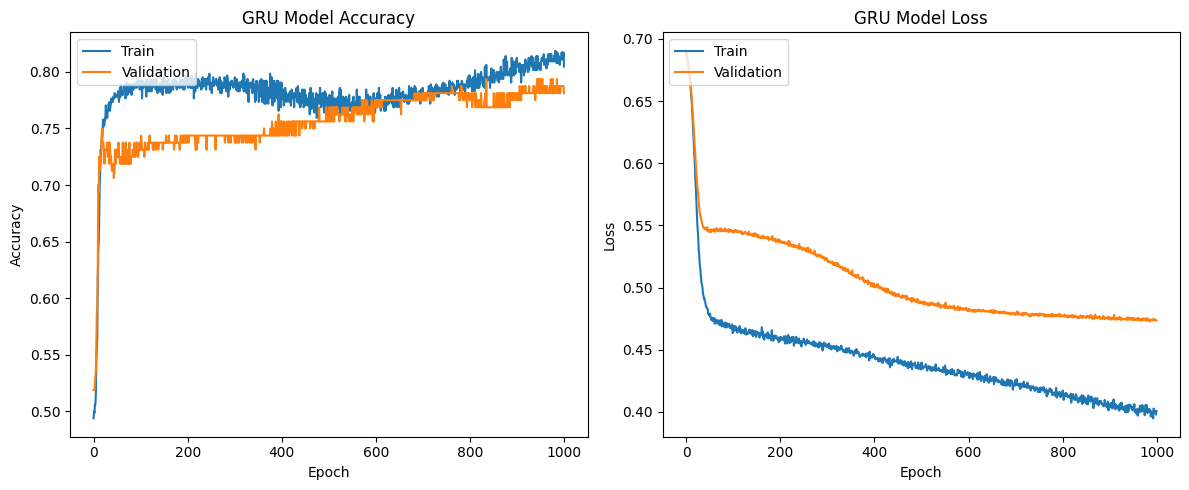

In [ ]:

# Load the best saved model
best_gru_model = tf.keras.models.load_model('best_gru_model.h5')
print("\nBest GRU model loaded successfully.")

# Evaluate the best model on the test set
print("\nEvaluating the best GRU model on the test set...")
loss, accuracy = best_gru_model.evaluate(X_test_gru_scaled, y_test, verbose=0)
print(f"GRU Test Accuracy: {accuracy:.4f}")

# Get predictions for confusion matrix and classification report
y_pred_prob_gru = best_gru_model.predict(X_test_gru_scaled)
y_pred_gru = (y_pred_prob_gru > 0.5).astype("int32")

print(f'GRU Confusion Matrix:\n{confusion_matrix(y_test, y_pred_gru)}')
print(f'GRU Classification Report:\n{classification_report(y_test, y_pred_gru)}')

# Plot training history
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history_gru.history['accuracy'])
plt.plot(history_gru.history['val_accuracy'])
plt.title('GRU Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_gru.history['loss'])
plt.plot(history_gru.history['val_loss'])
plt.title('GRU Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
# Define early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Function to compile, train, and evaluate a model
def train_model(model_fn, name):
    print(f"\nTraining {name}...")
    model = model_fn()
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=32,
              callbacks=[early_stop], verbose=0)
    y_pred = (model.predict(X_test) > 0.5).astype(int)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc * 100:.2f}%")

In [ ]:
# Additional Deep Learning Models for Pima Indians Diabetes Dataset
from tensorflow.keras.layers import Bidirectional, GRU, LSTM, Conv1D, MaxPooling1D, Flatten, Reshape

# BiLSTM model
def build_bilstm():
    model = Sequential([
        Reshape((X_train.shape[1], 1), input_shape=(X_train.shape[1],)),
        Bidirectional(LSTM(32, return_sequences=False)),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    return model

# GRU model
def build_gru():
    model = Sequential([
        Reshape((X_train.shape[1], 1), input_shape=(X_train.shape[1],)),
        GRU(32),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    return model

# BiGRU model
def build_bigru():
    model = Sequential([
        Reshape((X_train.shape[1], 1), input_shape=(X_train.shape[1],)),
        Bidirectional(GRU(32)),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    return model

# Hybrid CNN + LSTM model
def build_cnn_lstm():
    model = Sequential([
        Reshape((X_train.shape[1], 1), input_shape=(X_train.shape[1],)),
        Conv1D(32, 3, activation='relu'),
        MaxPooling1D(2),
        LSTM(32),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    return model

# Evaluate all models
train_model(build_bilstm, "BiLSTM")
train_model(build_gru, "GRU")
train_model(build_bigru, "BiGRU")
train_model(build_cnn_lstm, "Hybrid CNN + LSTM")



Training BiLSTM...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
BiLSTM Accuracy: 83.00%

Training GRU...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Accuracy: 82.50%

Training BiGRU...
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
BiGRU Accuracy: 85.00%

Training Hybrid CNN + LSTM...
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Hybrid CNN + LSTM Accuracy: 87.00%


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Add, BatchNormalization, Conv1D, MaxPooling1D, Flatten, Dropout, ReLU
from tensorflow.keras.models import Model

def build_cnn_residual():
    input_layer = Input(shape=(X_train.shape[1], 1))

    x = Conv1D(32, 3, padding='same', activation='relu')(input_layer)
    x = BatchNormalization()(x)
    x = Conv1D(32, 3, padding='same', activation='relu')(x)
    x = BatchNormalization()(x)

    shortcut = Conv1D(32, 1, padding='same')(input_layer)
    x = Add()([x, shortcut])
    x = ReLU()(x) # Changed to imported ReLU layer

    x = MaxPooling1D(2)(x)
    x = Flatten()(x)
    x = Dropout(0.3)(x)
    output = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=input_layer, outputs=output)
    return model

In [ ]:
cnn=build_cnn_residual()
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
cnn.summary()

Model: "functional_58"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_13      │ (None, 8, 1)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_4 (Conv1D)   │ (None, 8, 32)     │        128 │ input_layer_13[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 8, 32)     │        128 │ conv1d_4[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_5 (Conv1D)   │ (None, 8, 32)     │      3,104 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 8, 32)     │        128 │ conv1d_5[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_6 (Conv1D)   │ (None, 8, 32)     │         64 │ input_layer_13[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 8, 32)     │          0 │ batch_normalizat… │
│                     │                   │            │ conv1d_6[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_1 (ReLU)      │ (None, 8, 32)     │          0 │ add_1[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_2     │ (None, 4, 32)     │          0 │ re_lu_1[0][0]     │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 128)       │          0 │ max_pooling1d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_20          │ (None, 128)       │          0 │ flatten_1[0][0]   │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_13 (Dense)    │ (None, 1)         │        129 │ dropout_20[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 3,681 (14.38 KB)

 Trainable params: 3,553 (13.88 KB)

 Non-trainable params: 128 (512.00 B)

In [ ]:
hscnn=cnn.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=32,
              )

Epoch 1/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.5273 - loss: 8.4805 - val_accuracy: 0.4938 - val_loss: 1.6635
Epoch 2/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5526 - loss: 4.6703 - val_accuracy: 0.5562 - val_loss: 1.6565
Epoch 3/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5049 - loss: 5.2427 - val_accuracy: 0.5625 - val_loss: 0.9491
Epoch 4/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5068 - loss: 5.1937 - val_accuracy: 0.6250 - val_loss: 1.2164
Epoch 5/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5614 - loss: 3.7814 - val_accuracy: 0.6625 - val_loss: 0.9993
Epoch 6/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6293 - loss: 3.0322 - val_accuracy: 0.6875 - val_loss: 0.9876
Epoch 7/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5446 - loss: 3.4176 - val_accuracy: 0.6438 - val_loss: 1.2096
Epoch 8/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6096 - loss: 2.6831 - val_accuracy: 0.7500 -

In [ ]:
# prompt: saving training history of cnn named hscnn

import pickle

# Save the training history to a file
with open('cnn_history.pkl', 'wb') as f:
    pickle.dump(hscnn.history, f)

print("Training history saved as 'cnn_history.pkl'")


Training history saved as 'cnn_history.pkl'


In [ ]:
# prompt: test cnn on test set

# Ensure necessary libraries are imported
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Check if X_test and y_test are defined
if 'X_test' not in locals() or 'y_test' not in locals():
    print("X_test and y_test are not defined. Please run the data splitting cells first.")
else:
    # Load the best CNN model (assuming it was saved as 'best_cnn_model.h5')
    # If you named it differently or saved it in a different format, adjust the loading code.
    # Based on the preceding code, the CNN model was trained but not explicitly saved with ModelCheckpoint.
    # We will evaluate the last state of the 'cnn' model defined in the preceding code.
    # If you intended to save and load, ensure the ModelCheckpoint was added to its fit call.

    print("\nEvaluating the CNN model on the test set...")

    # Use the 'cnn' model object that was trained in the preceding code
    # If the model object is not available, you would need to reload or retrain it.
    if 'cnn' in locals():
        # Evaluate the model directly
        loss_cnn, accuracy_cnn = cnn.evaluate(X_test, y_test, verbose=0)
        print(f"CNN Test Accuracy: {accuracy_cnn:.4f}")

        # Get predictions for confusion matrix and classification report
        y_pred_prob_cnn = cnn.predict(X_test)
        y_pred_cnn = (y_pred_prob_cnn > 0.5).astype("int32")

        print(f'CNN Confusion Matrix:\n{confusion_matrix(y_test, y_pred_cnn)}')
        print(f'CNN Classification Report:\n{classification_report(y_test, y_pred_cnn)}')

    else:
        print("CNN model ('cnn') object not found. Please ensure the CNN model was defined and trained.")




Evaluating the CNN model on the test set...
CNN Test Accuracy: 0.8750
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step
CNN Confusion Matrix:
[[89 11]
 [14 86]]
CNN Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.89      0.88       100
         1.0       0.89      0.86      0.87       100

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.87       200
weighted avg       0.88      0.88      0.87       200



In [ ]:
# prompt: save this cnn model

import tensorflow as tf

# Ensure the CNN model object `cnn` is available from the previous code.
# If you need to save and load explicitly, uncomment and use the code below:
tf.keras.models.save_model(cnn, 'best_cnn_model.h5')
# print("CNN model saved successfully.")